In [1]:
#Import Block

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pylab as lab
import sys
import time
from specutils import Spectrum1D
import astropy.units as u
from specutils.manipulation import (box_smooth, gaussian_smooth, trapezoid_smooth)
He = False
HeII = False
varHe = "Untestable"
varHeII = "Untestable"
print ("import done")
fileName = 'wisej1856_090721_merged.txt'
print ("""Star Guesses:
TYC 3740-1791-1: EM candiate, A Star Guess
WISE J185608.58-163255.1: Cool Candidate, G Star Guess
WISE J194127.64+385155.3: Cool Candidate, K Star Guess
TYC 2670-214-1 EM Candidate, A or F Star Guess""")

import done
Star Guesses:
TYC 3740-1791-1: EM candiate, A Star Guess
WISE J185608.58-163255.1: Cool Candidate, G Star Guess
WISE J194127.64+385155.3: Cool Candidate, K Star Guess
TYC 2670-214-1 EM Candidate, A or F Star Guess


In [2]:
    #File Set Up Block

tyc2670 = 'tyc2670_090721_merged-Copy1.txt'
tyc3740 = 'tyc3740_091021_merged-Copy1.txt'
wisej1856 ='wisej1856_090721_merged-Copy1.txt'
wisej1941 = 'wisej1941_090721_merged-Copy1.txt'




    
def fileSetup(fileName,guassFactor):
        # global waves
        # global fluxs
        # global spec1_gsmooth
        # global spec1_bsmooth
        # global spec1_tsmooth
        # global spec1d
        # global fileTitle
        
       
        
        waves,fluxs,_ = np.genfromtxt(fileName,unpack=True)

    
        spec1d = Spectrum1D(spectral_axis=waves*u.AA, flux = fluxs*u.Jy)

        spec1_bsmooth = box_smooth(spec1d, width=3)
        spec1_gsmooth = gaussian_smooth(spec1d, stddev=guassFactor)
        spec1_tsmooth = trapezoid_smooth(spec1d, width=3)
        #print ("Do you want to give '", fileName,"'a nickname?")
        time.sleep(1)
        """wantNickName =(input("Yes/No"))
        if wantNickName == "Yes":
            nickName = (input("Enter your nickname for this star"))
            fileName = nickName
            fileTitle = fileName
        if wantNickName == "No":
            fileTitle = fileName
        else:
            fileTitle = fileName"""# manual nickname entry
        if fileName == tyc2670:
            fileTitle="TYC 2670"
        if fileName==tyc3740:
            fileTitle="TYC 3740"
        if fileName == wisej1856:
            fileTitle ="WISE J1856"
        if fileName == wisej1941:
            fileTitle = "WISE J1941"
        print(fileTitle,", file set up done")
        return waves,fluxs,spec1_gsmooth,fileTitle

In [3]:
def bunny():
    print(""" Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   """)

In [4]:
CaTriplet3Wave=866.2 
CaTriplet2Wave=854.2
CaTriplet1Wave=849.8
H_AlphaWave=656.3
NaDoublet2Wave=589.5
NaDoublet1Wave=589.0
H_BetaWave=486.1
H_GammaWave=434.0
G_BandWave=430.8
FeWave=432.5

def ListofSpectralFeatures():
    print("""
CaTriplet3Wave=866.2 
CaTriplet2Wave=854.2
CaTriplet1Wave=849.8
H_AlphaWave=656.3
NaDoublet2Wave=589.5
NaDoublet1Wave=589.0
H_BetaWave=486.1
H_GammaWave=434.0
G_BandWave=430.8
FeWave=432.5
""")


In [5]:
 def fullSpectra(wave,flux,spec1_gsmooth,Focus,starGuess,lw,leftLim,rightLim,fileTitle):   
    x = wave
    y = flux
    print(Focus)
    # global title
    # global waveG
    # global fluxG
    focus=Focus
    title1 = starGuess + " Candidate "+fileTitle+" "+focus
    title2 = title1+" (Smoothed)"
    fig, axes = plt.subplots(2, 1, figsize=(16, 10),dpi=300)
    axes[0].set_title(title1,color='Gold')
    axes[0].set_xlabel("Wave") 
    axes[0].set_ylabel("Flux") 
    plt.figure(facecolor='Black')
    axes[0].set_facecolor('Black')
    axes[0].plot(wave,flux,color='lime')
    if CaTriplet3Wave >= leftLim and CaTriplet3Wave <= rightLim:
        axes[0].axvline(x=CaTriplet3Wave,color="darkviolet",linewidth=lw)#Ca Triplet 3
    if CaTriplet2Wave >= leftLim and CaTriplet2Wave <= rightLim:
        axes[0].axvline(x=CaTriplet2Wave,color="darkviolet",linewidth=lw)#Ca Triplet 2
    if CaTriplet1Wave >= leftLim and CaTriplet1Wave <= rightLim:
        axes[0].axvline(x=CaTriplet1Wave,color="darkviolet",linewidth=lw)#Ca Triplet 1
    if (862 >= leftLim and 862 <= rightLim):
        axes[0].text(862,0.4,"Ca Triplet" ,color ="mediumorchid")
    if H_AlphaWave >= leftLim and H_AlphaWave <= rightLim:
        axes[0].axvline(x=H_AlphaWave,color="indigo",linewidth=lw,)#Ha
        axes[0].text(656.5,0.3, " H-α",color="indigo")
    if NaDoublet1Wave >= leftLim and NaDoublet2Wave <= rightLim and Focus != "Balmer Series":
        axes[0].axvline(x=NaDoublet2Wave,color="RoyalBlue",linewidth=lw)#Na Doublet 2
        axes[0].axvline(x=NaDoublet1Wave,color="RoyalBlue",linewidth=lw)#Na Doublet 1
        axes[0].text(590,0.6,"Na Doublet", color ="RoyalBlue")
    if H_BetaWave >= leftLim and H_BetaWave <= rightLim:
        axes[0].axvline(x=H_BetaWave,color="ForestGreen",linewidth=lw)#Hb
        axes[0].text(486.5,0.3, "H-β", color="ForestGreen")
    if H_GammaWave >= leftLim and H_GammaWave <= rightLim :
        axes[0].axvline(x=H_GammaWave,color="darkgoldenrod",linewidth=lw)#Hg
        axes[0].text(434.2,0.1, "H-γ", color="darkgoldenrod") 
    if G_BandWave >= leftLim and G_BandWave <= rightLim and Focus != "Balmer Series":
        axes[0].axvline(x=G_BandWave,color="Red",linewidth=lw)# G-Band(?)
        if leftLim <=405:
            axes[0].text(408.0,0.5,"G-band",color="Red") # double check this is actually the g-band
        if leftLim>=405:
            axes[0].text(431,0.5,"G-band",color="Red") # double check this is actually the g-band
    if FeWave >= leftLim and FeWave <= rightLim and Focus != "Balmer Series":
        axes[0].axvline(x=FeWave,color="Magenta",linewidth=lw)#Fe
        axes[0].text(433,0.2,"Fe 432.5",color="Magenta") 
    axes[0].set_xlim(leftLim,rightLim)
    plt.tight_layout()
    axes[1].set_title(title2, color='gold')
    axes[1].set_facecolor('black')
    
    if CaTriplet3Wave >= leftLim and CaTriplet3Wave <= rightLim:
        axes[1].axvline(x=CaTriplet3Wave,color="darkviolet",linewidth=lw)#Ca Triplet 3
    if CaTriplet2Wave >= leftLim and CaTriplet2Wave <= rightLim:
        axes[1].axvline(x=CaTriplet2Wave,color="darkviolet",linewidth=lw)#Ca Triplet 2
    if CaTriplet1Wave >= leftLim and CaTriplet1Wave <= rightLim:
        axes[1].axvline(x=CaTriplet1Wave,color="darkviolet",linewidth=lw)#Ca Triplet 1
    if (868 >= leftLim and 868 <= rightLim):
        axes[1].text(862,0.4,"Ca Triplet" ,color ="lavendar")
    if H_AlphaWave >= leftLim and H_AlphaWave <= rightLim:
        axes[1].axvline(x=H_AlphaWave,color="indigo",linewidth=lw,)#Ha
        axes[1].text(656.5,0.3, " H-α",color="indigo")
    if NaDoublet1Wave >= leftLim and NaDoublet2Wave <= rightLim and Focus != "Balmer Series":
        axes[1].axvline(x=NaDoublet2Wave,color="RoyalBlue",linewidth=lw)#Na Doublet 2
        axes[1].axvline(x=NaDoublet1Wave,color="RoyalBlue",linewidth=lw)#Na Doublet 1
        axes[1].text(590,0.4,"Na Doublet", color ="RoyalBlue")
    if H_BetaWave >= leftLim and H_BetaWave <= rightLim:
        axes[1].axvline(x=H_BetaWave,color="ForestGreen",linewidth=lw)#Hb
        axes[1].text(486.5,0.3, "H-β", color="ForestGreen")
    if H_GammaWave >= leftLim and H_GammaWave <= rightLim :
        axes[1].axvline(x=H_GammaWave,color="GoldenRod",linewidth=lw)#Hg
        axes[1].text(434.2,0.35, "H-γ", color="GoldenRod") 
    if G_BandWave >= leftLim and G_BandWave <= rightLim and Focus != "Balmer Series":
        axes[1].axvline(x=G_BandWave,color="Red",linewidth=lw)# G-Band(?)
        if leftLim <=405:
            axes[1].text(408.0,0.5,"G-band",color="Red") # double check this is actually the g-band
        if leftLim>=405:
            axes[1].text(431.0,0.5,"G-band",color="Red") # double check this is actually the g-band
    if FeWave >= leftLim and FeWave <= rightLim and Focus != "Balmer Series":
        axes[1].axvline(x=FeWave,color="Magenta",linewidth=lw)#Fe
        axes[1].text(433,0.4,"Fe 432.5",color="Magenta") 
    
    
    axes[1].set_xlabel("Wave") 
    axes[1].set_ylabel("Flux") 

    axes[1].plot(spec1_gsmooth.spectral_axis, spec1_gsmooth.flux, color='dogerblue)  
    axes[1].set_xlim(leftLim,rightLim)#emission line zoom in one
    #axes[1].set_xlim(625,635)#emission line zoom in two
    #axes[1].set_xlim(875,900)#emission line zoom in 3
    #axes[1].axvline(x=1043,color="darkviolet",linewidth=0.75,ls="dashed")
    plt.tight_layout()
    
    saveName = title1+".png"
  
    plt.savefig(saveName,bbox_inches="tight")
    plt.show
    
    waveG = spec1_gsmooth.spectral_axis
    fluxG = spec1_gsmooth.flux
    #return waveG 
    #return fluxG
    #return lw
    #return title

In [6]:
#waves,fluxs,spec1_gsmooth,fileTitle = fileSetup(tyc2670,24)


In [7]:
#fullSpectra(waves,fluxs,spec1_gsmooth,"Full Spectra","EM",0.6,400,1000,fileTitle)

TYC 2670 , file set up done
Full Spectra
TYC 3740 , file set up done
Full Spectra
WISE J1856 , file set up done
Full Spectra
WISE J1941 , file set up done
Full Spectra
 Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   
TYC 2670 , file set up done
Balmer Series
TYC 3740 , file set up done
Balmer Series
WISE J1856 , file set up done
Balmer Series
WISE J1941 , file set up done
Balmer Series
 Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   
TYC 2670 , file set up done
H-α
TYC 3740 , file set up done
H-α
WISE J1856 , file set up done
H-α


C:\Users\ishan\AppData\Local\Temp/ipykernel_18284/1341750918.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(2, 1, figsize=(16, 10),dpi=300)


WISE J1941 , file set up done
H-α
 Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   
TYC 2670 , file set up done
Ca Triplet
TYC 3740 , file set up done
Ca Triplet
WISE J1856 , file set up done
Ca Triplet
WISE J1941 , file set up done
Ca Triplet
 Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   
TYC 2670 , file set up done
G-Band,Fe Line,and H-γ
TYC 3740 , file set up done
G-Band,Fe Line,and H-γ
WISE J1856 , file set up done
G-Band,Fe Line,and H-γ
WISE J1941 , file set up done
G-Band,Fe Line,and H-γ
 Have a bunny             
                      (\___/)
                      (=^.^=)
                      (")_(")   


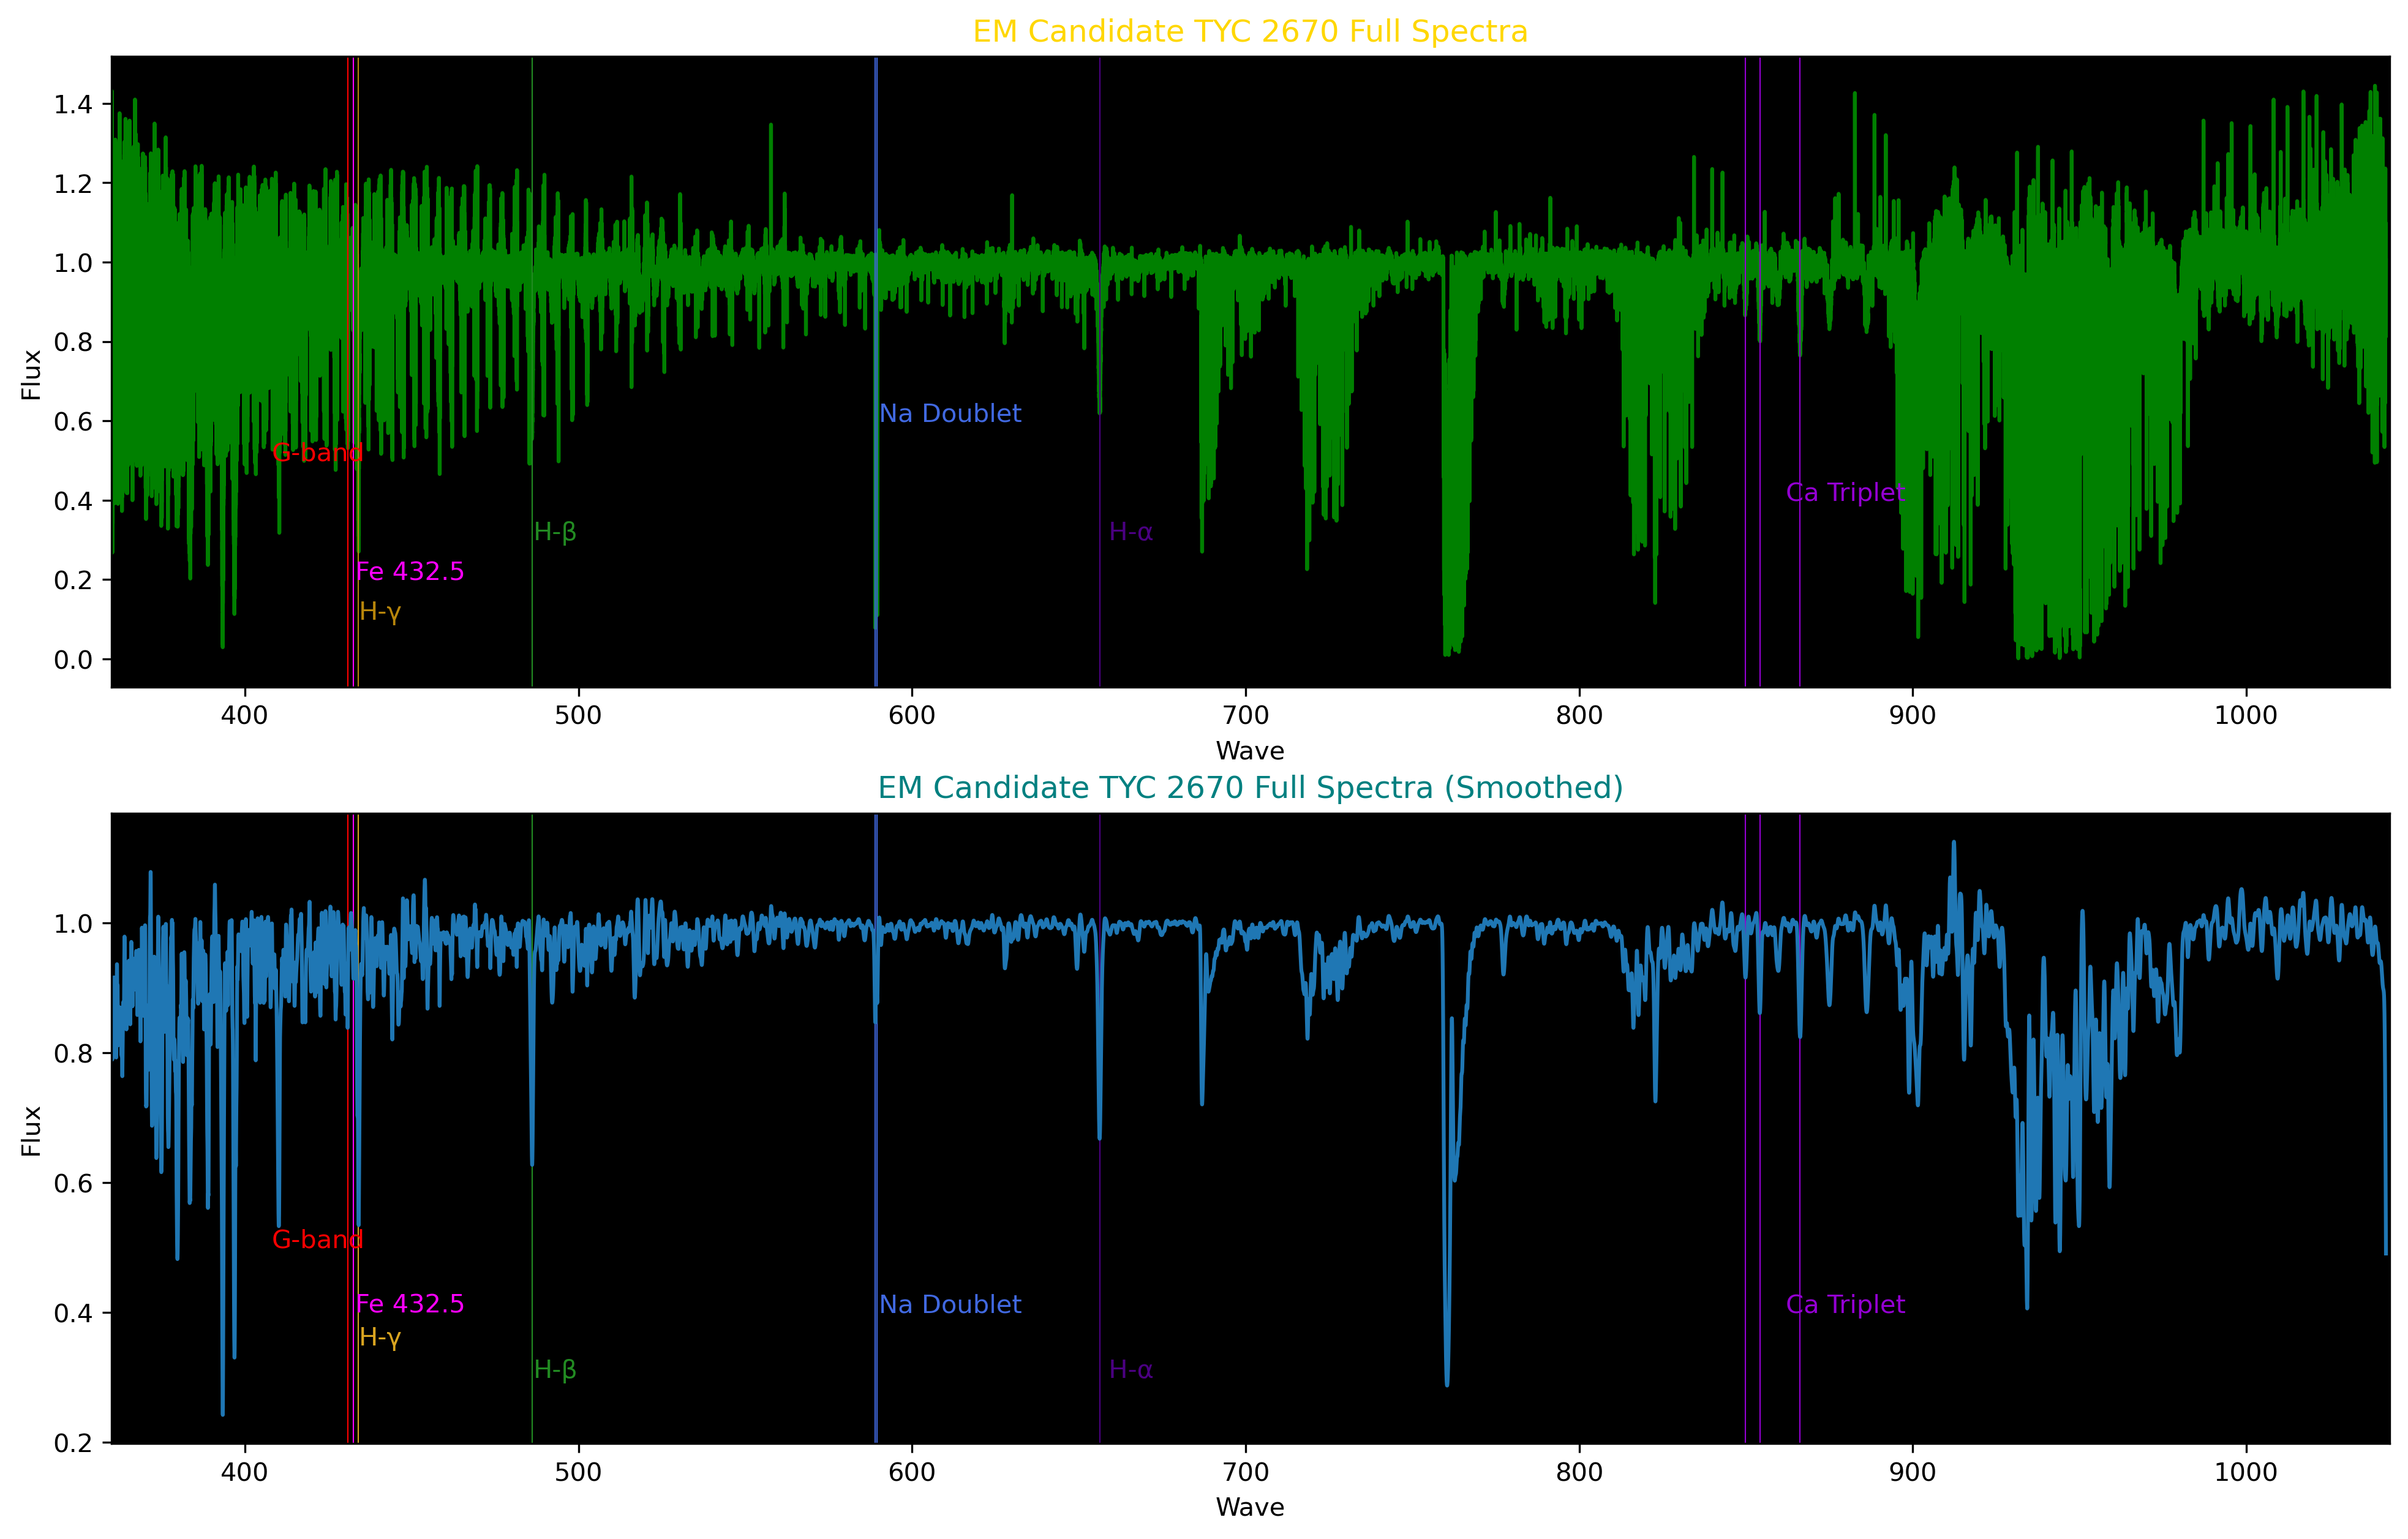

<Figure size 432x288 with 0 Axes>

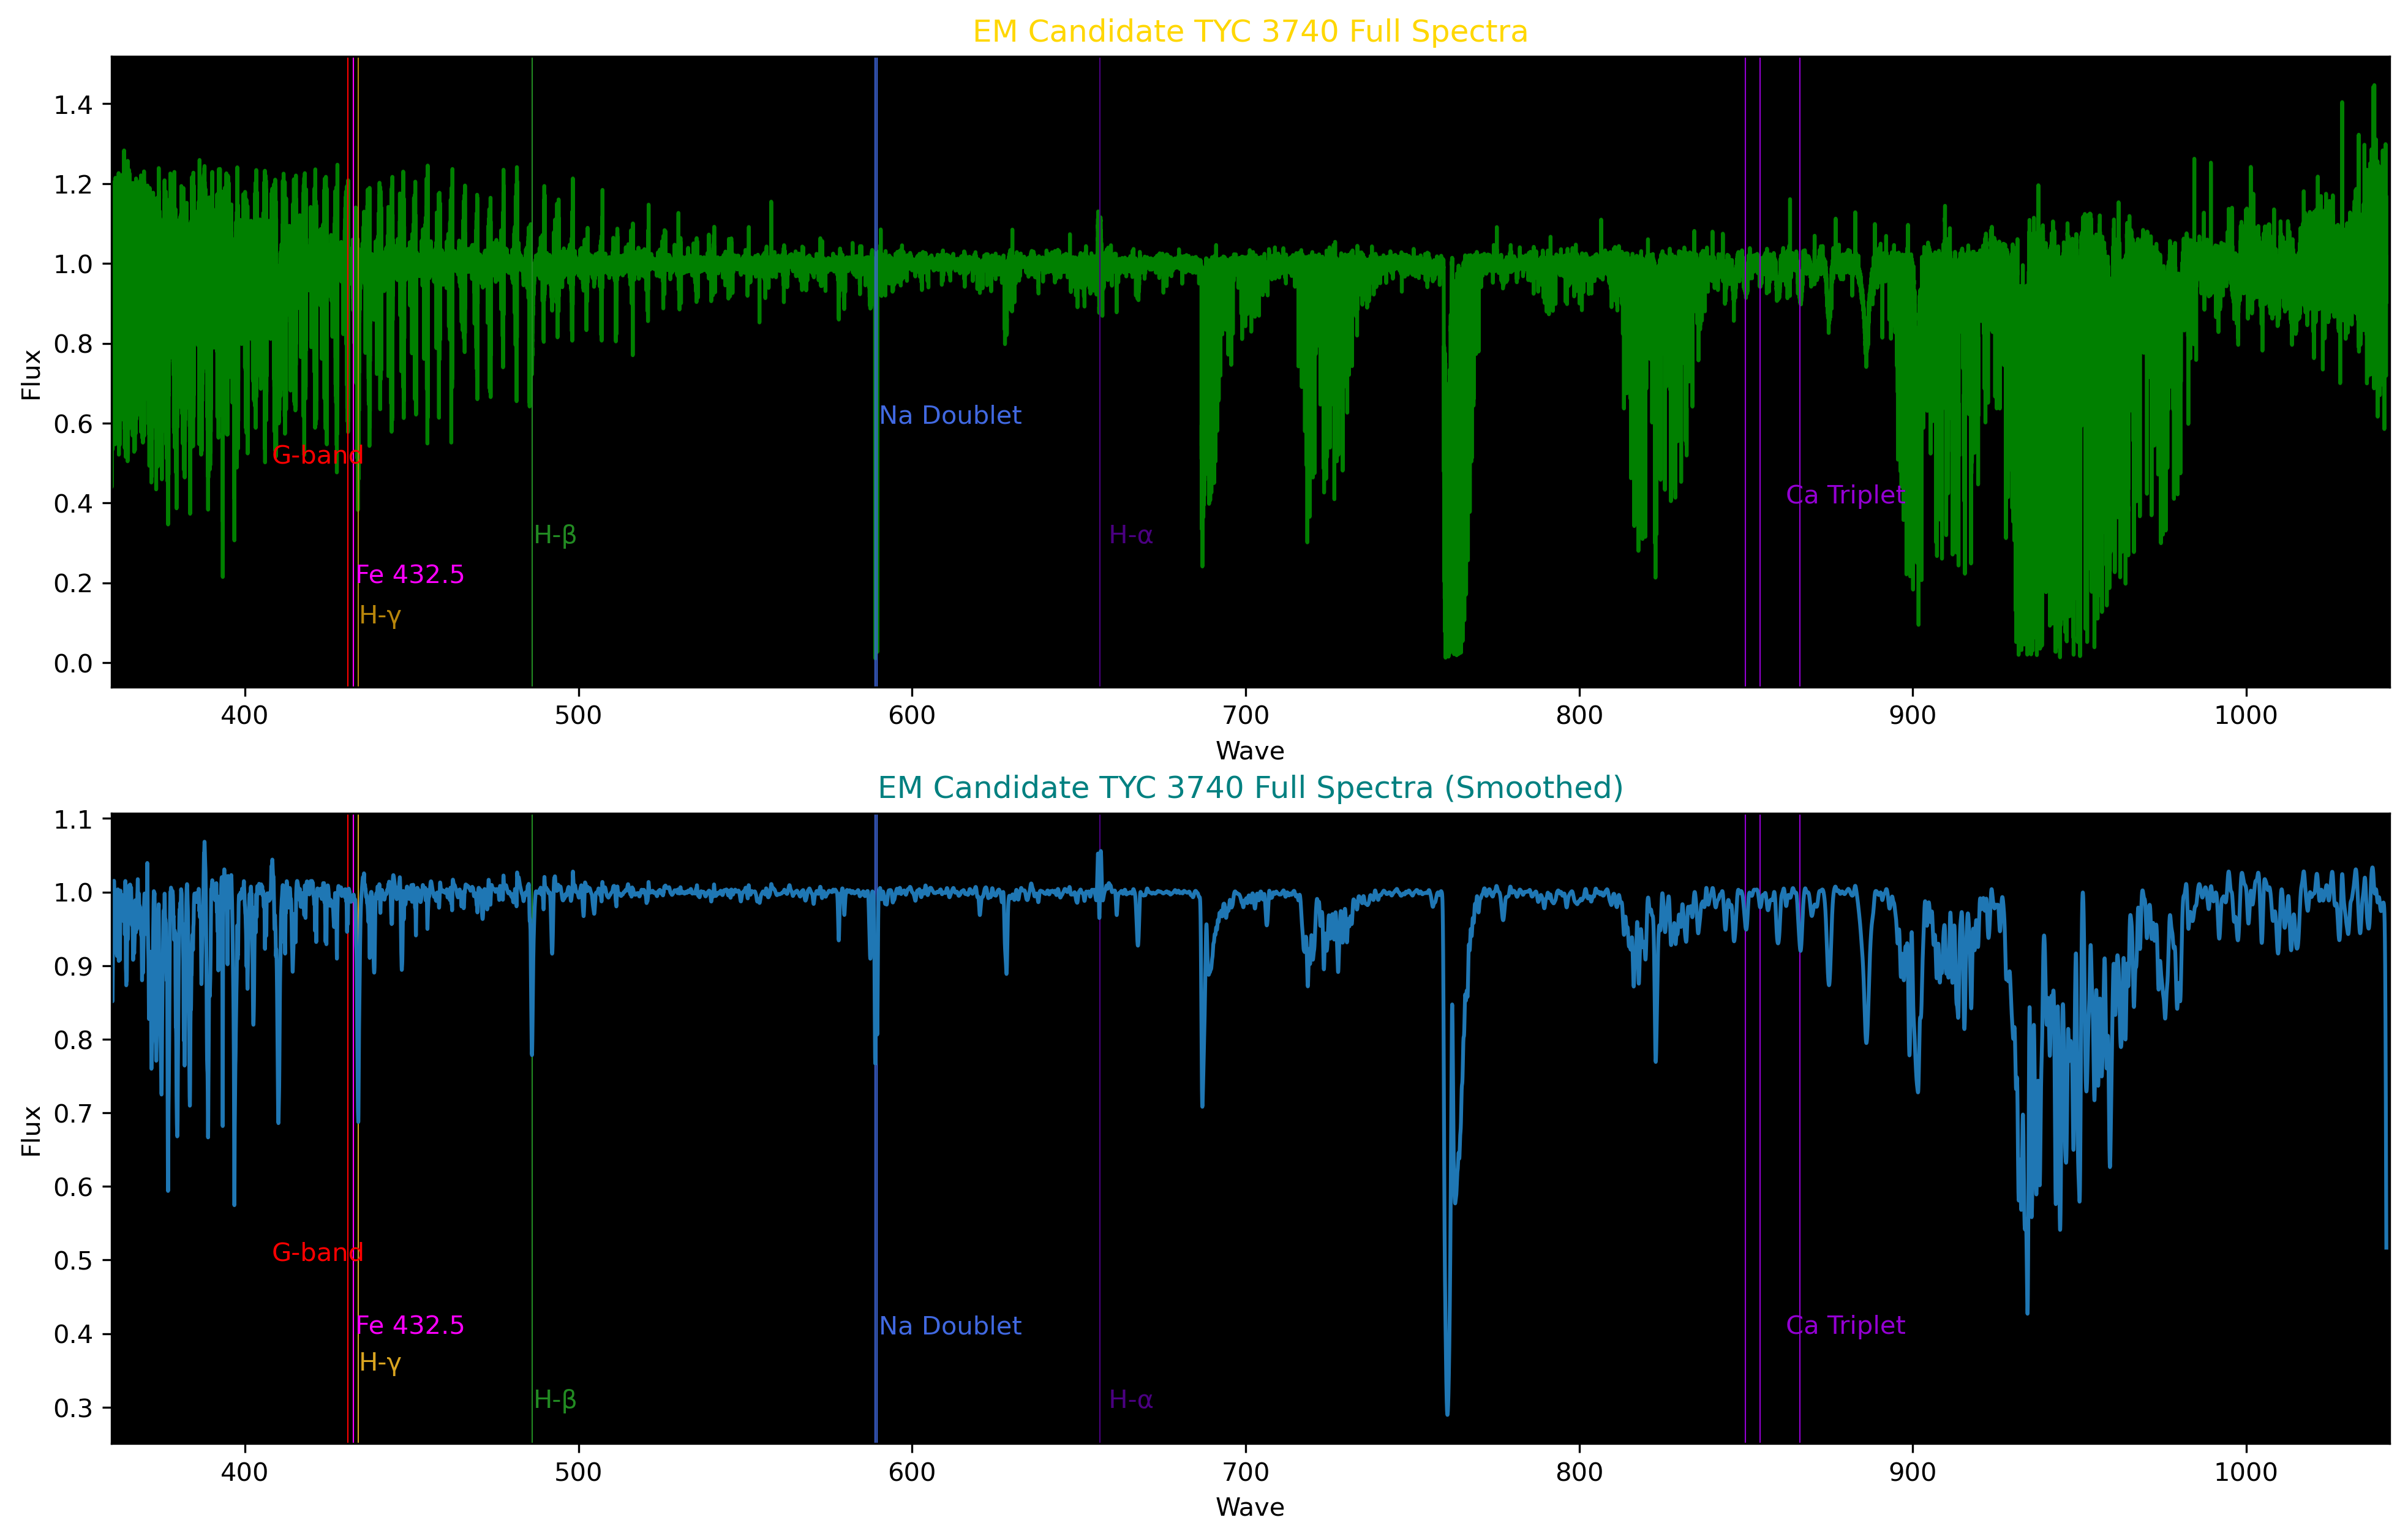

<Figure size 432x288 with 0 Axes>

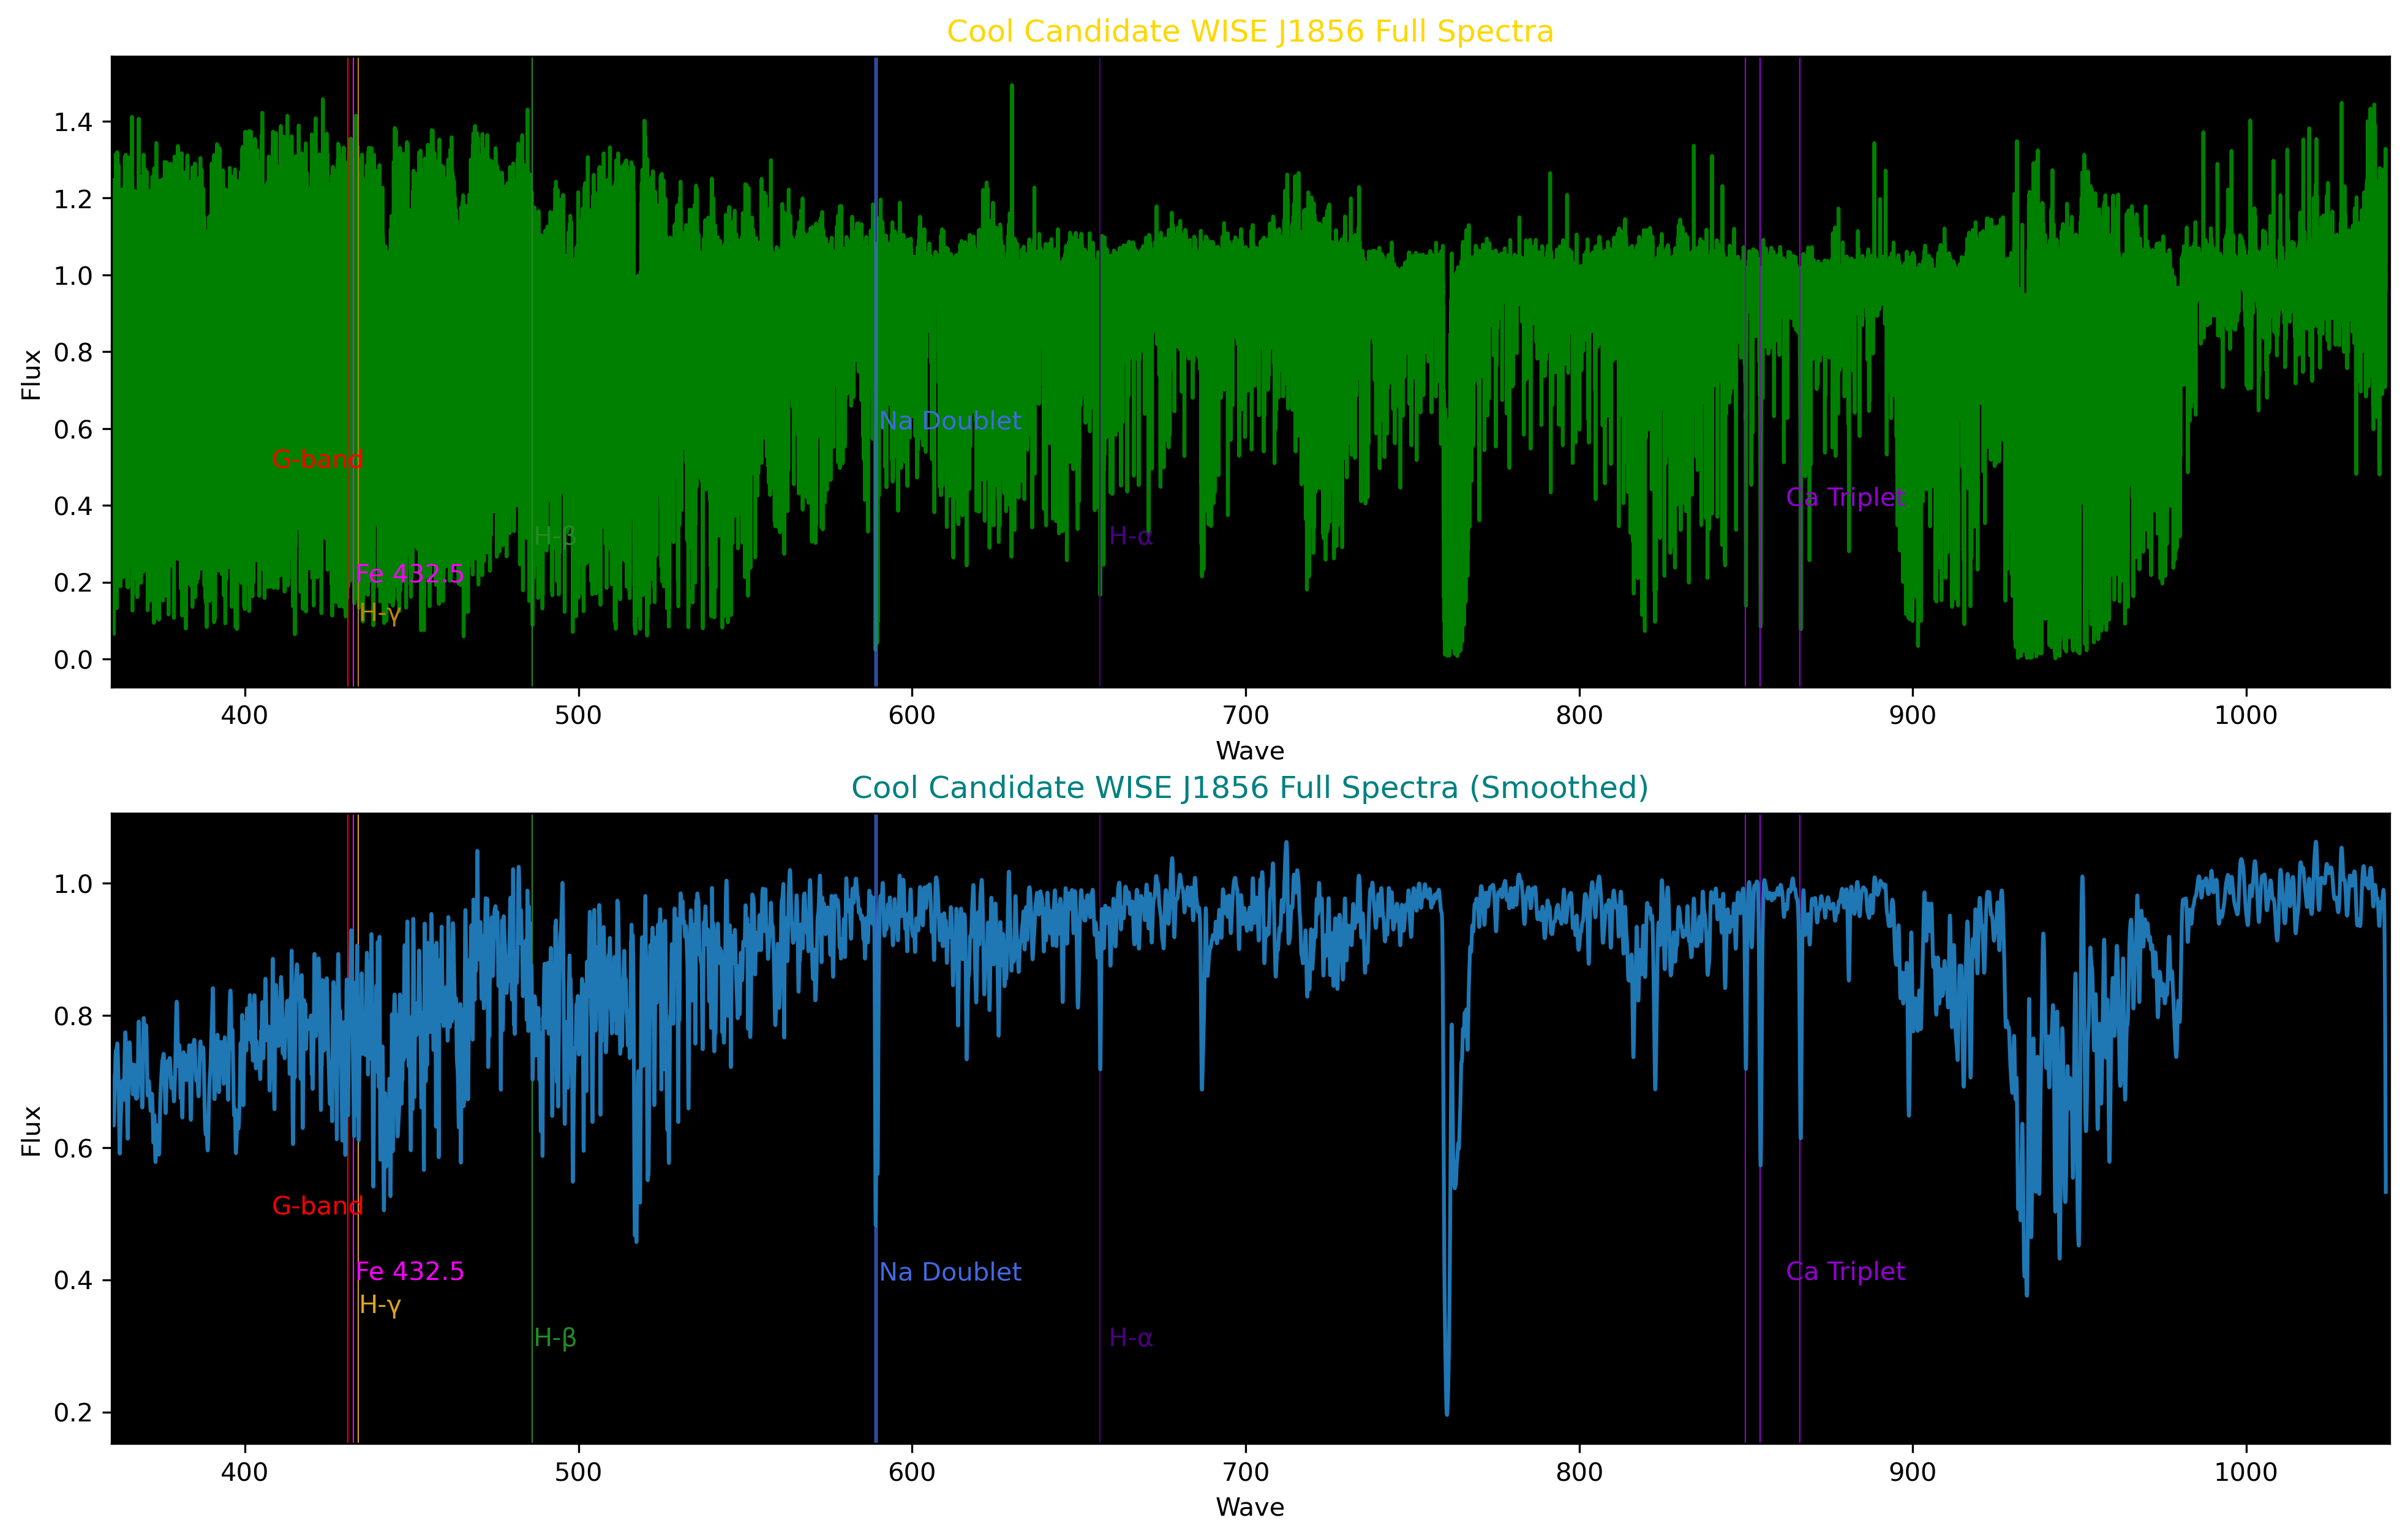

<Figure size 432x288 with 0 Axes>

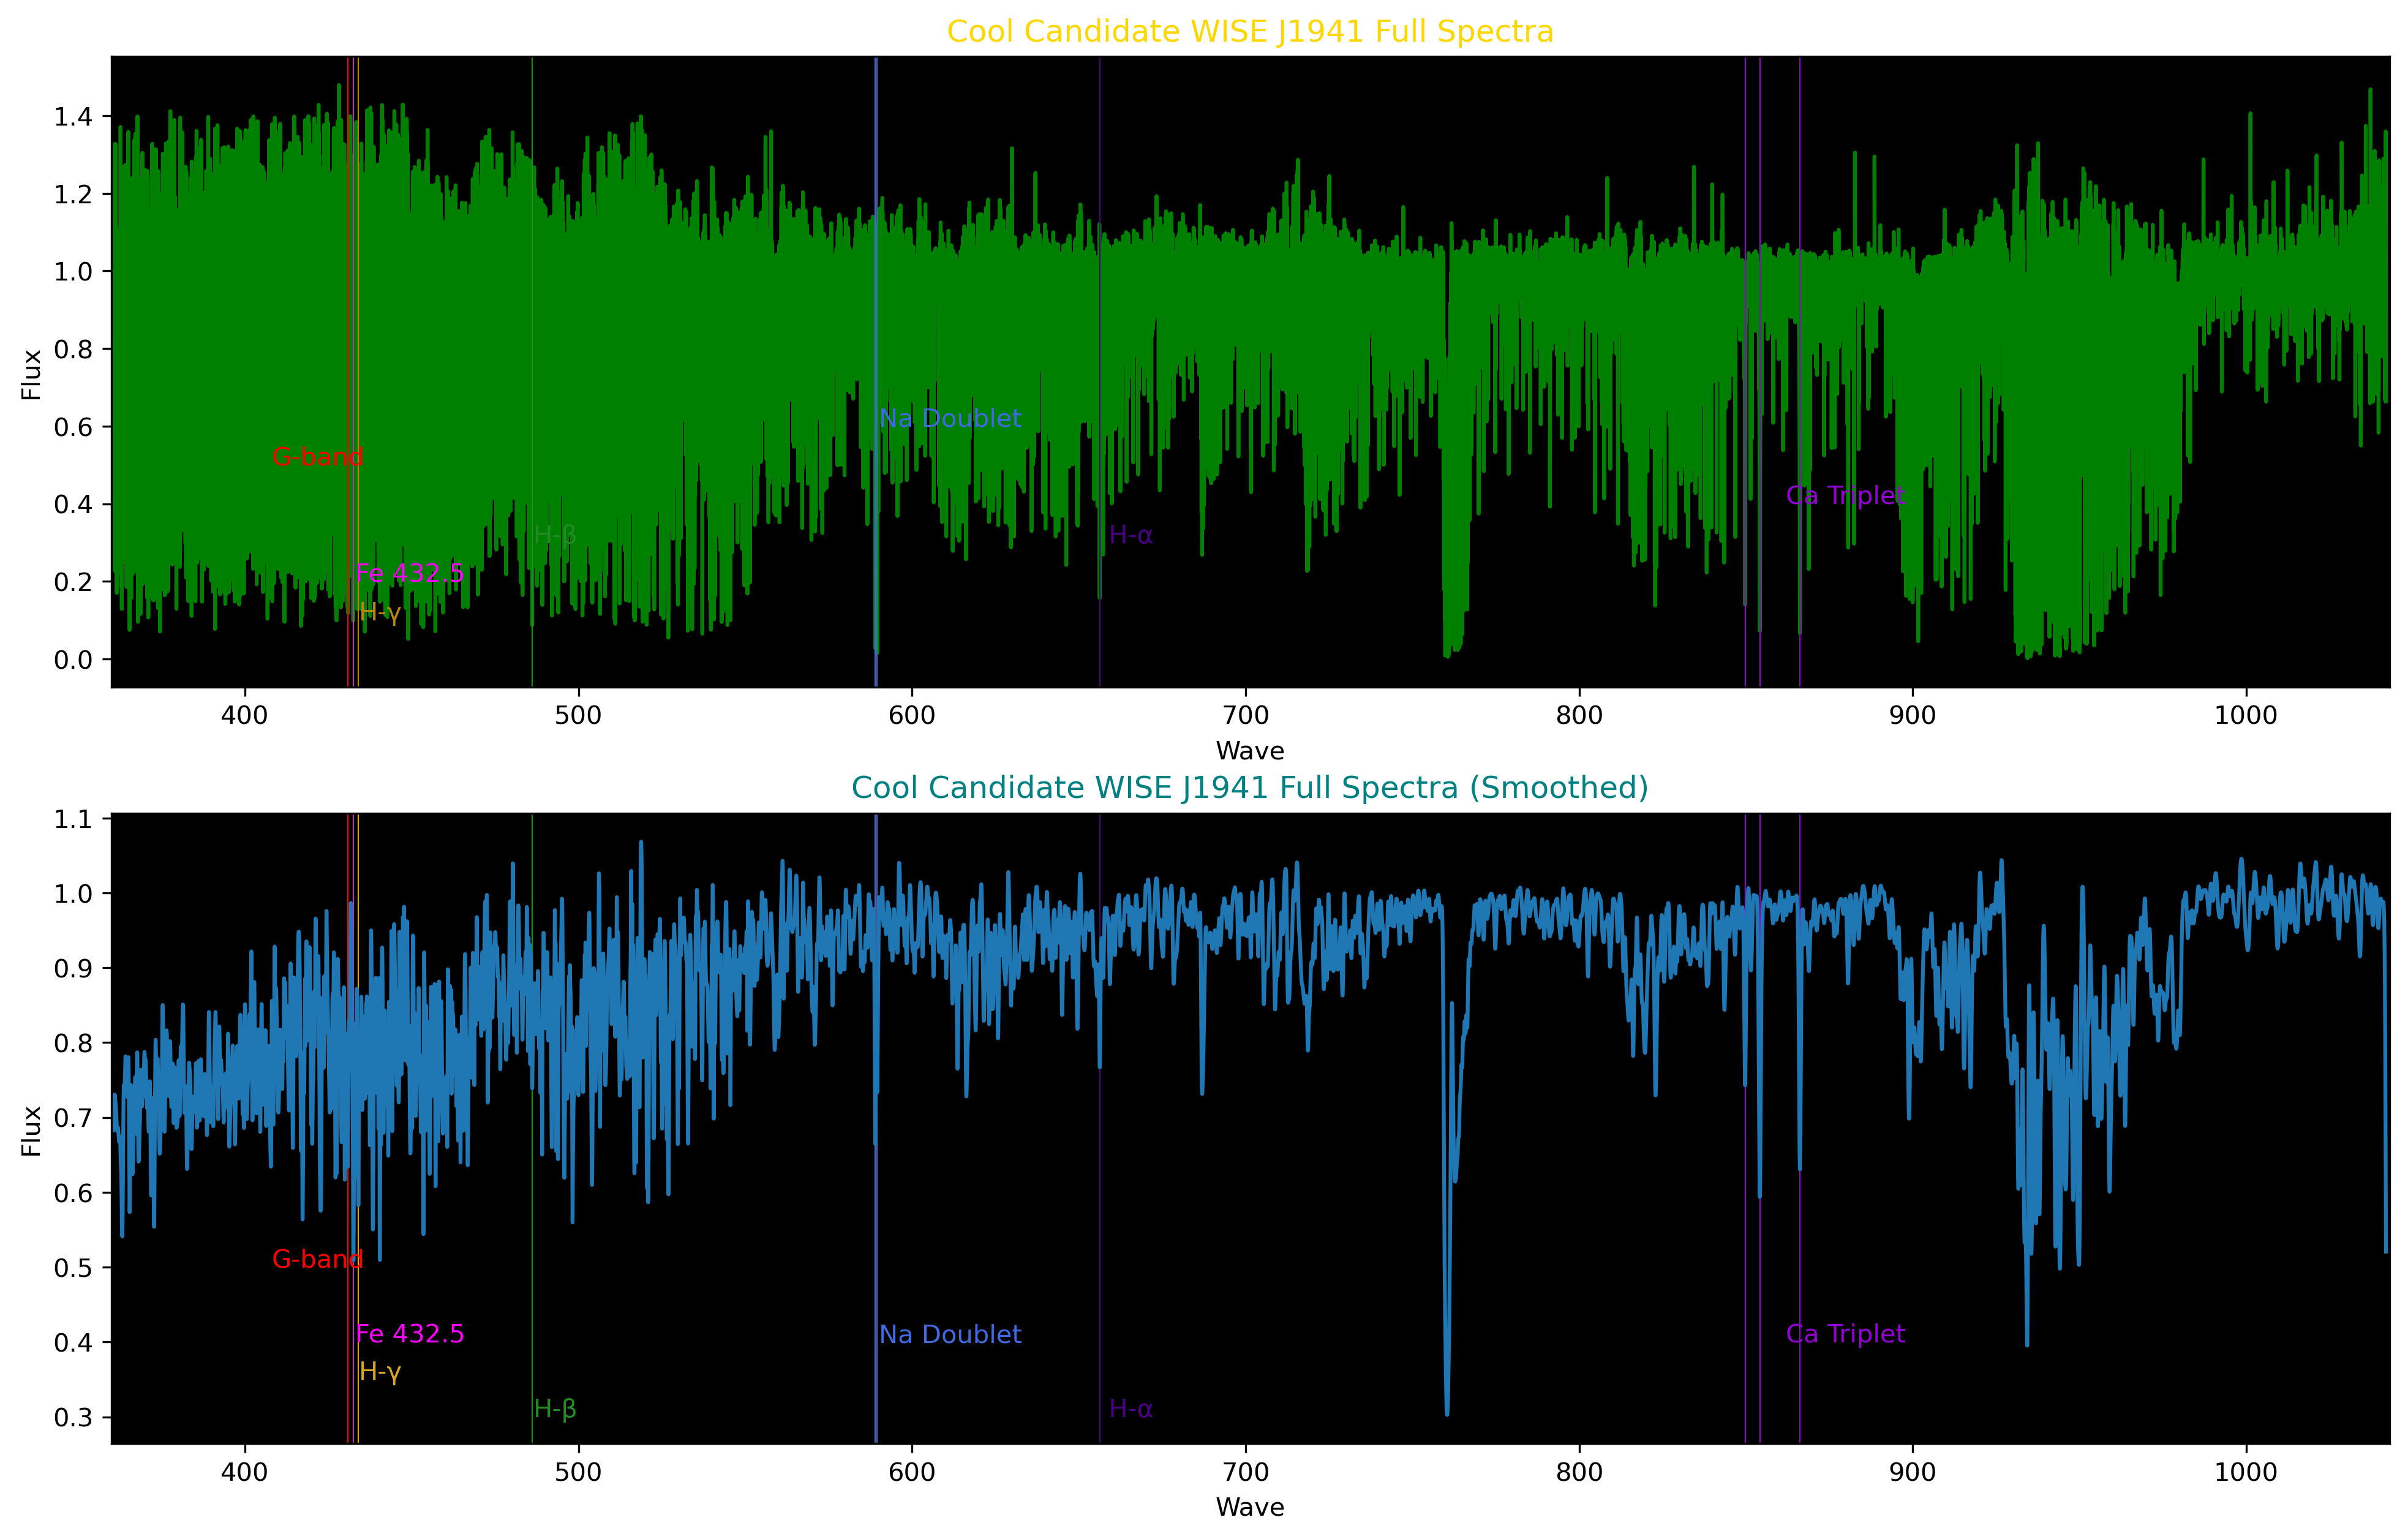

<Figure size 432x288 with 0 Axes>

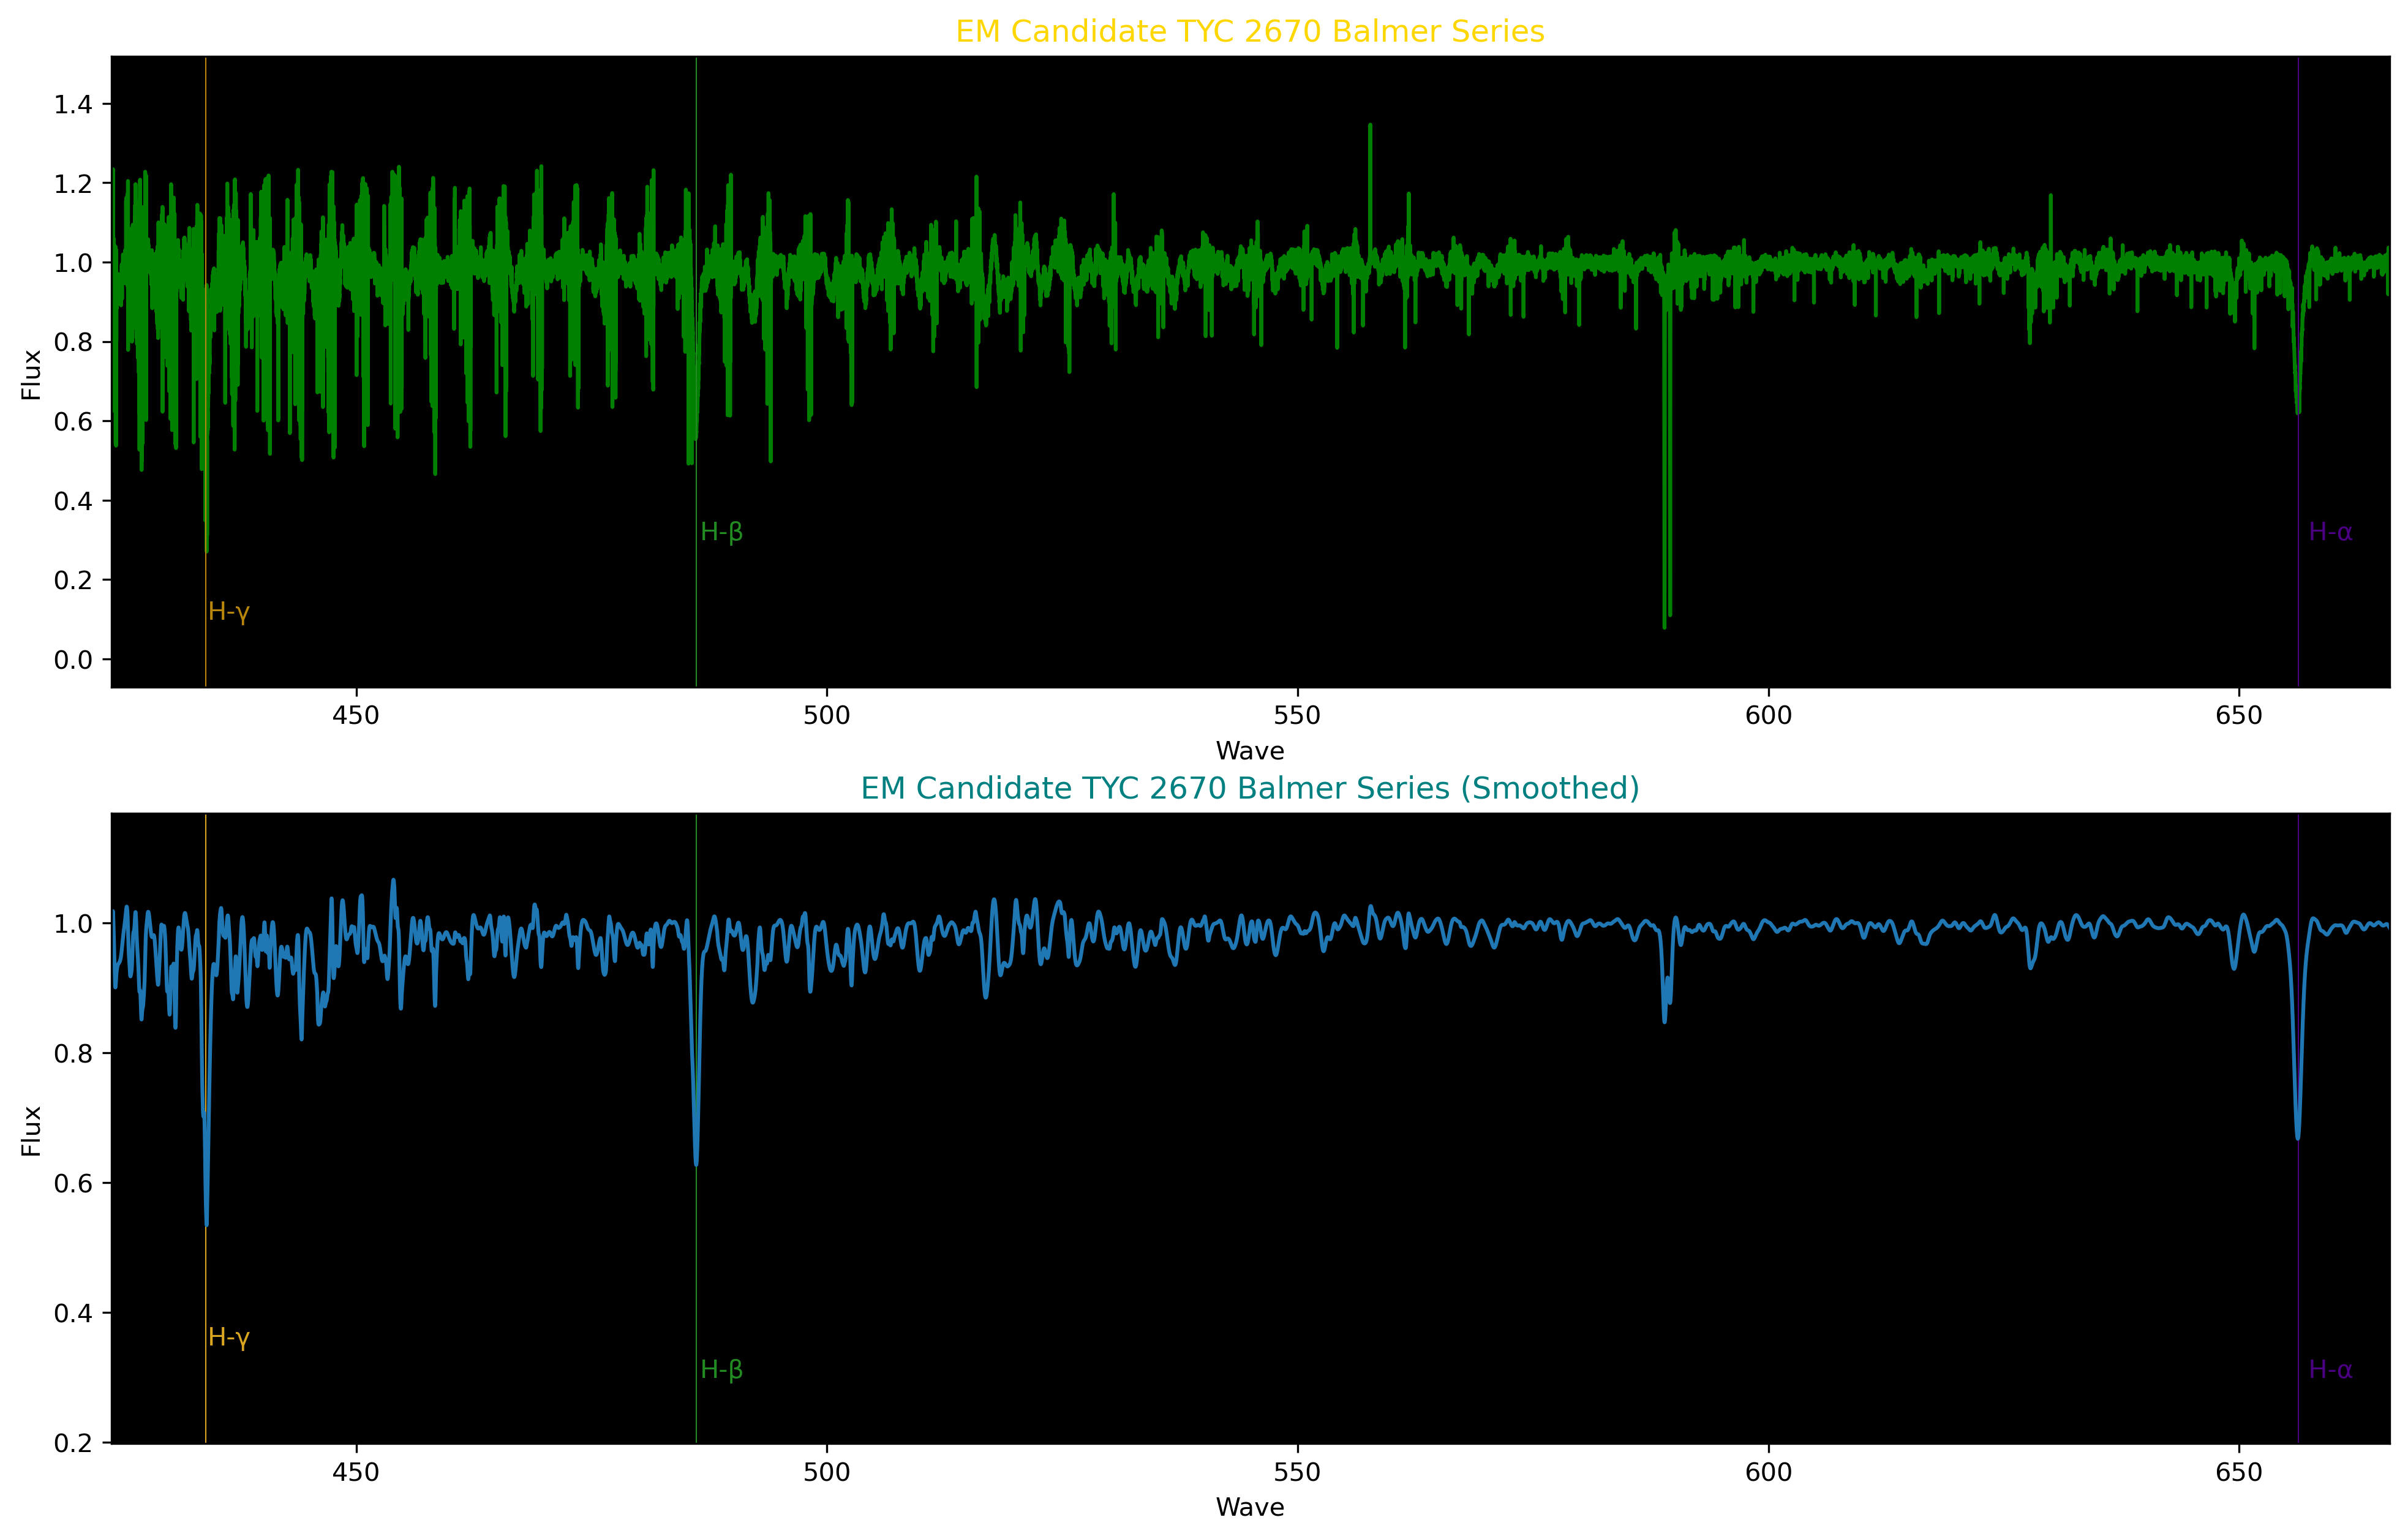

<Figure size 432x288 with 0 Axes>

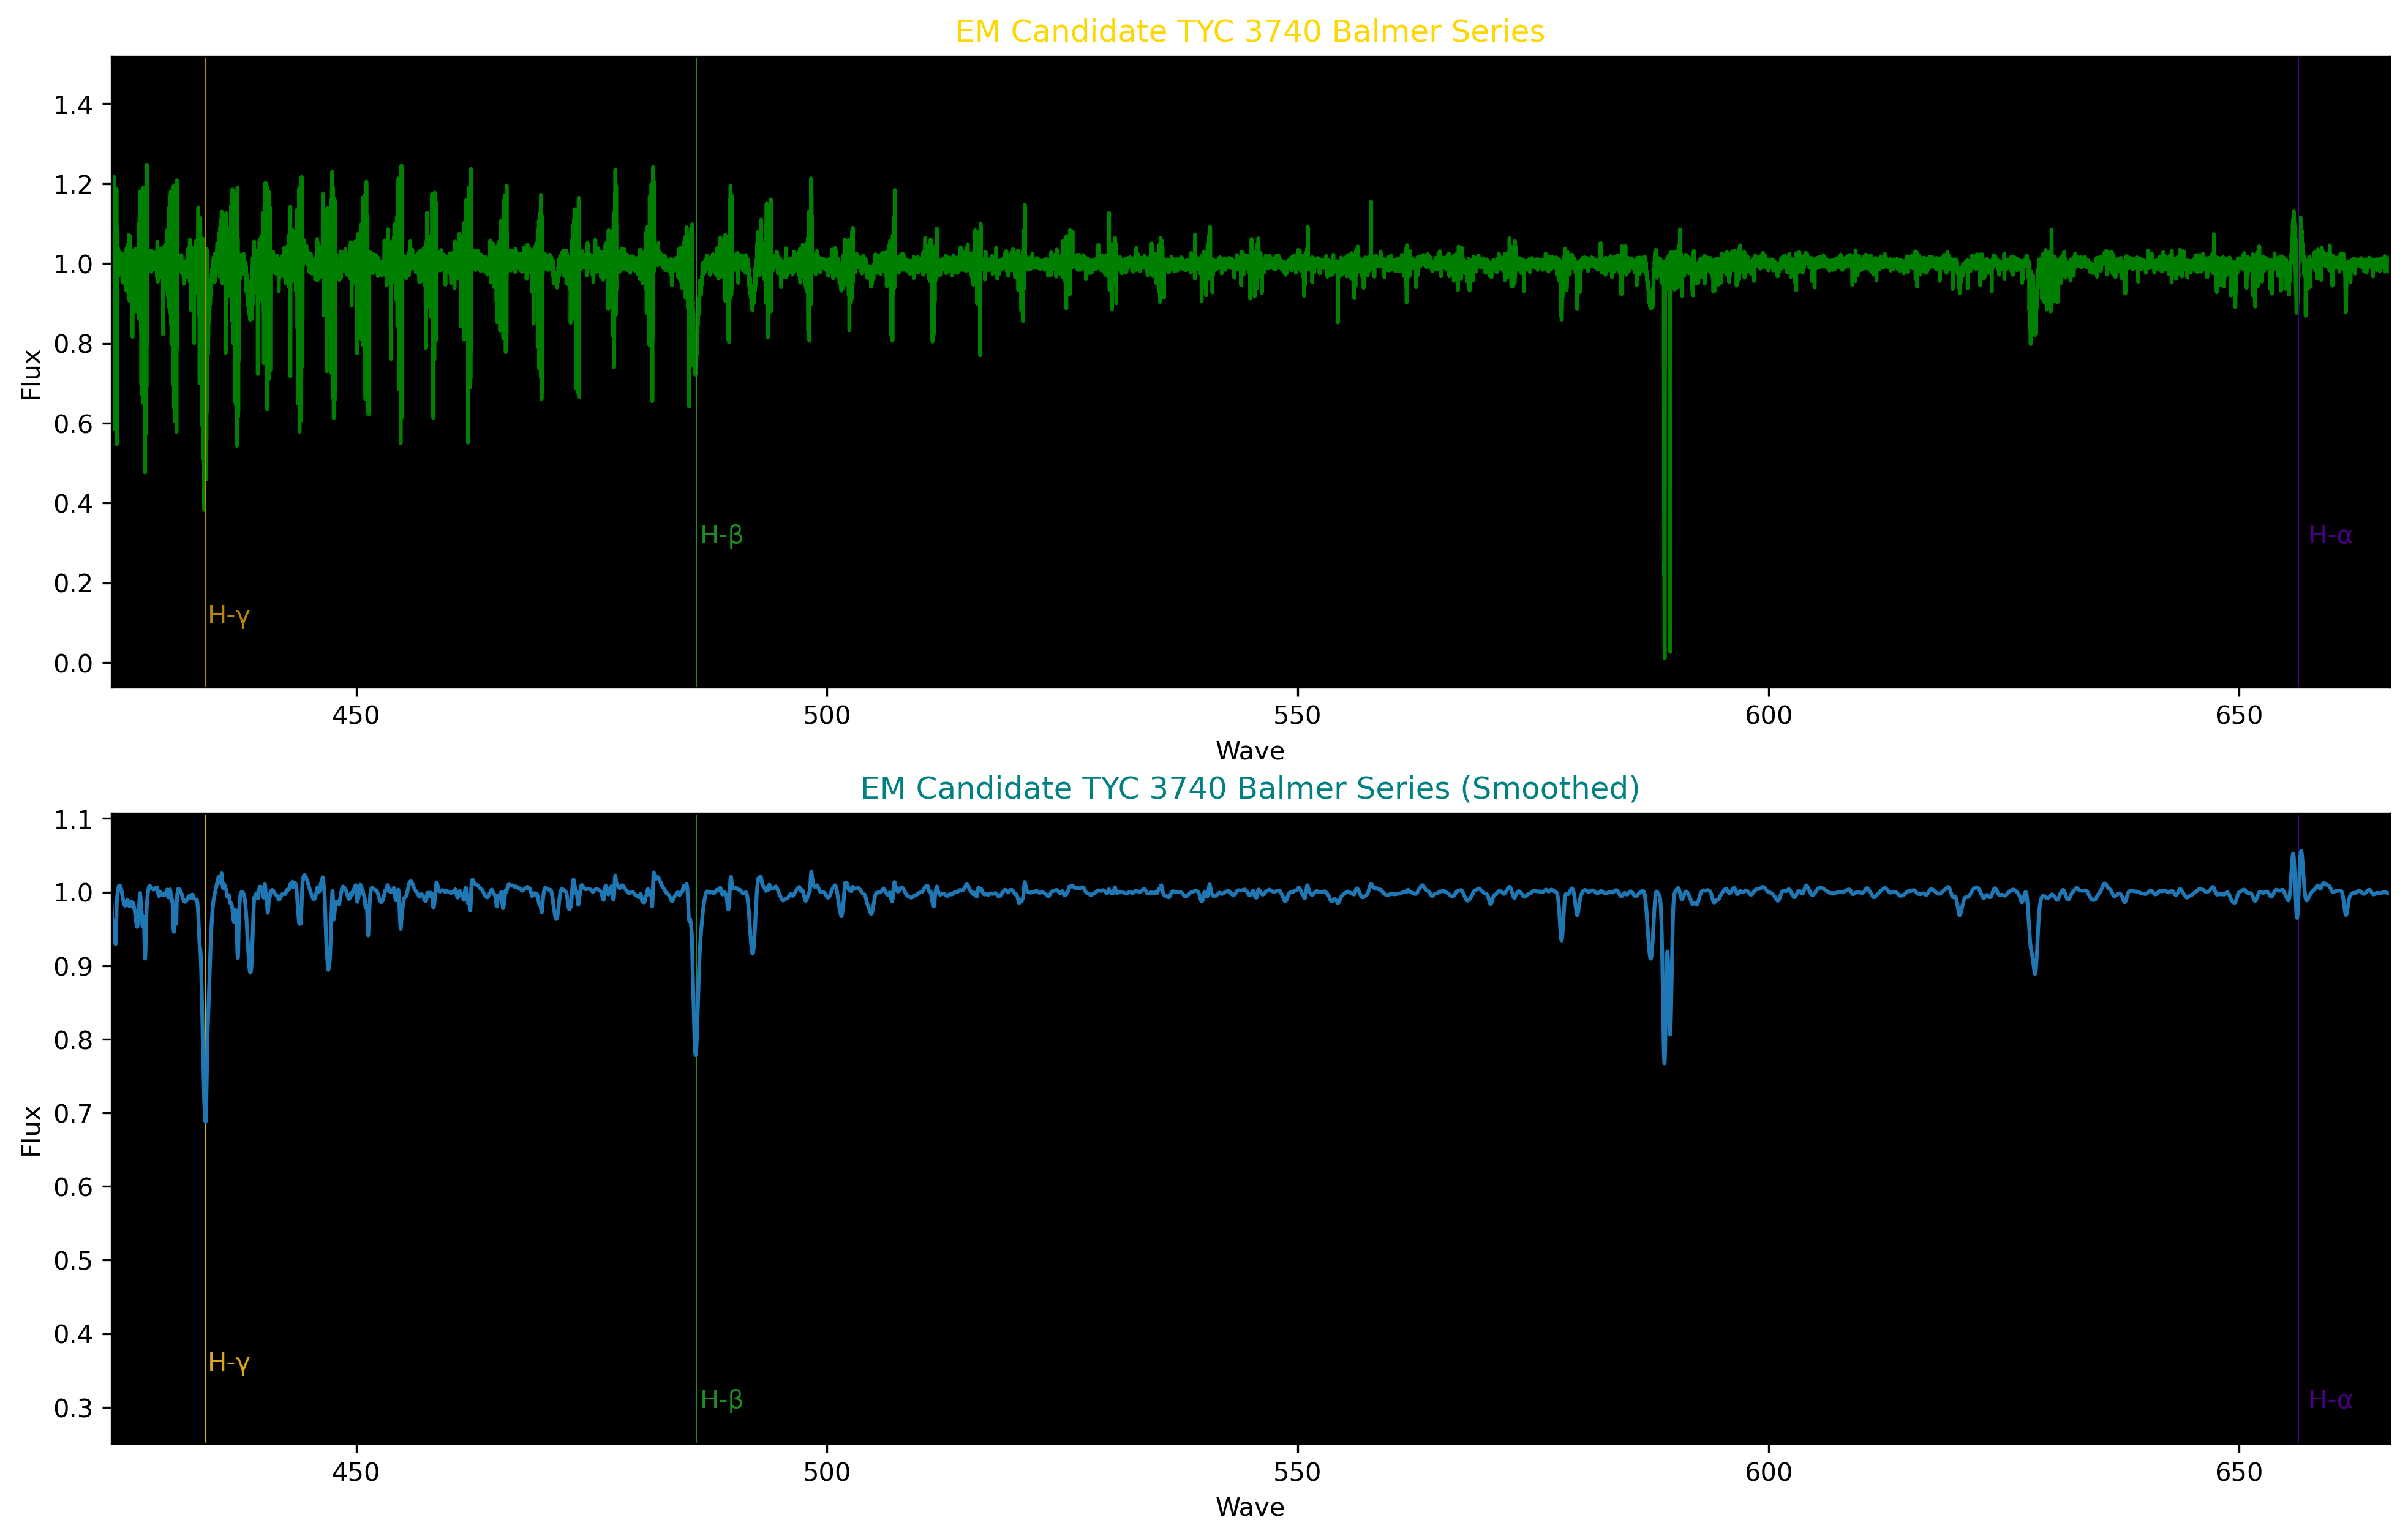

<Figure size 432x288 with 0 Axes>

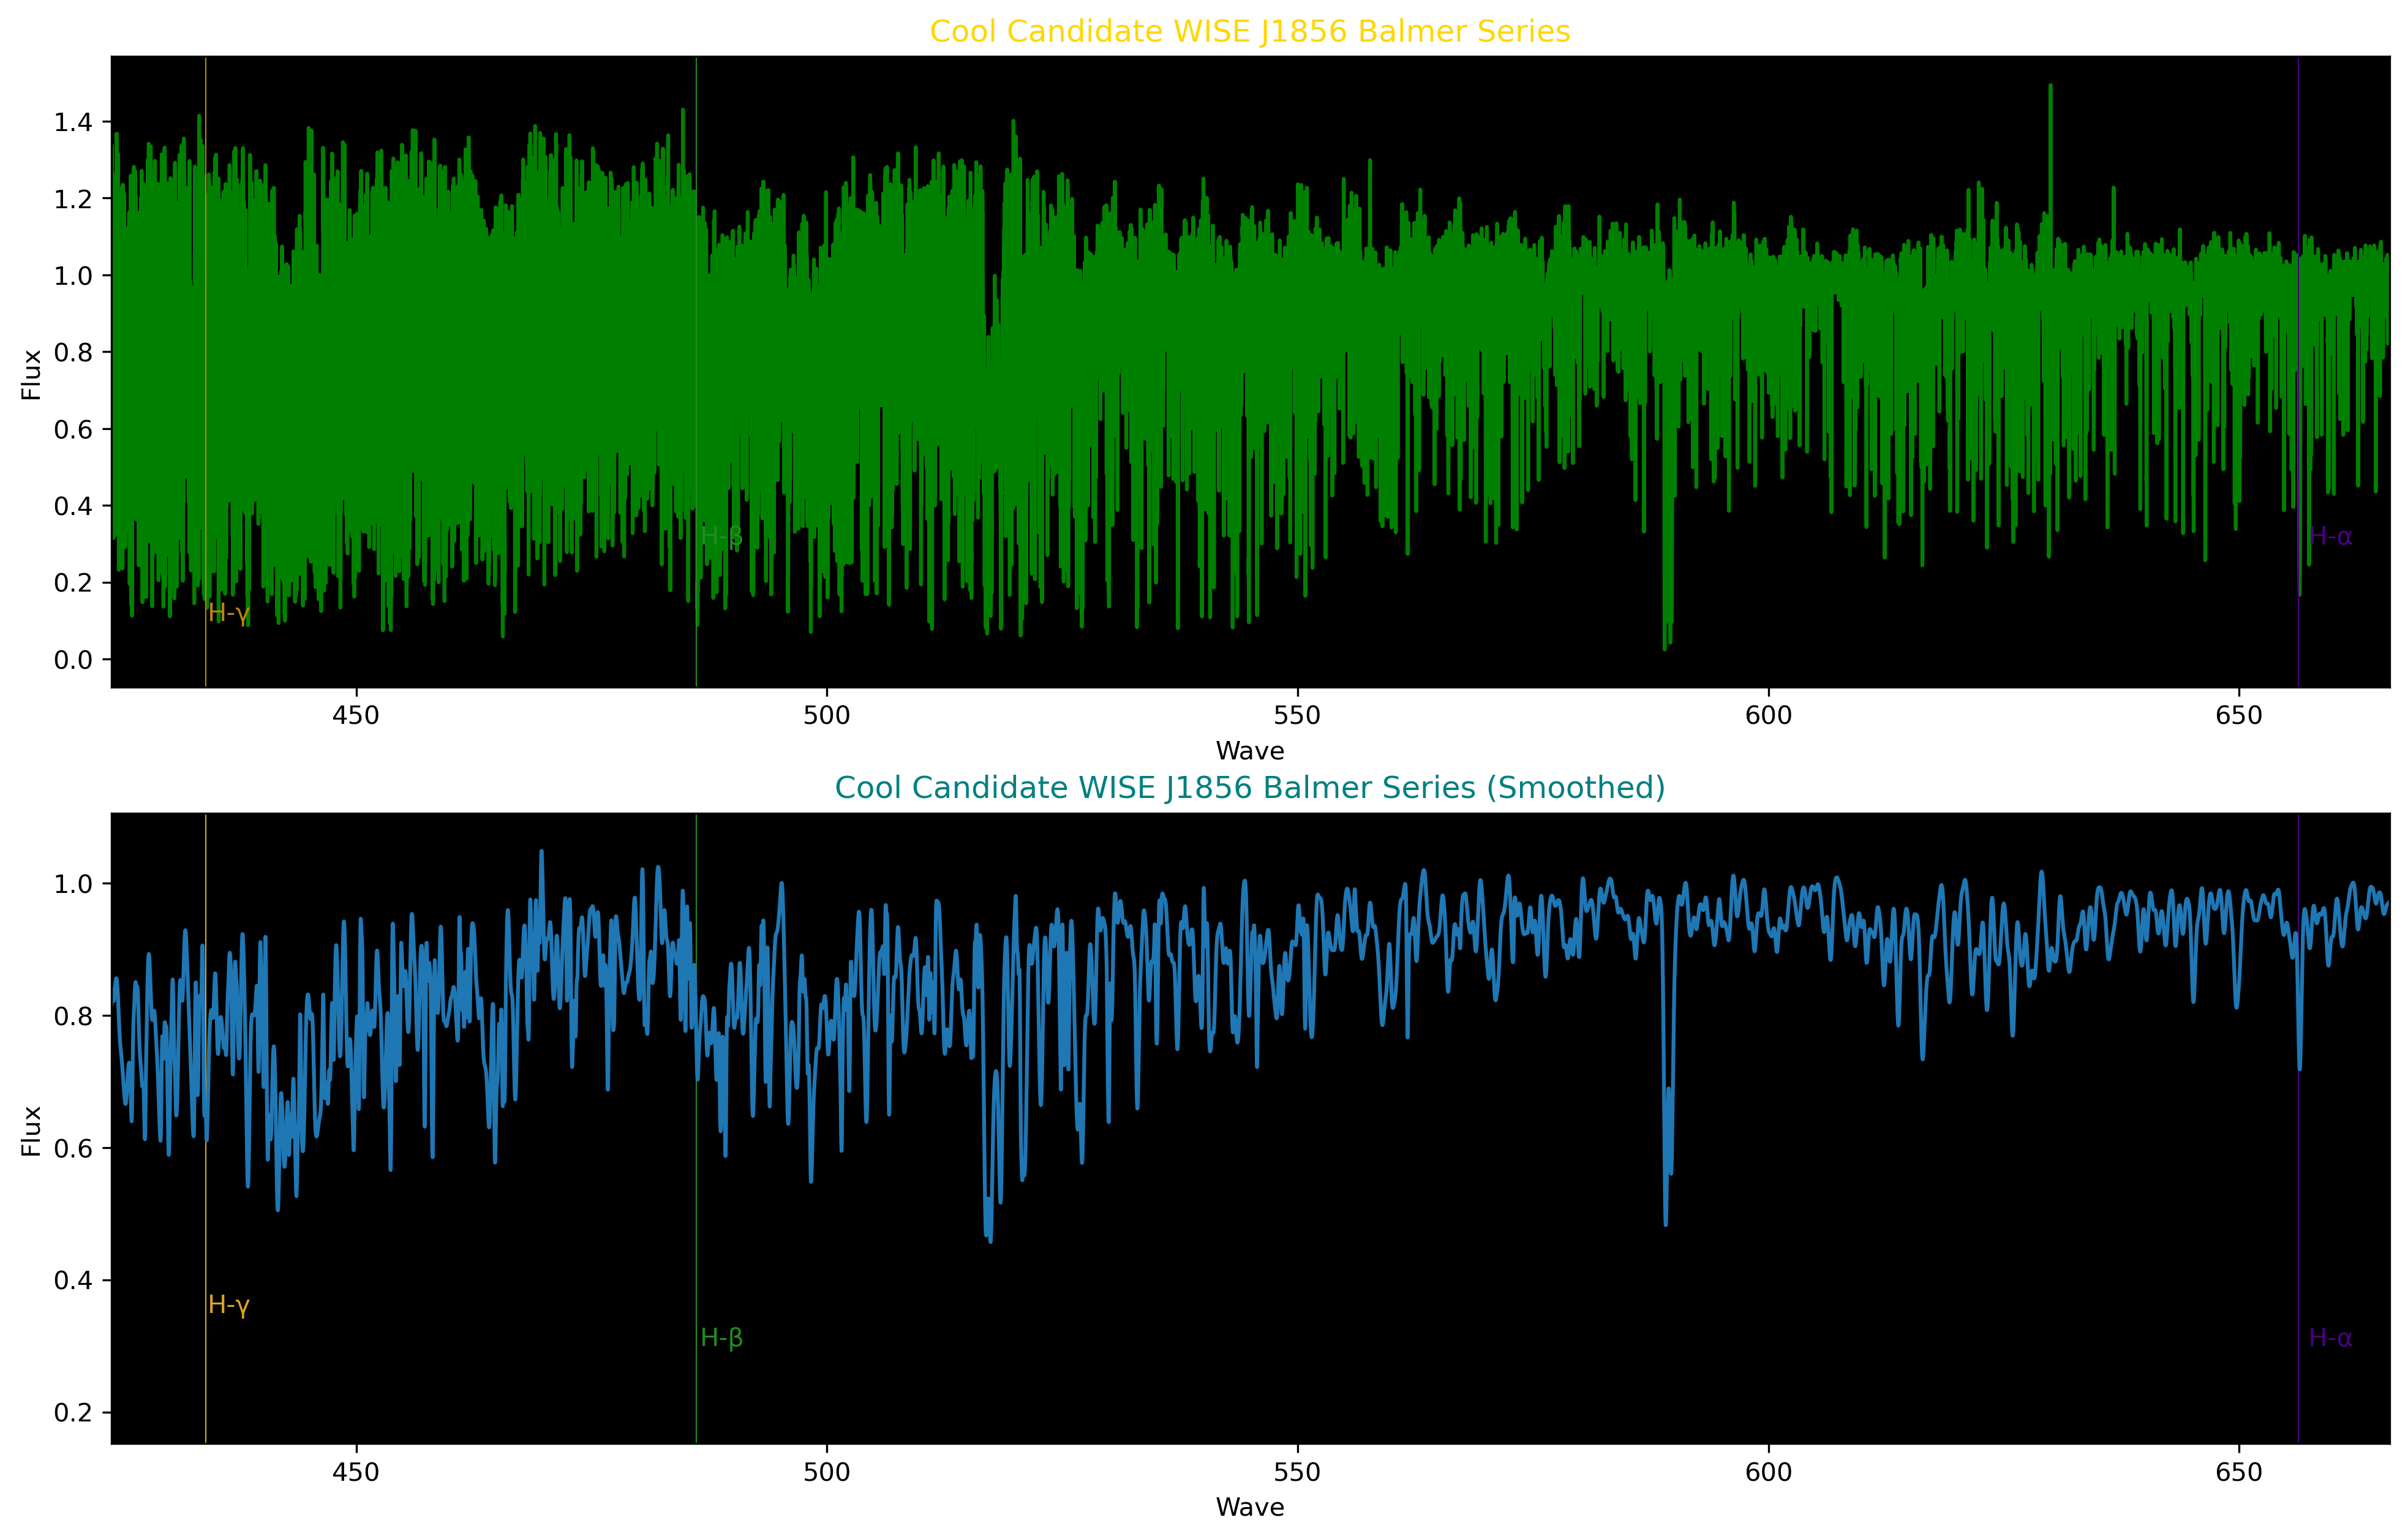

<Figure size 432x288 with 0 Axes>

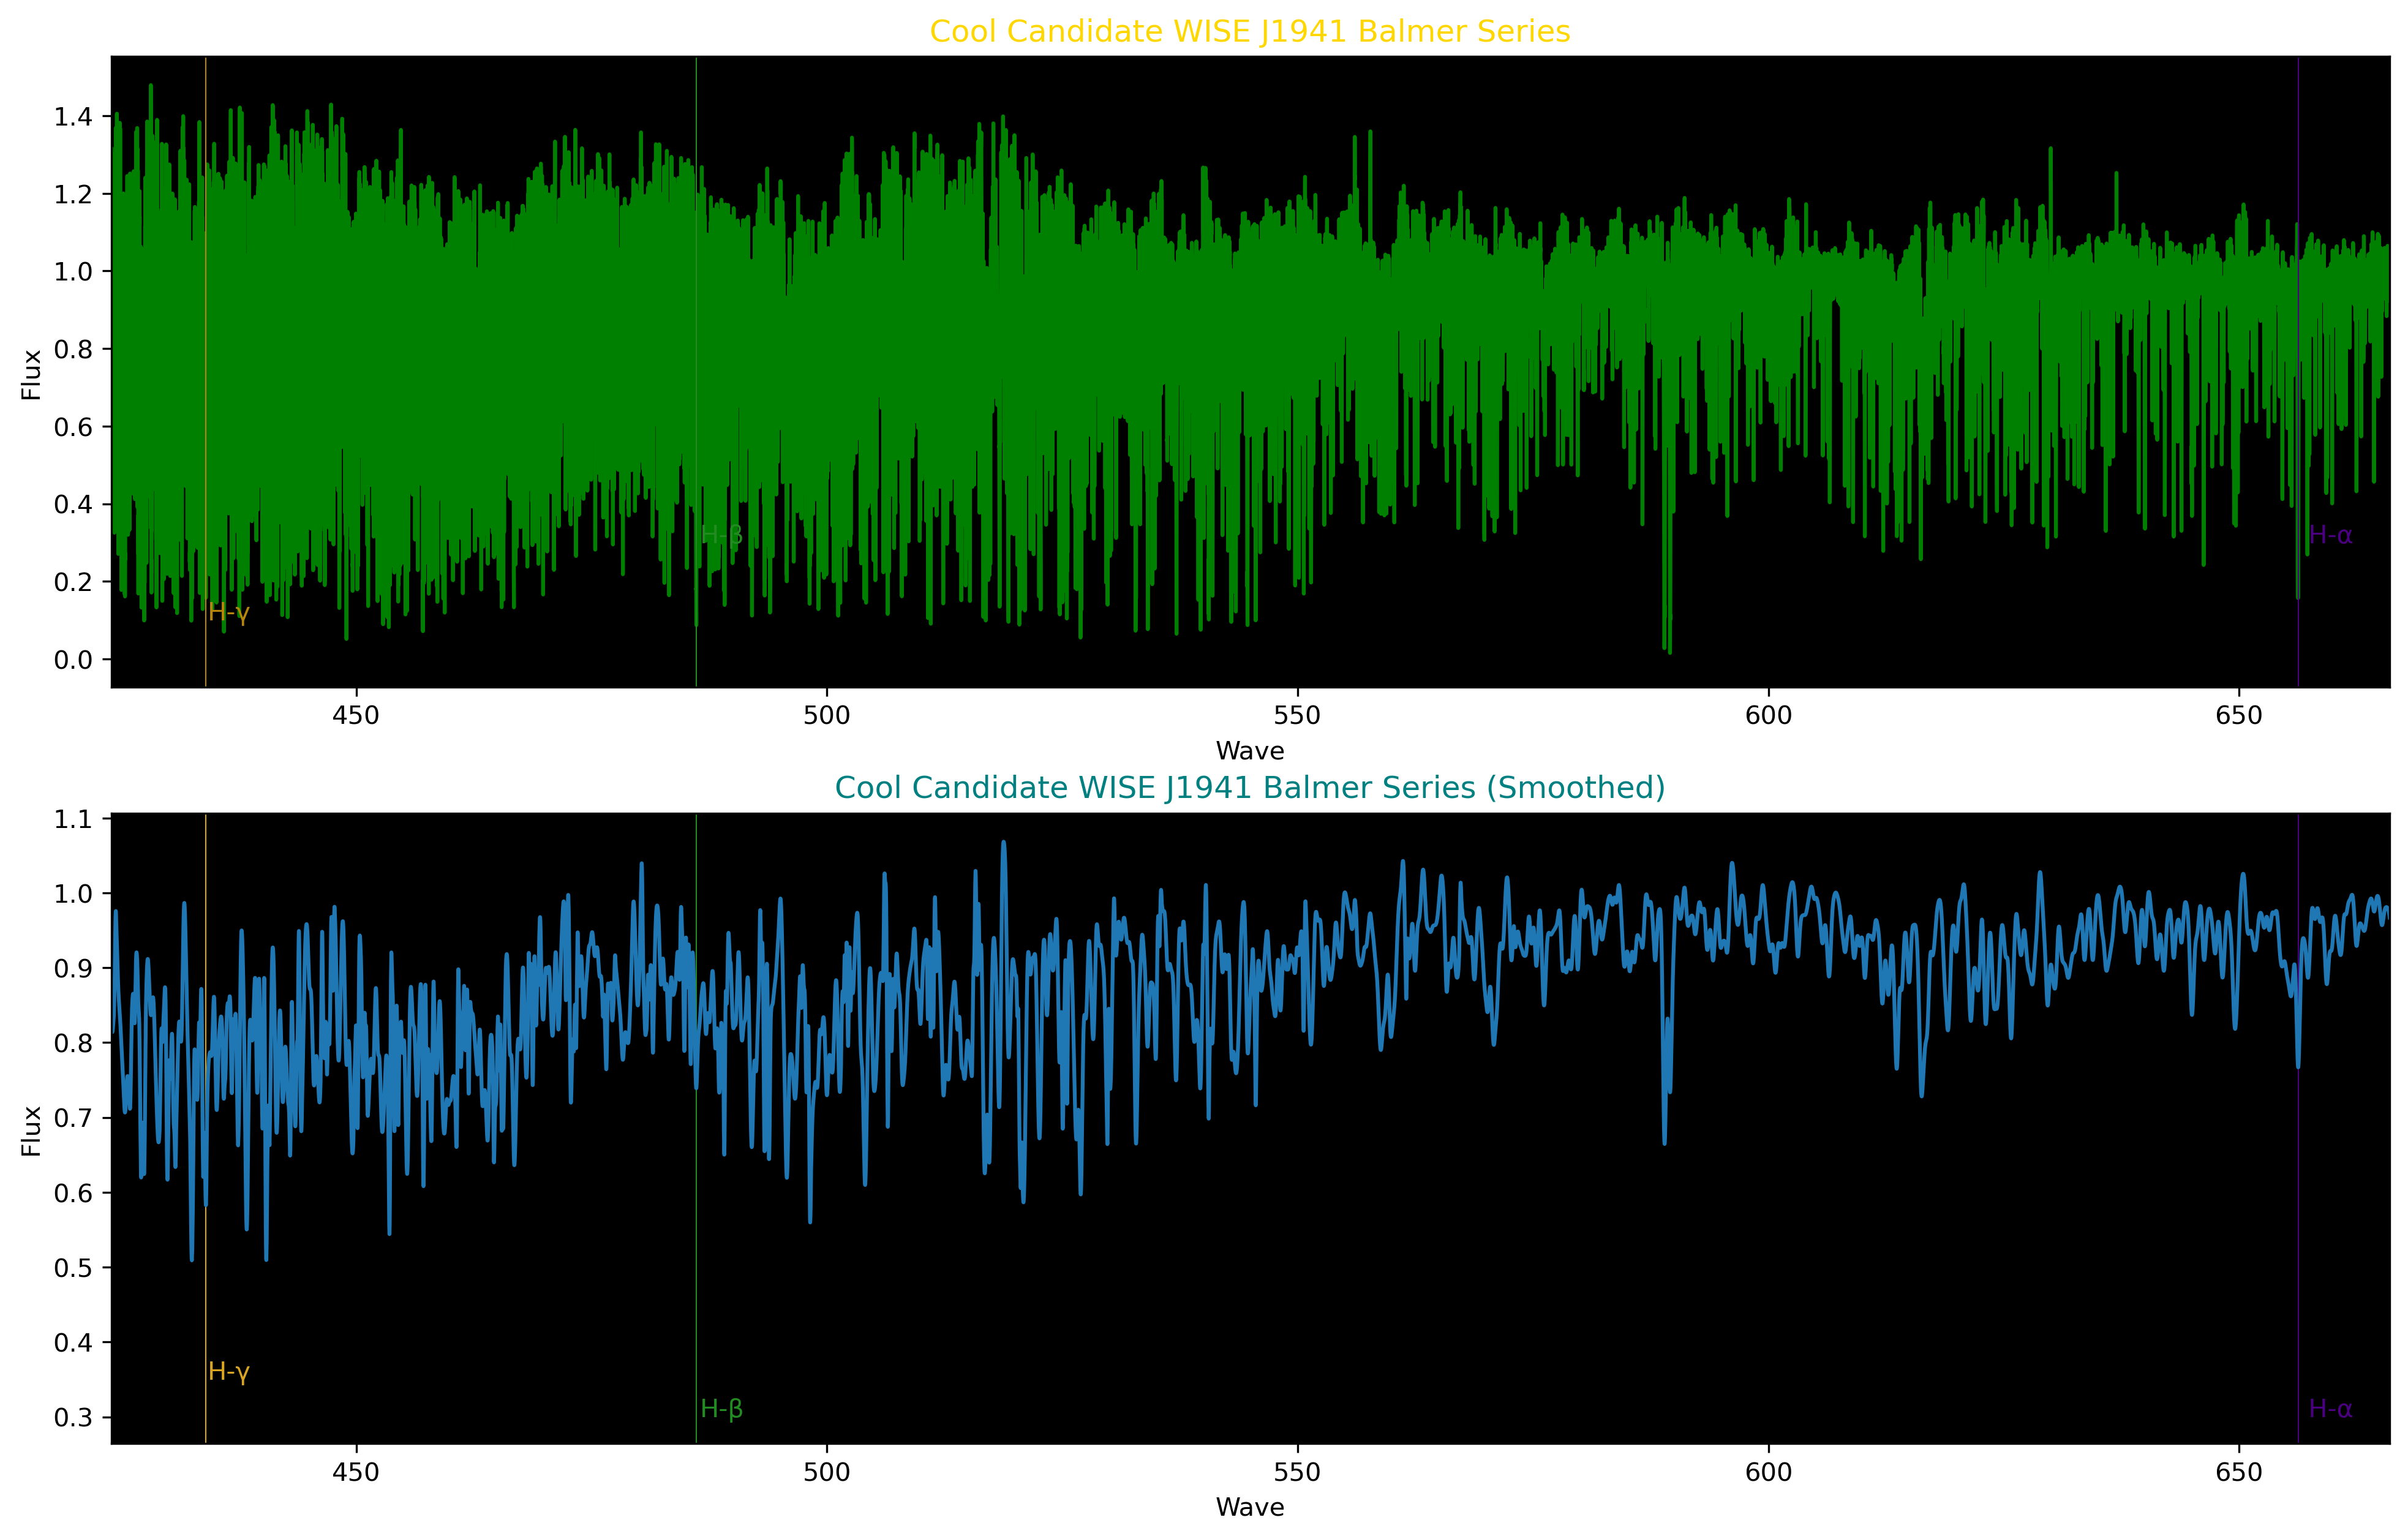

<Figure size 432x288 with 0 Axes>

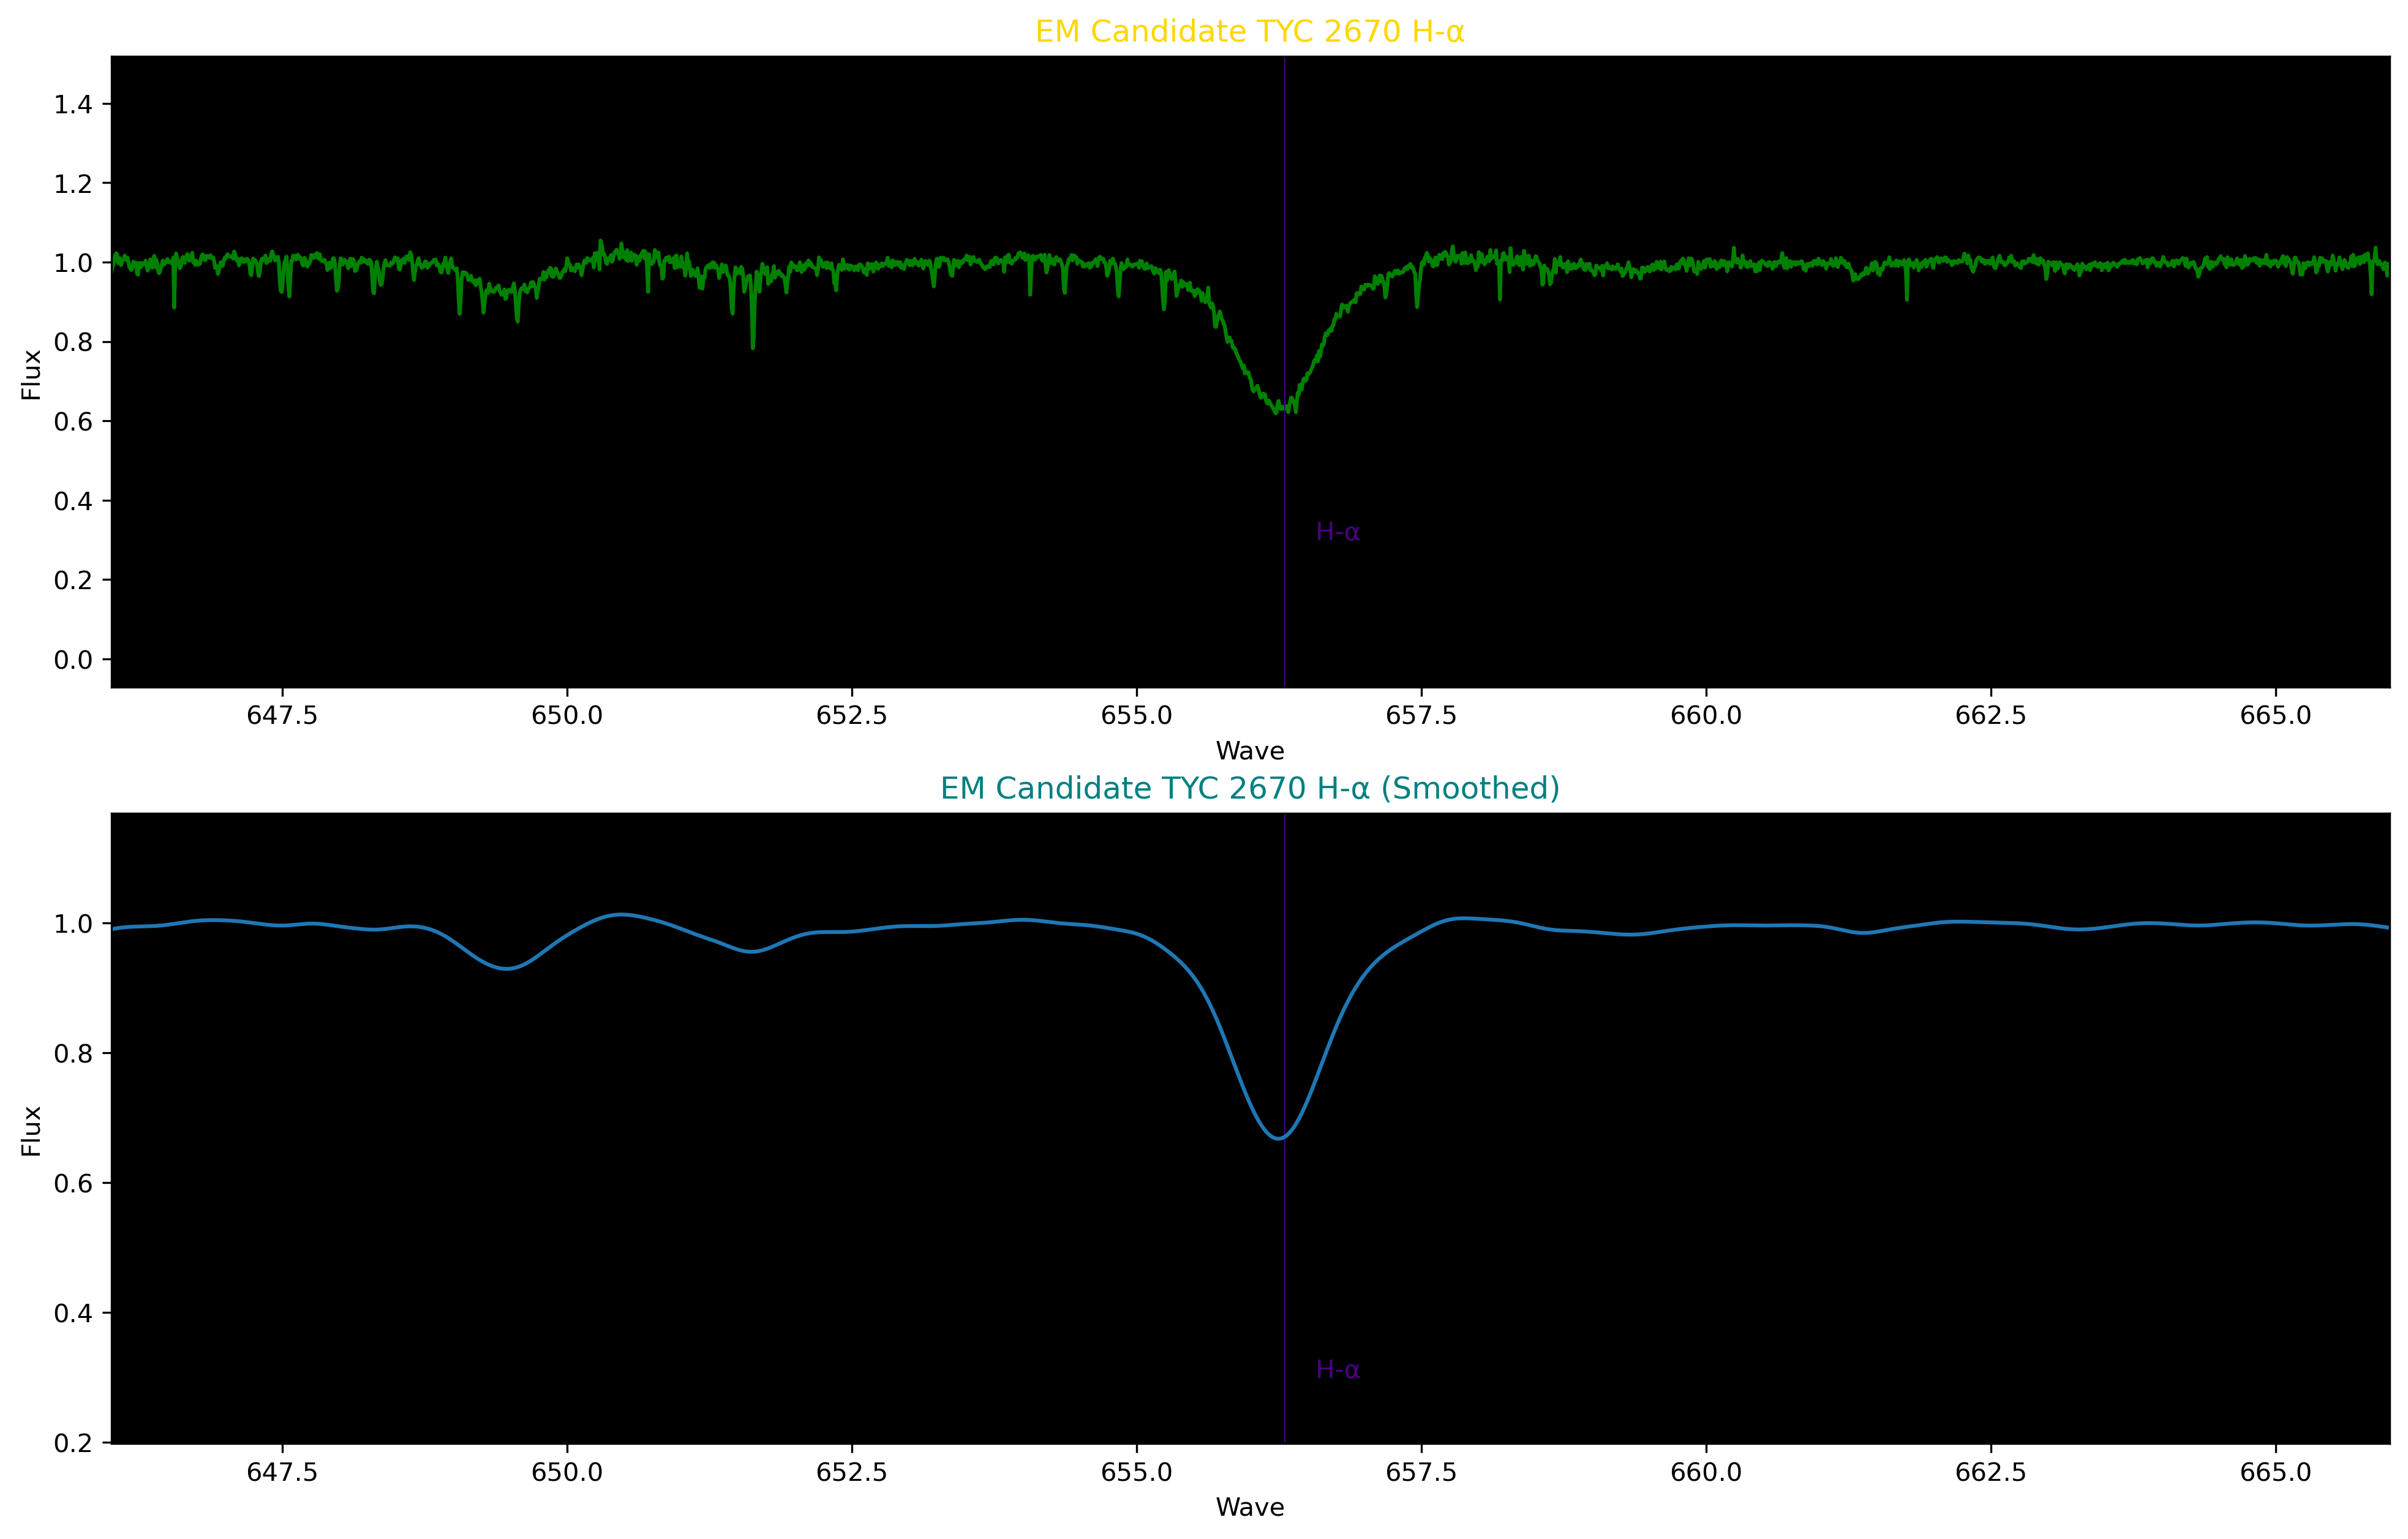

<Figure size 432x288 with 0 Axes>

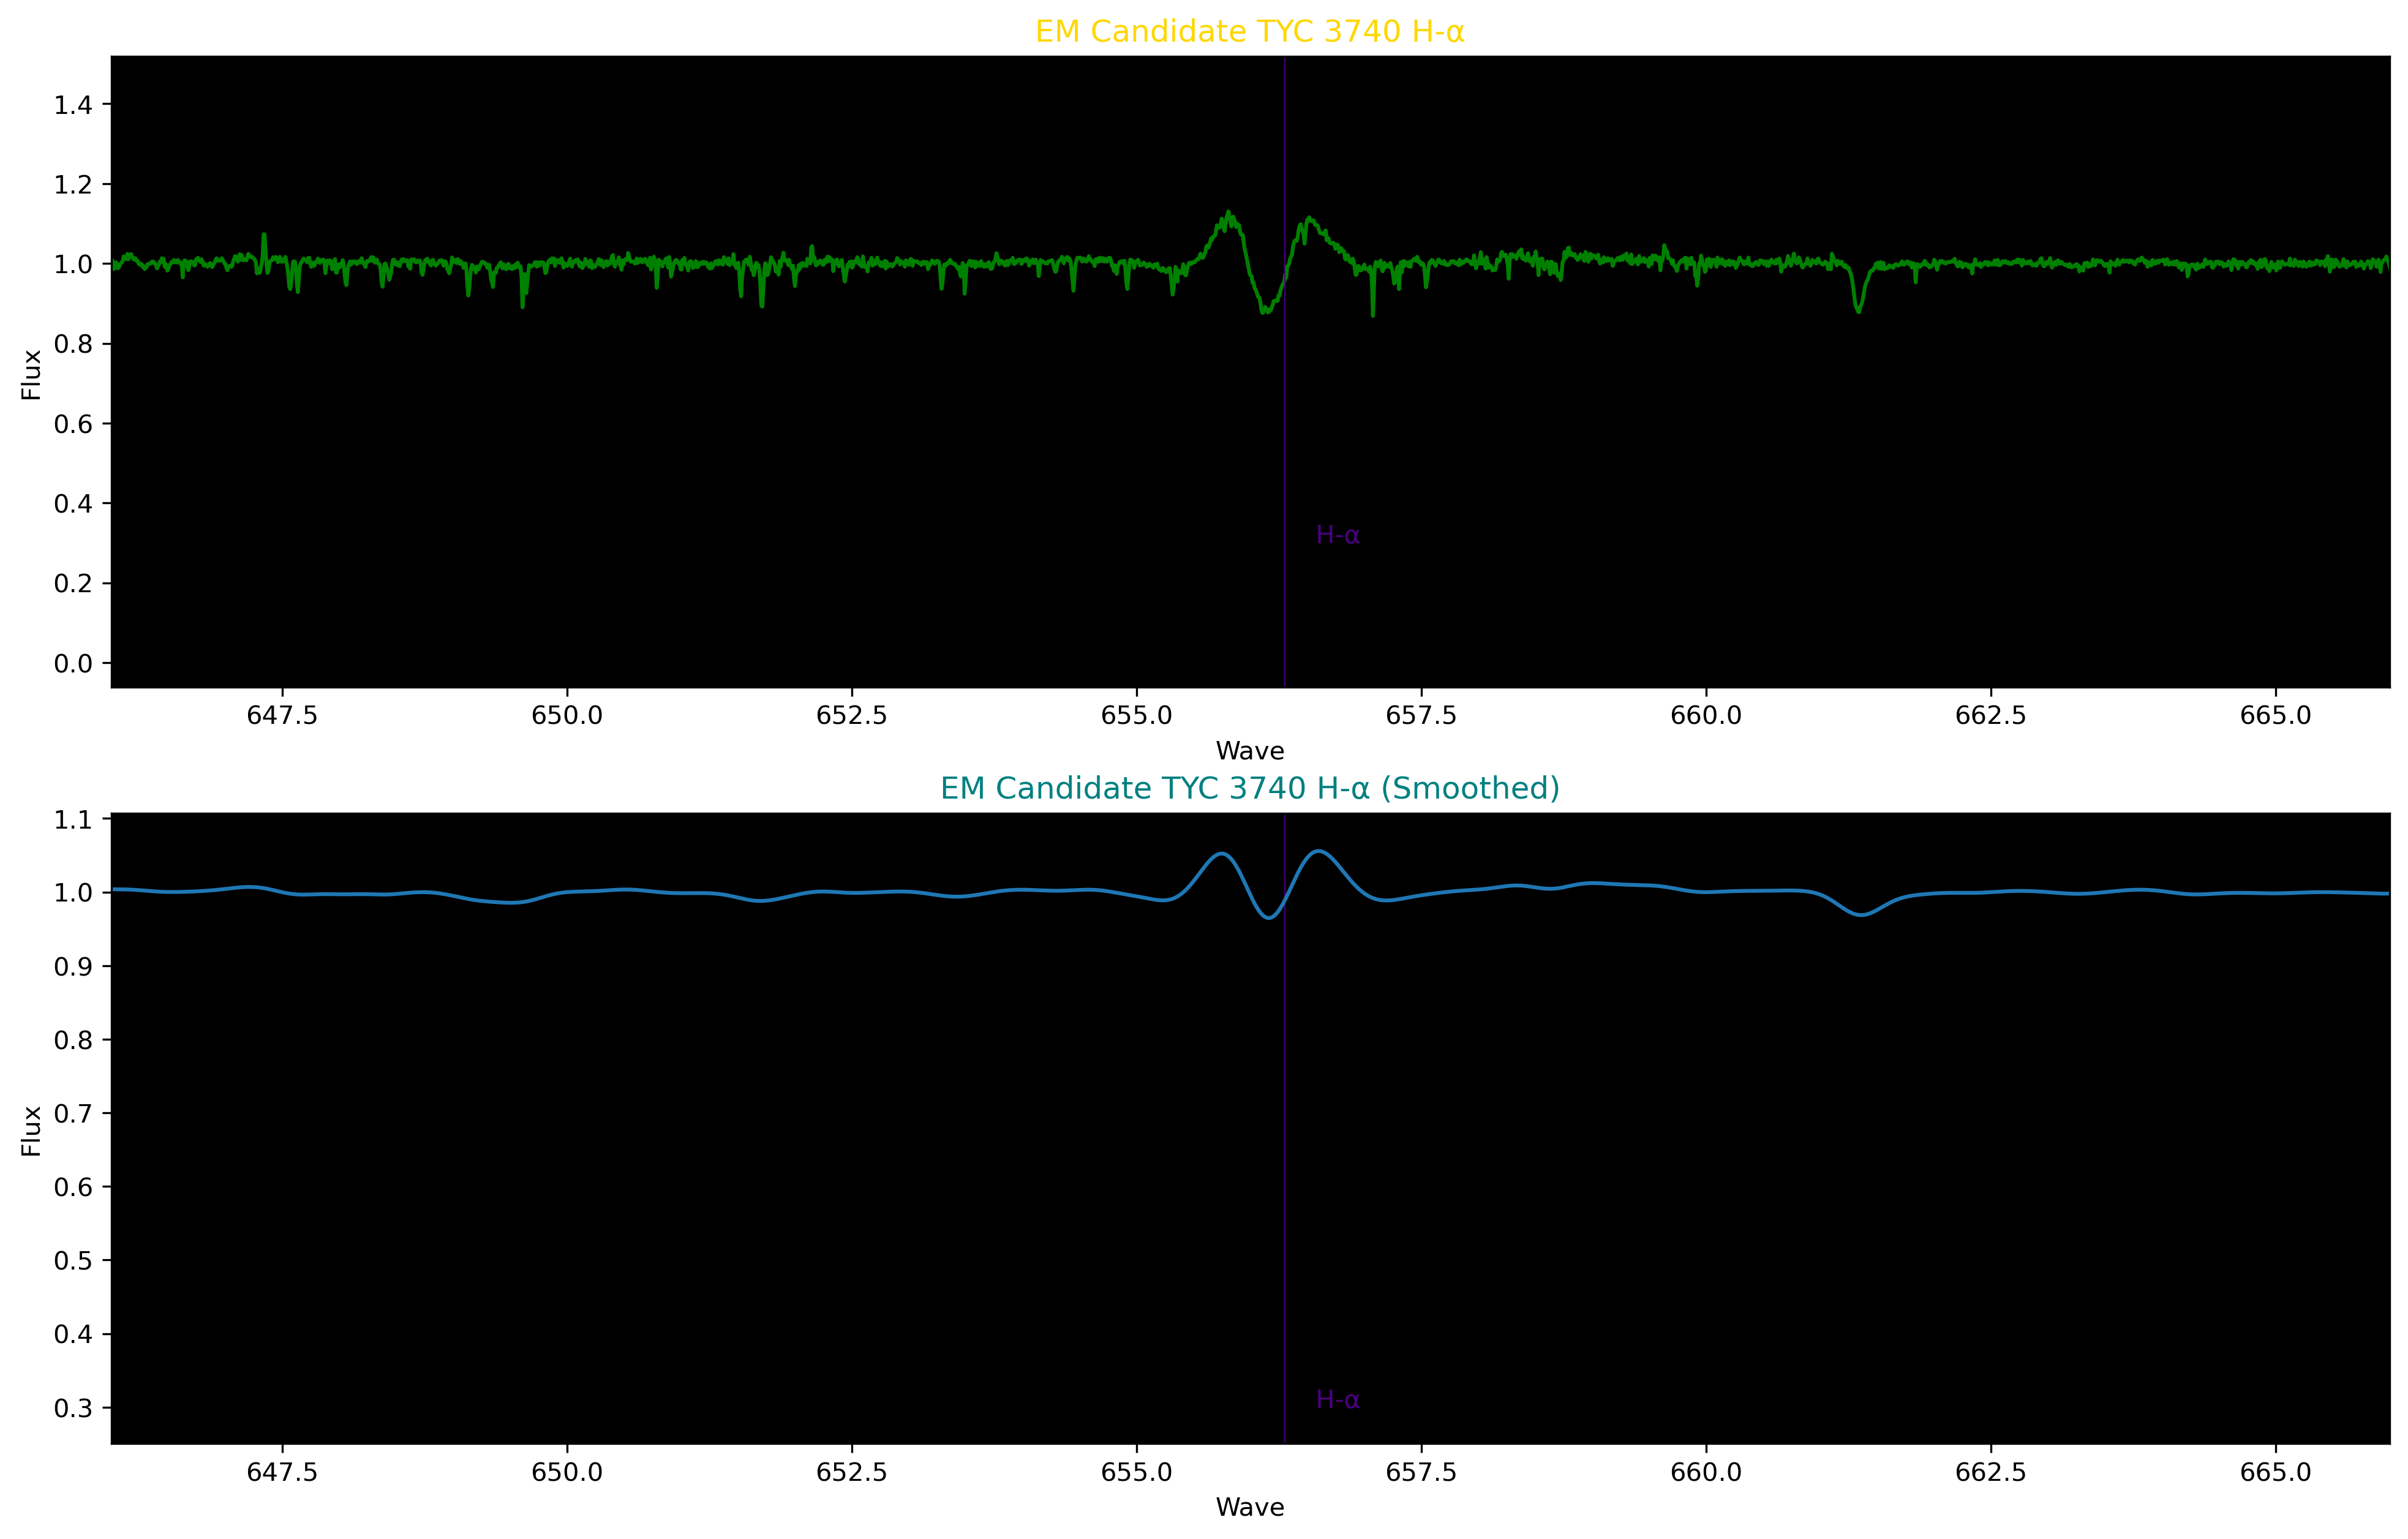

<Figure size 432x288 with 0 Axes>

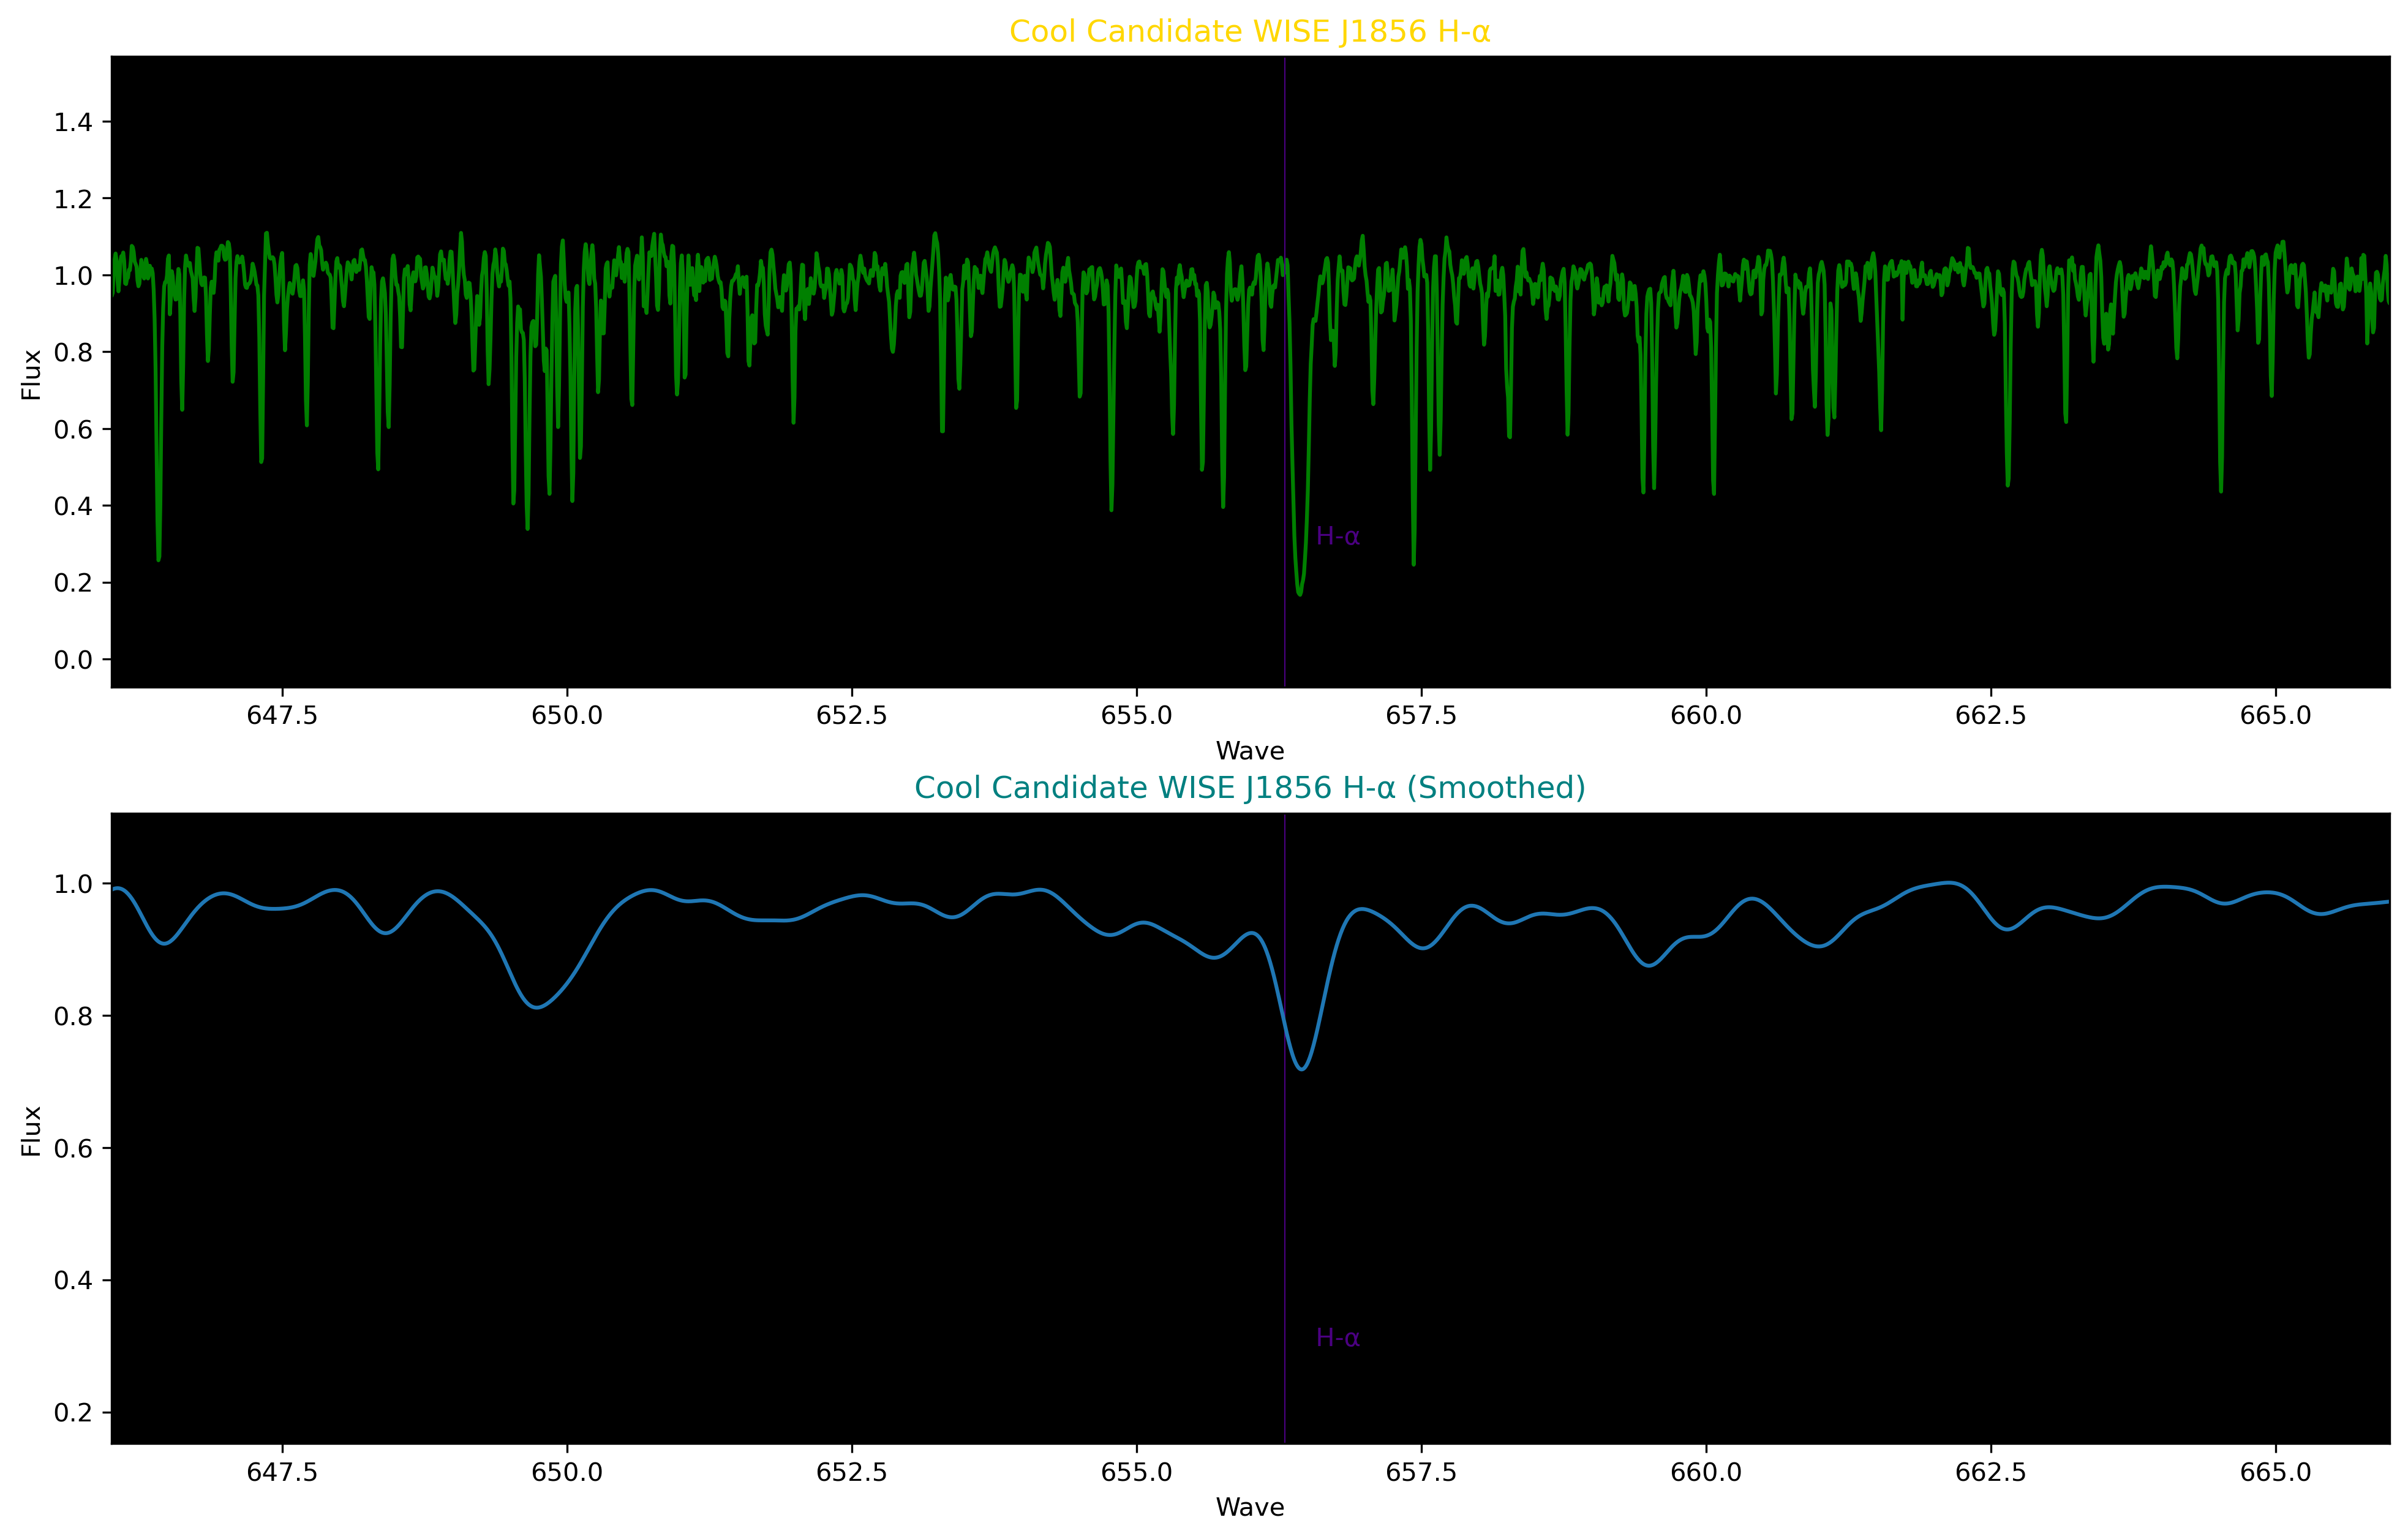

<Figure size 432x288 with 0 Axes>

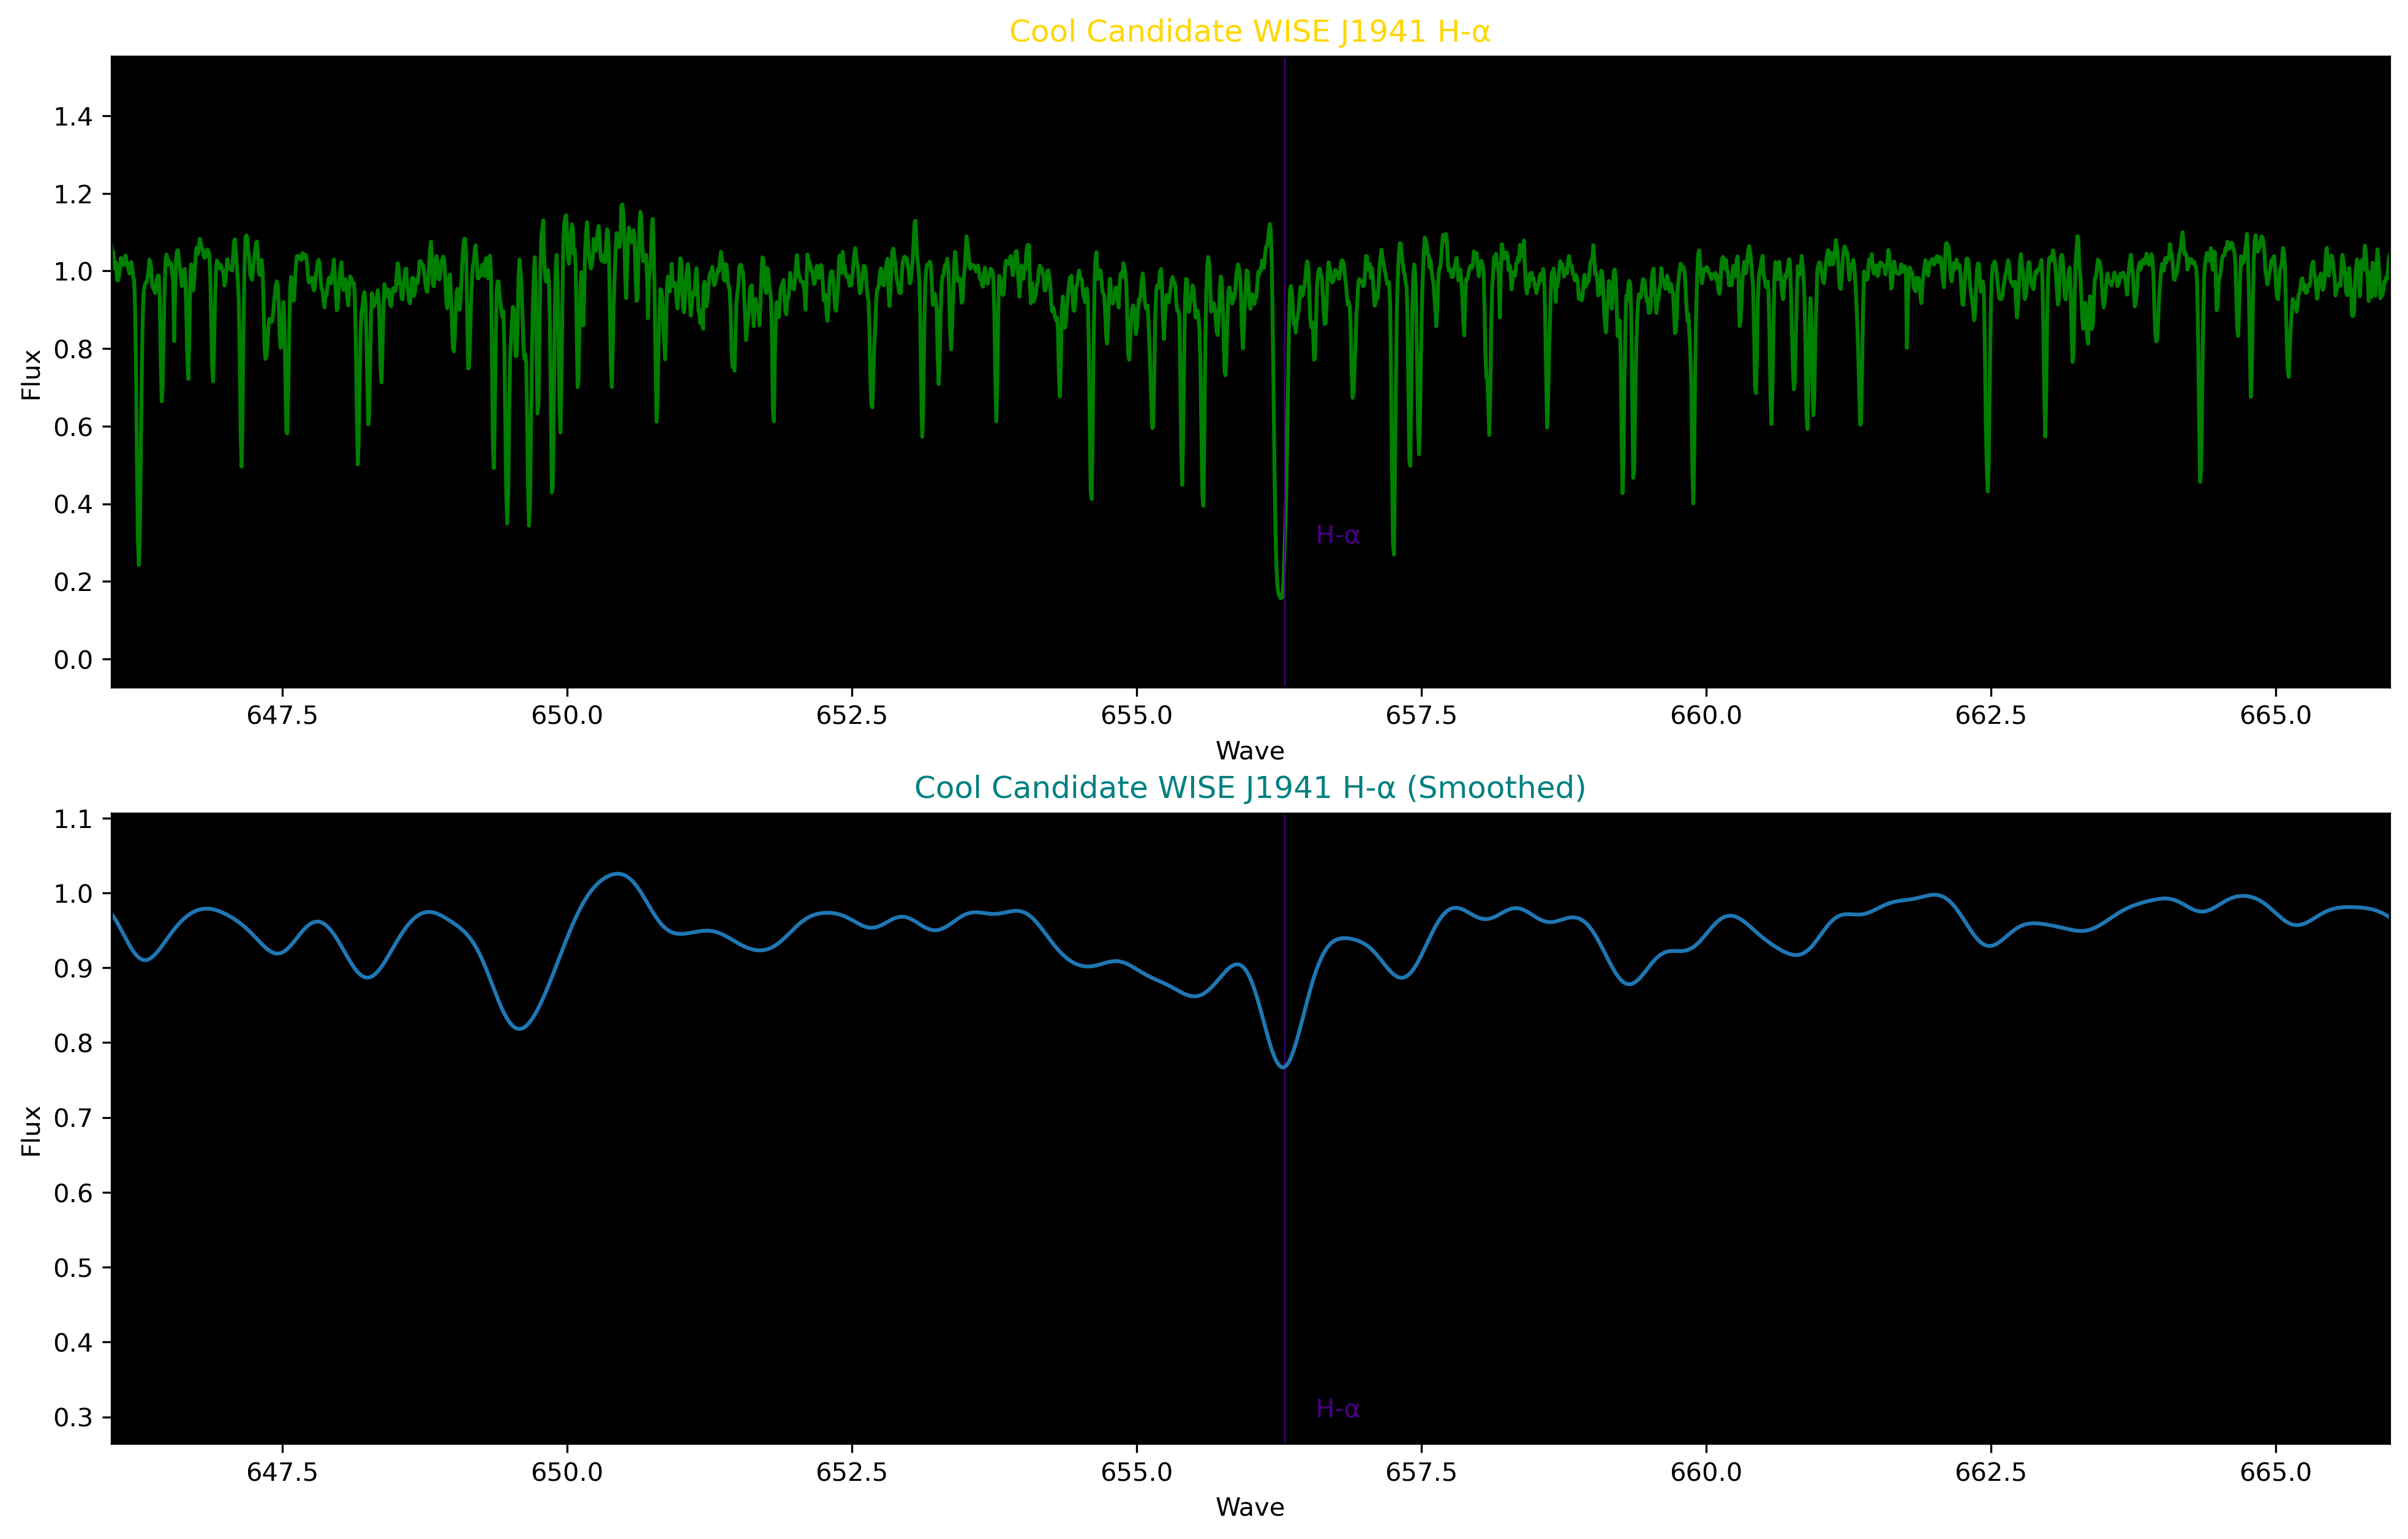

<Figure size 432x288 with 0 Axes>

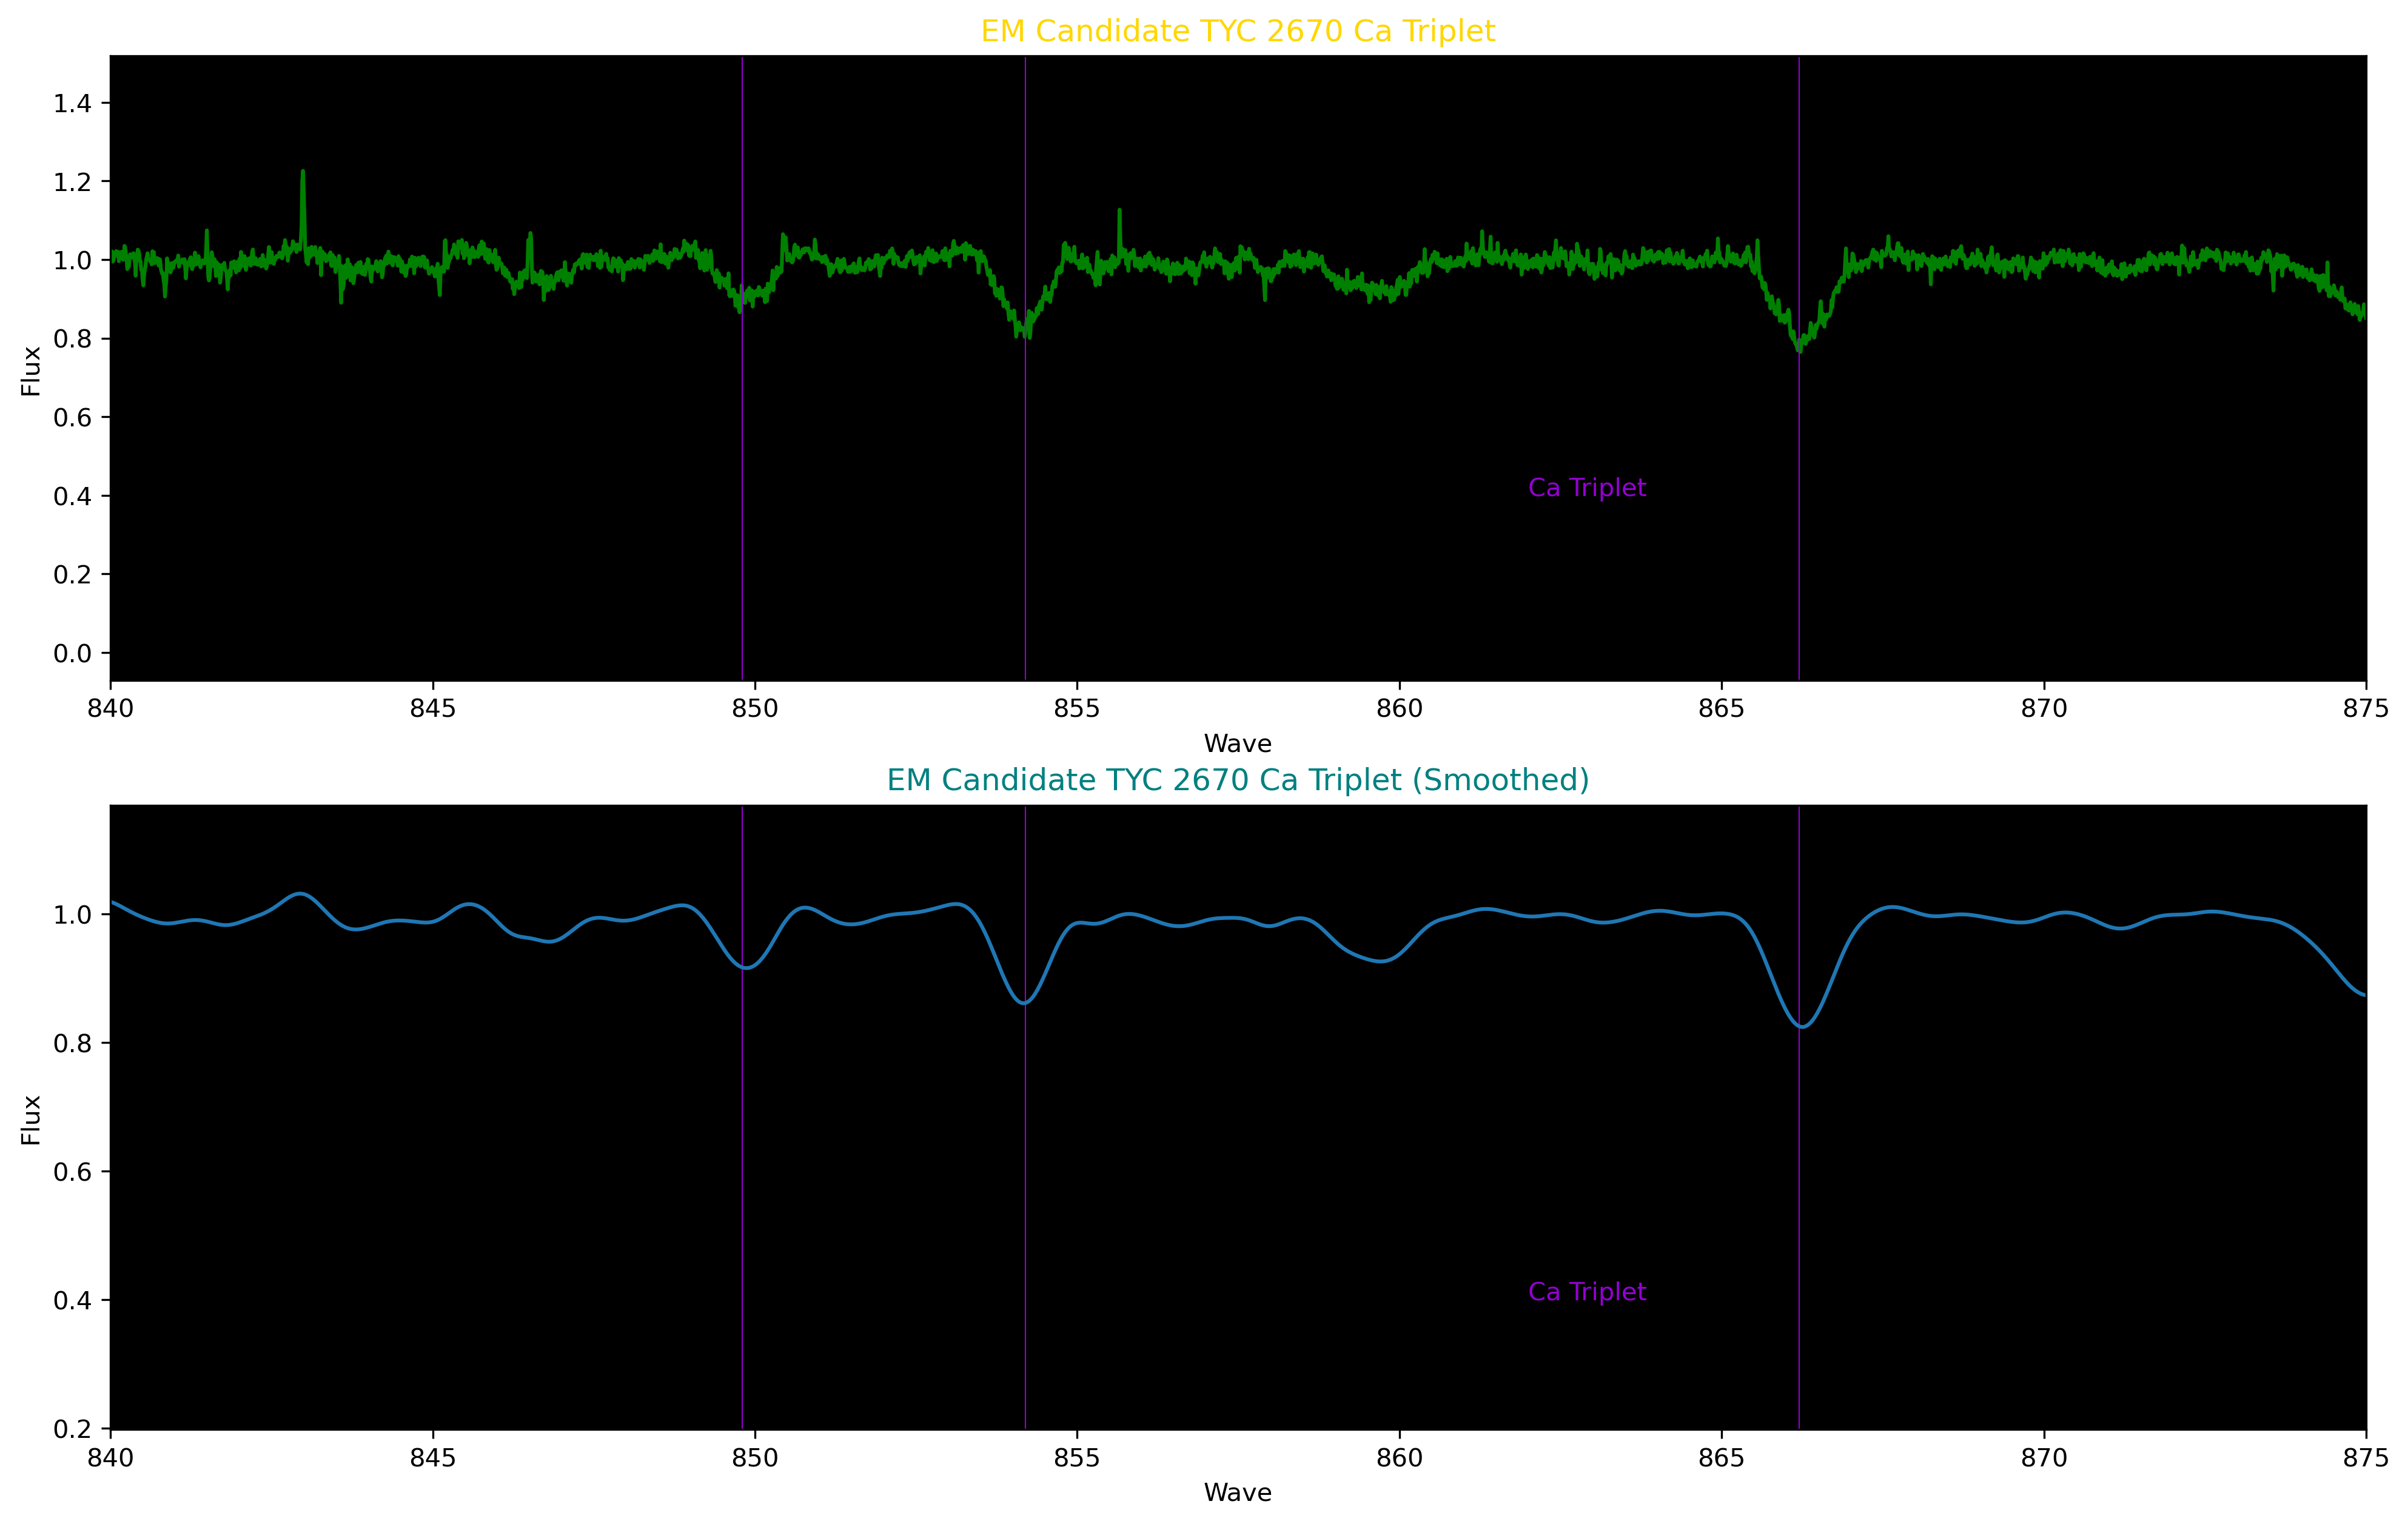

<Figure size 432x288 with 0 Axes>

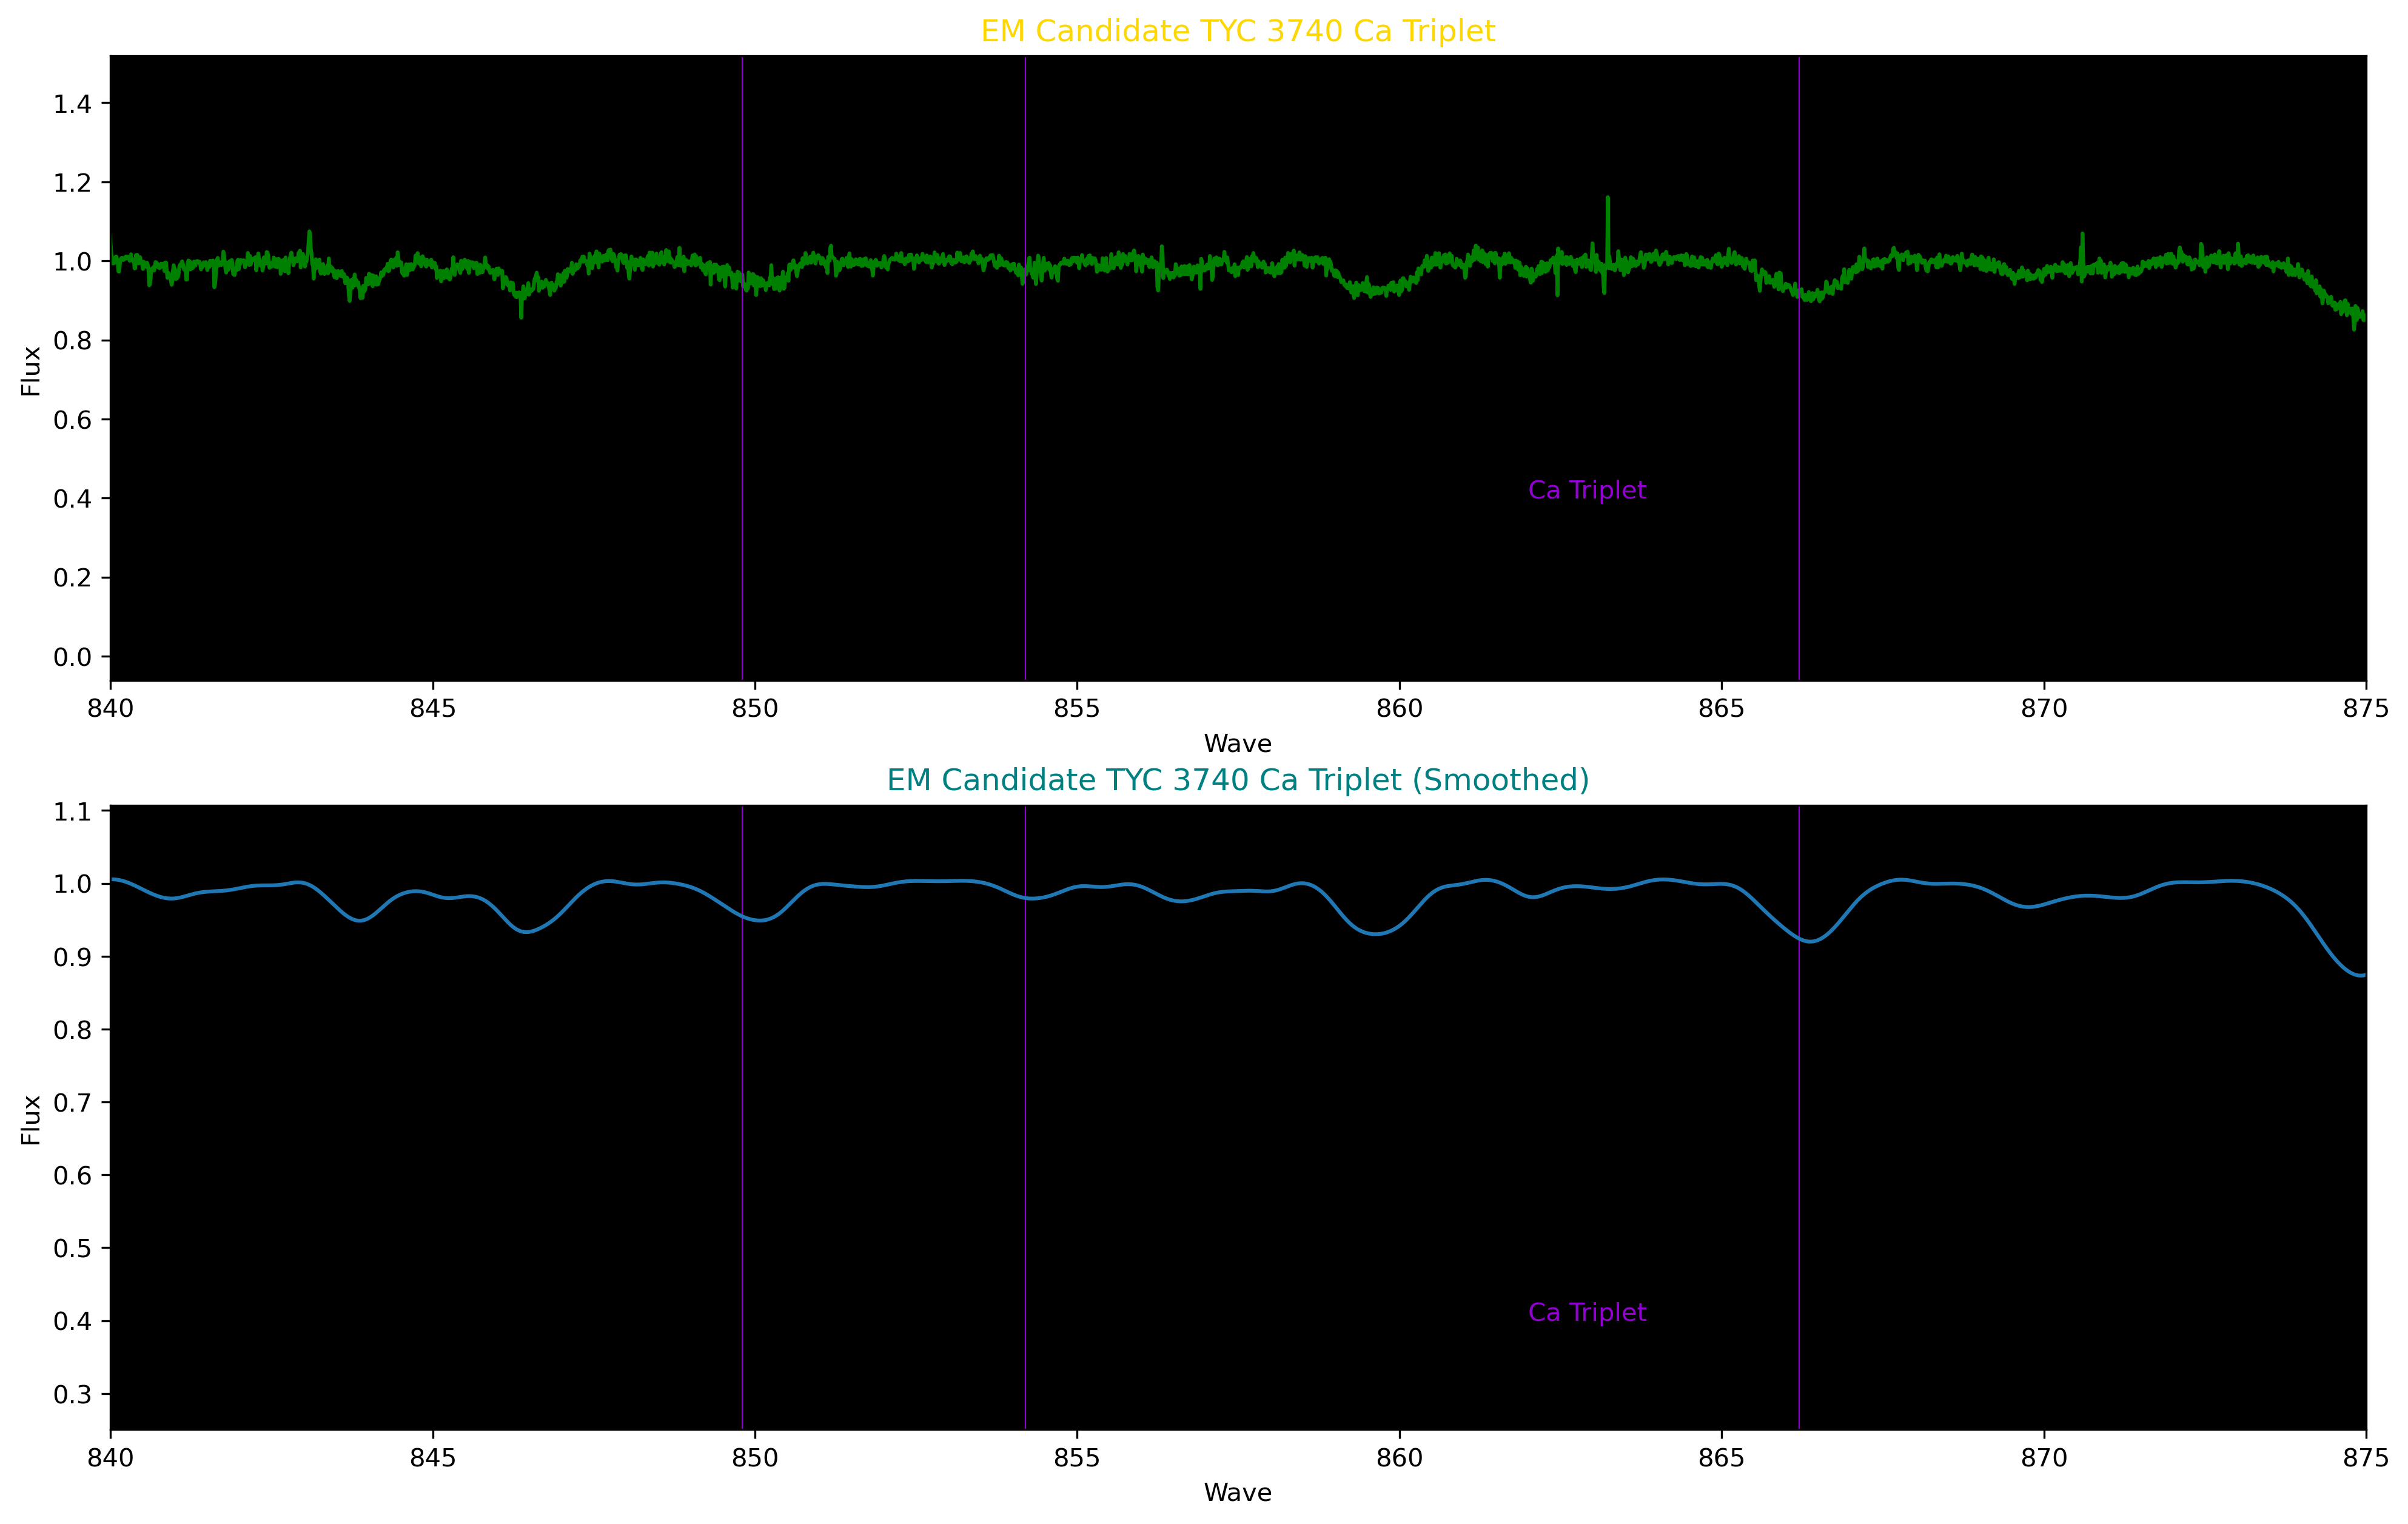

<Figure size 432x288 with 0 Axes>

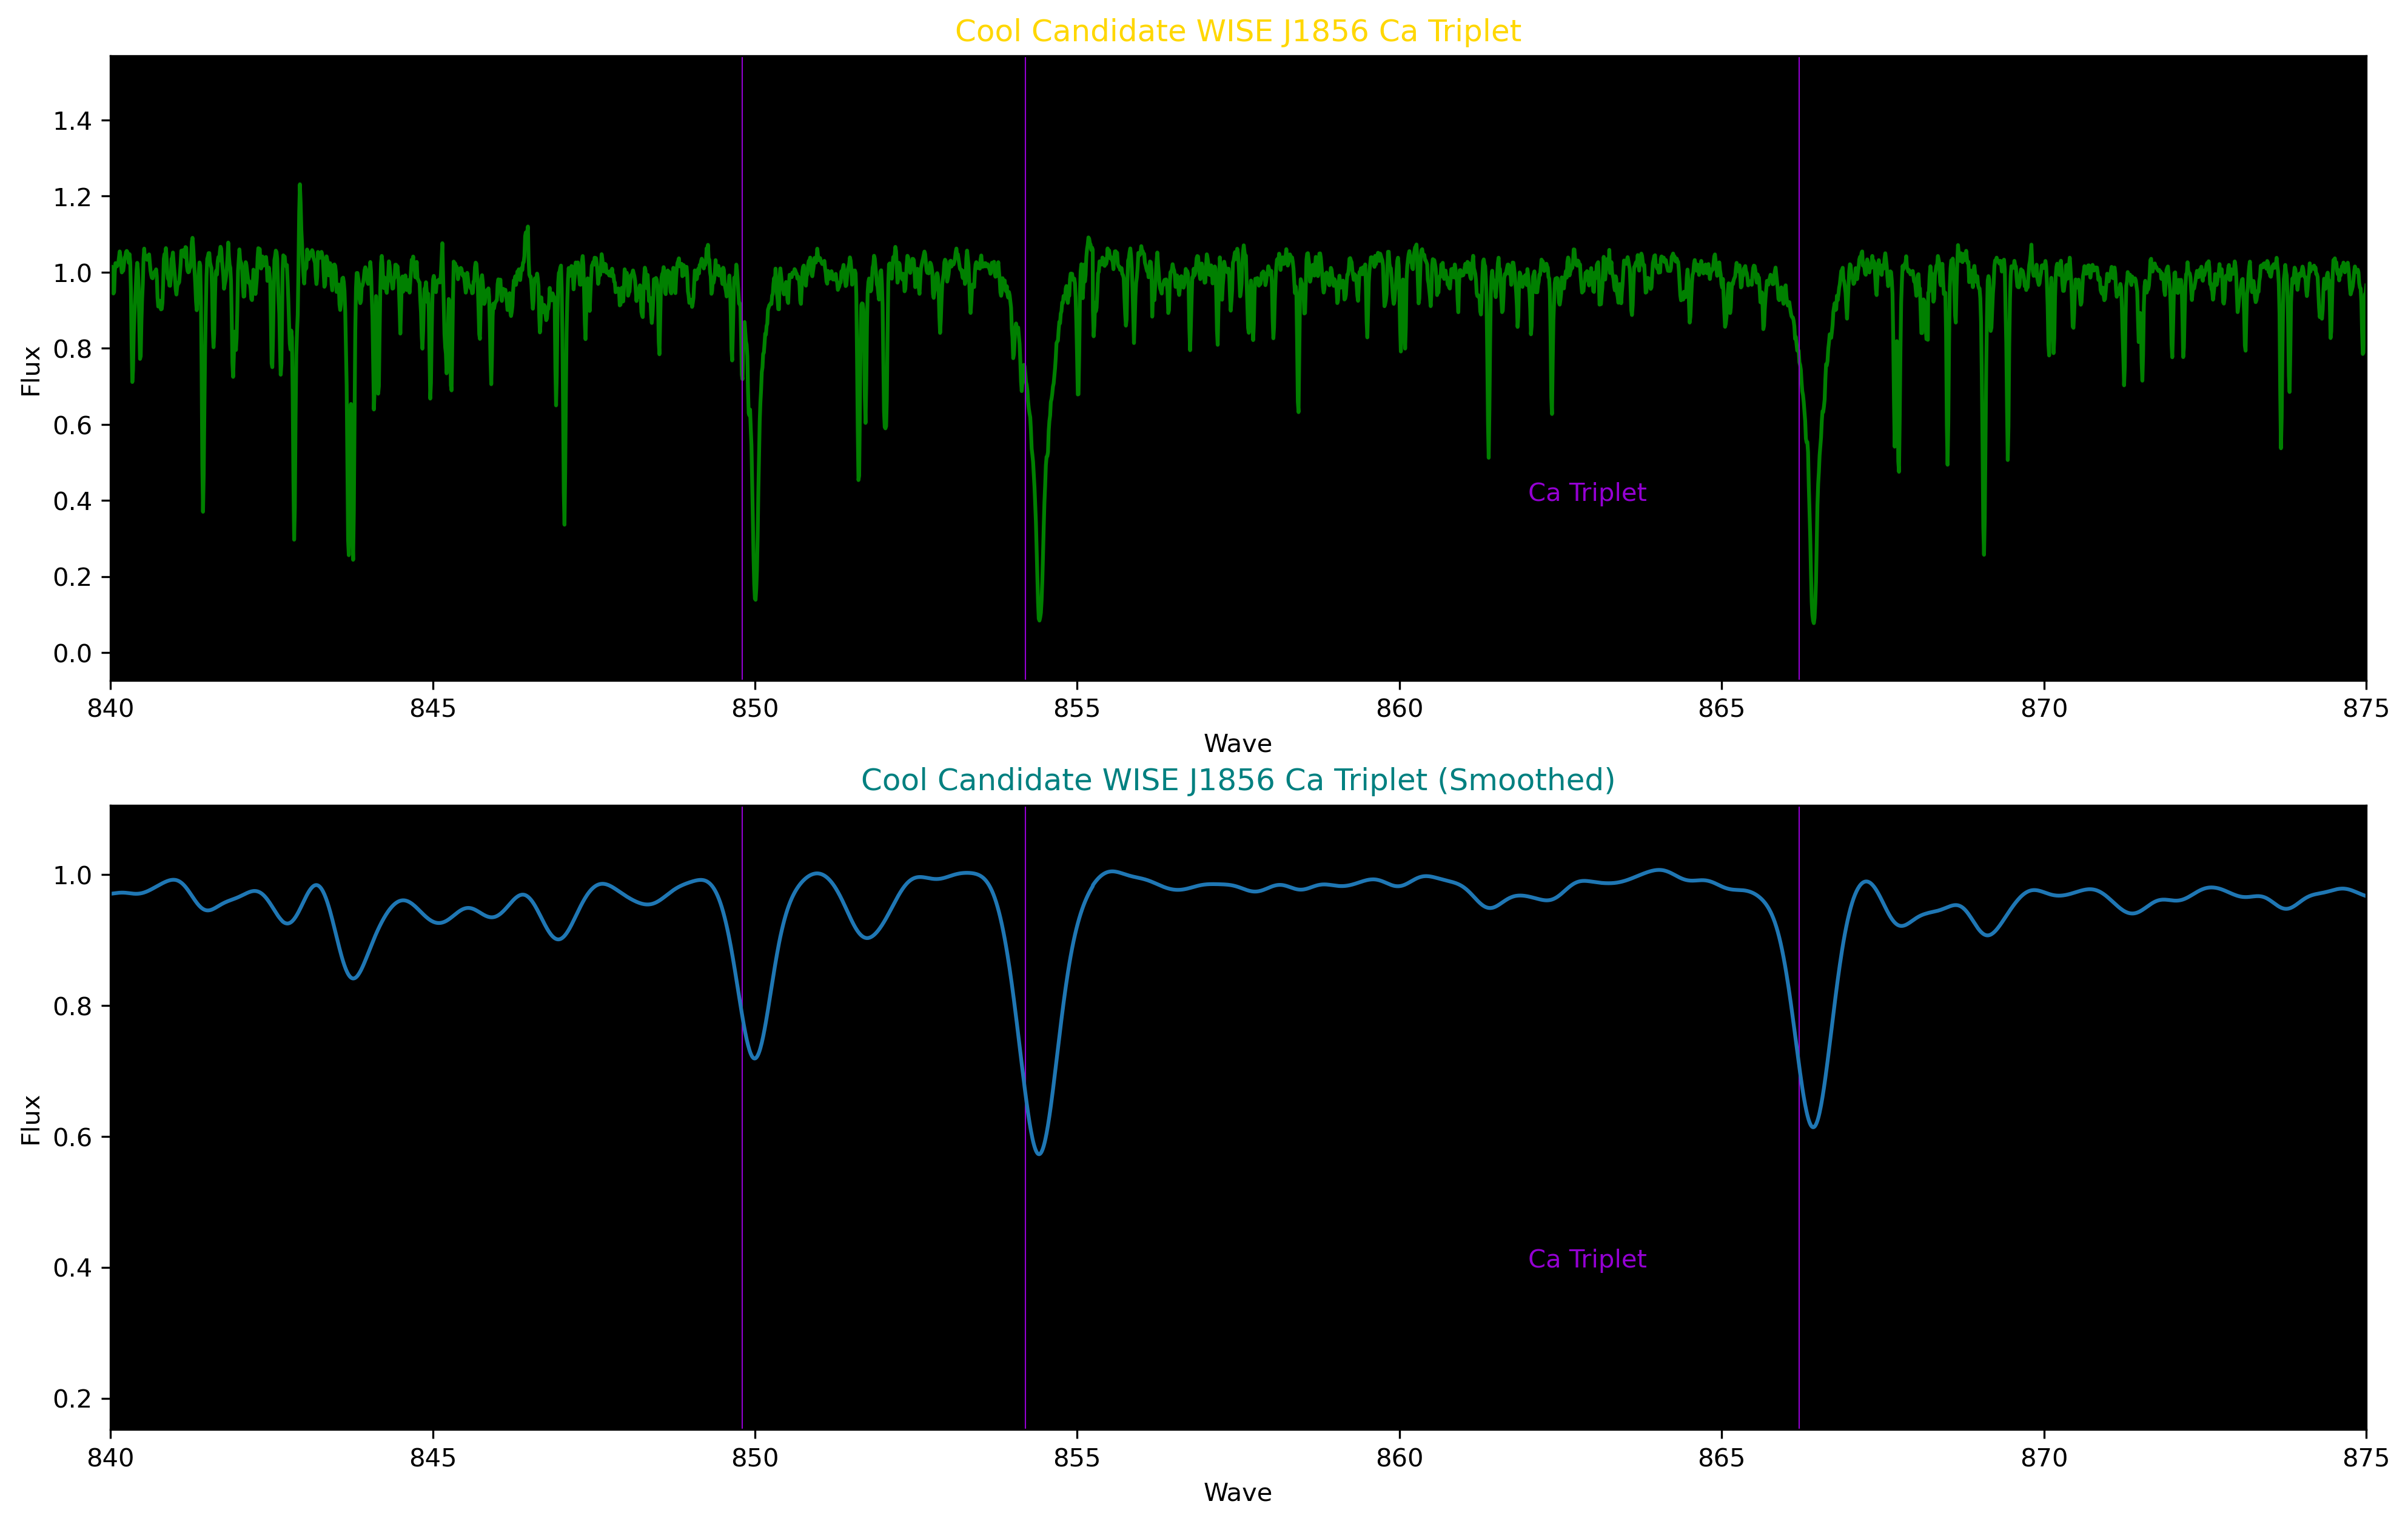

<Figure size 432x288 with 0 Axes>

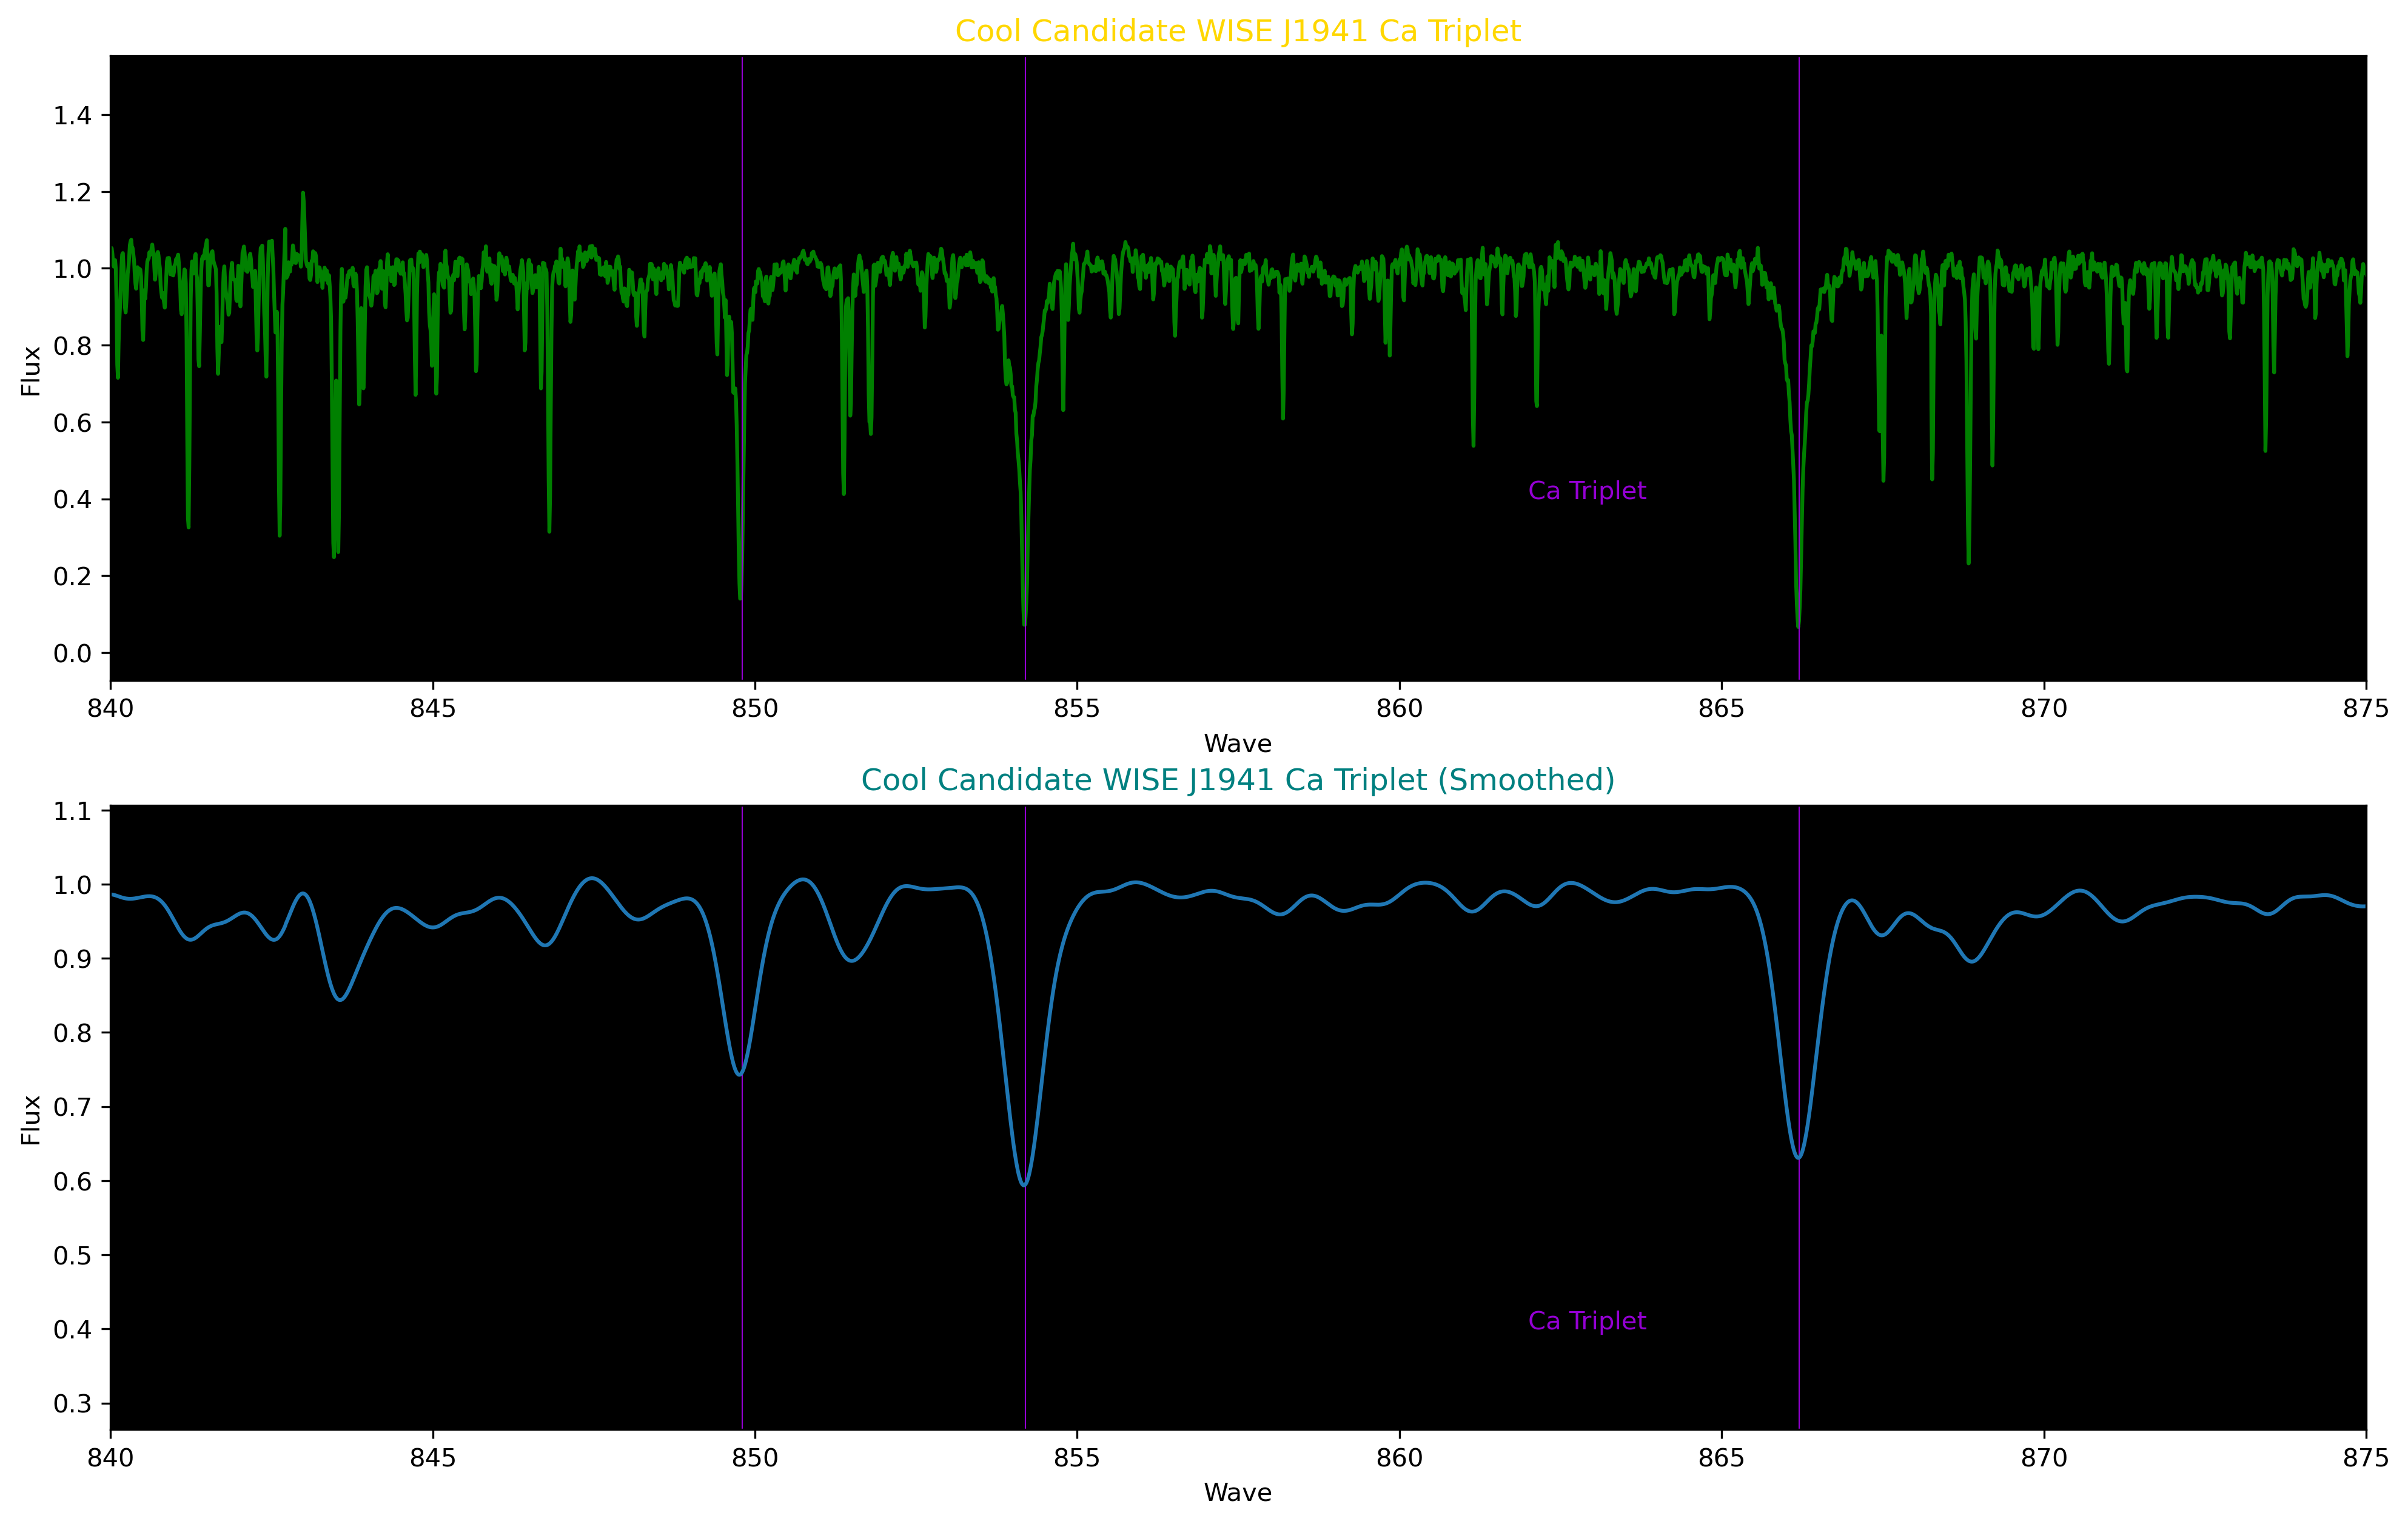

<Figure size 432x288 with 0 Axes>

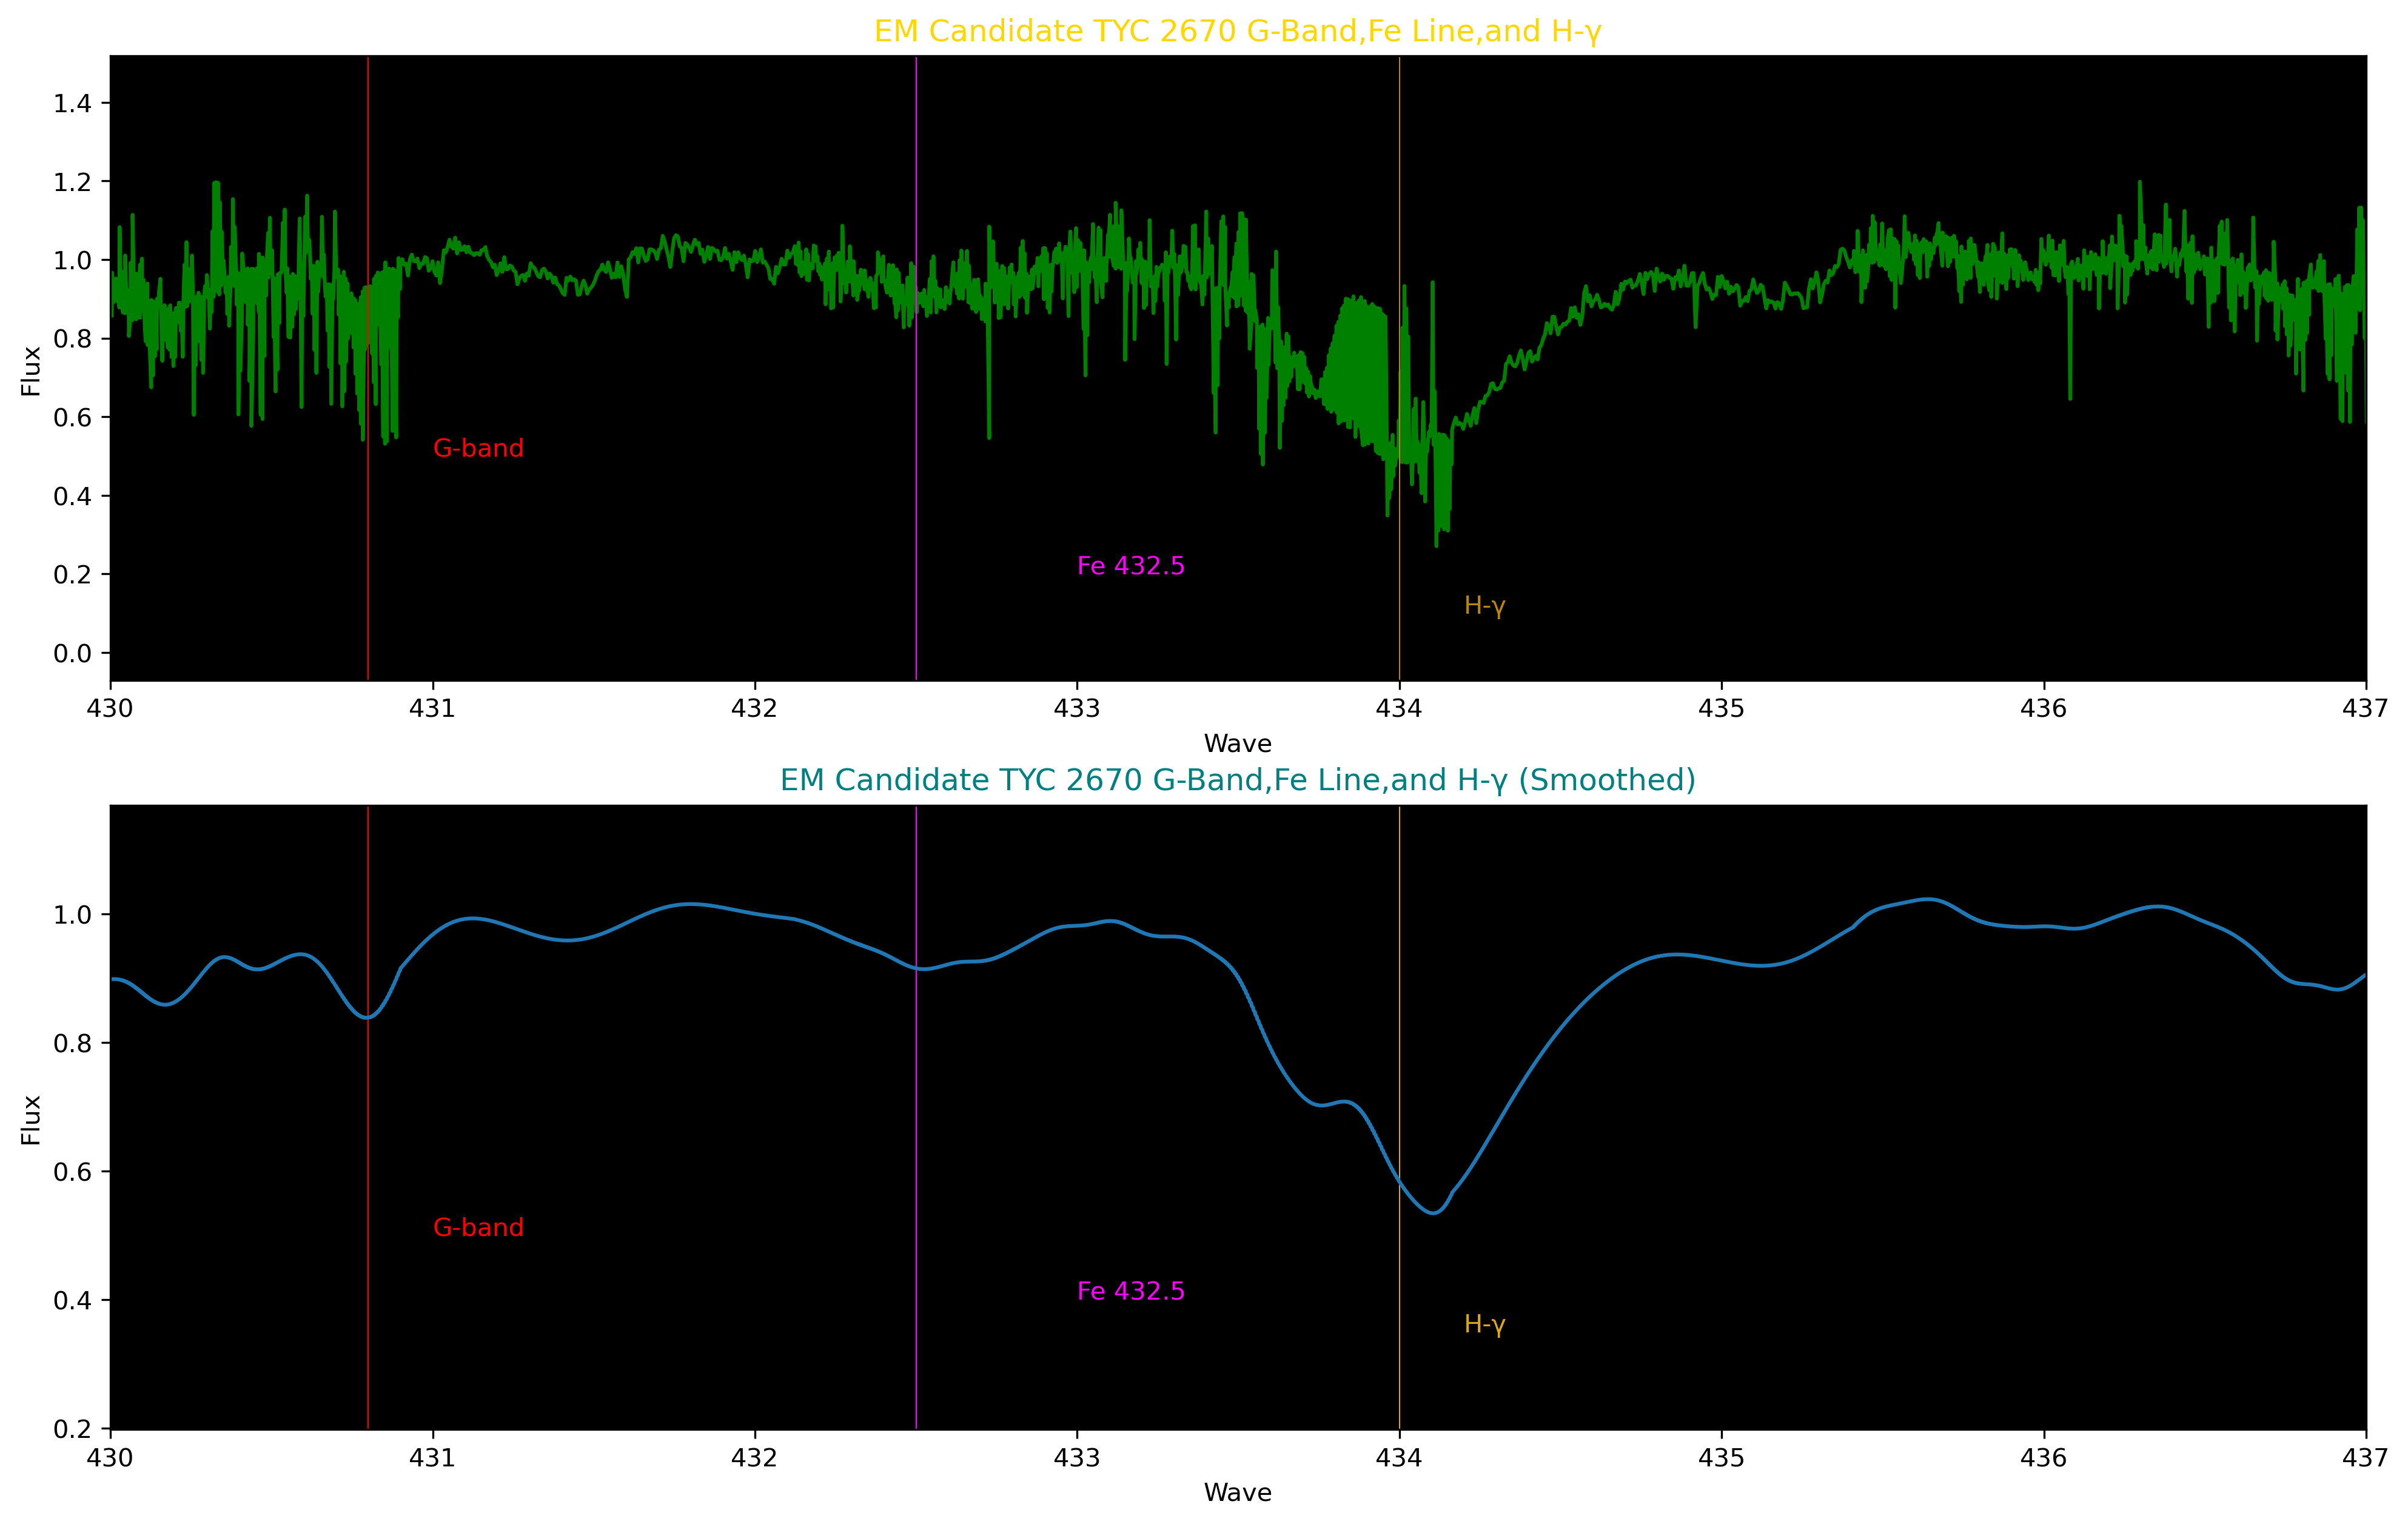

<Figure size 432x288 with 0 Axes>

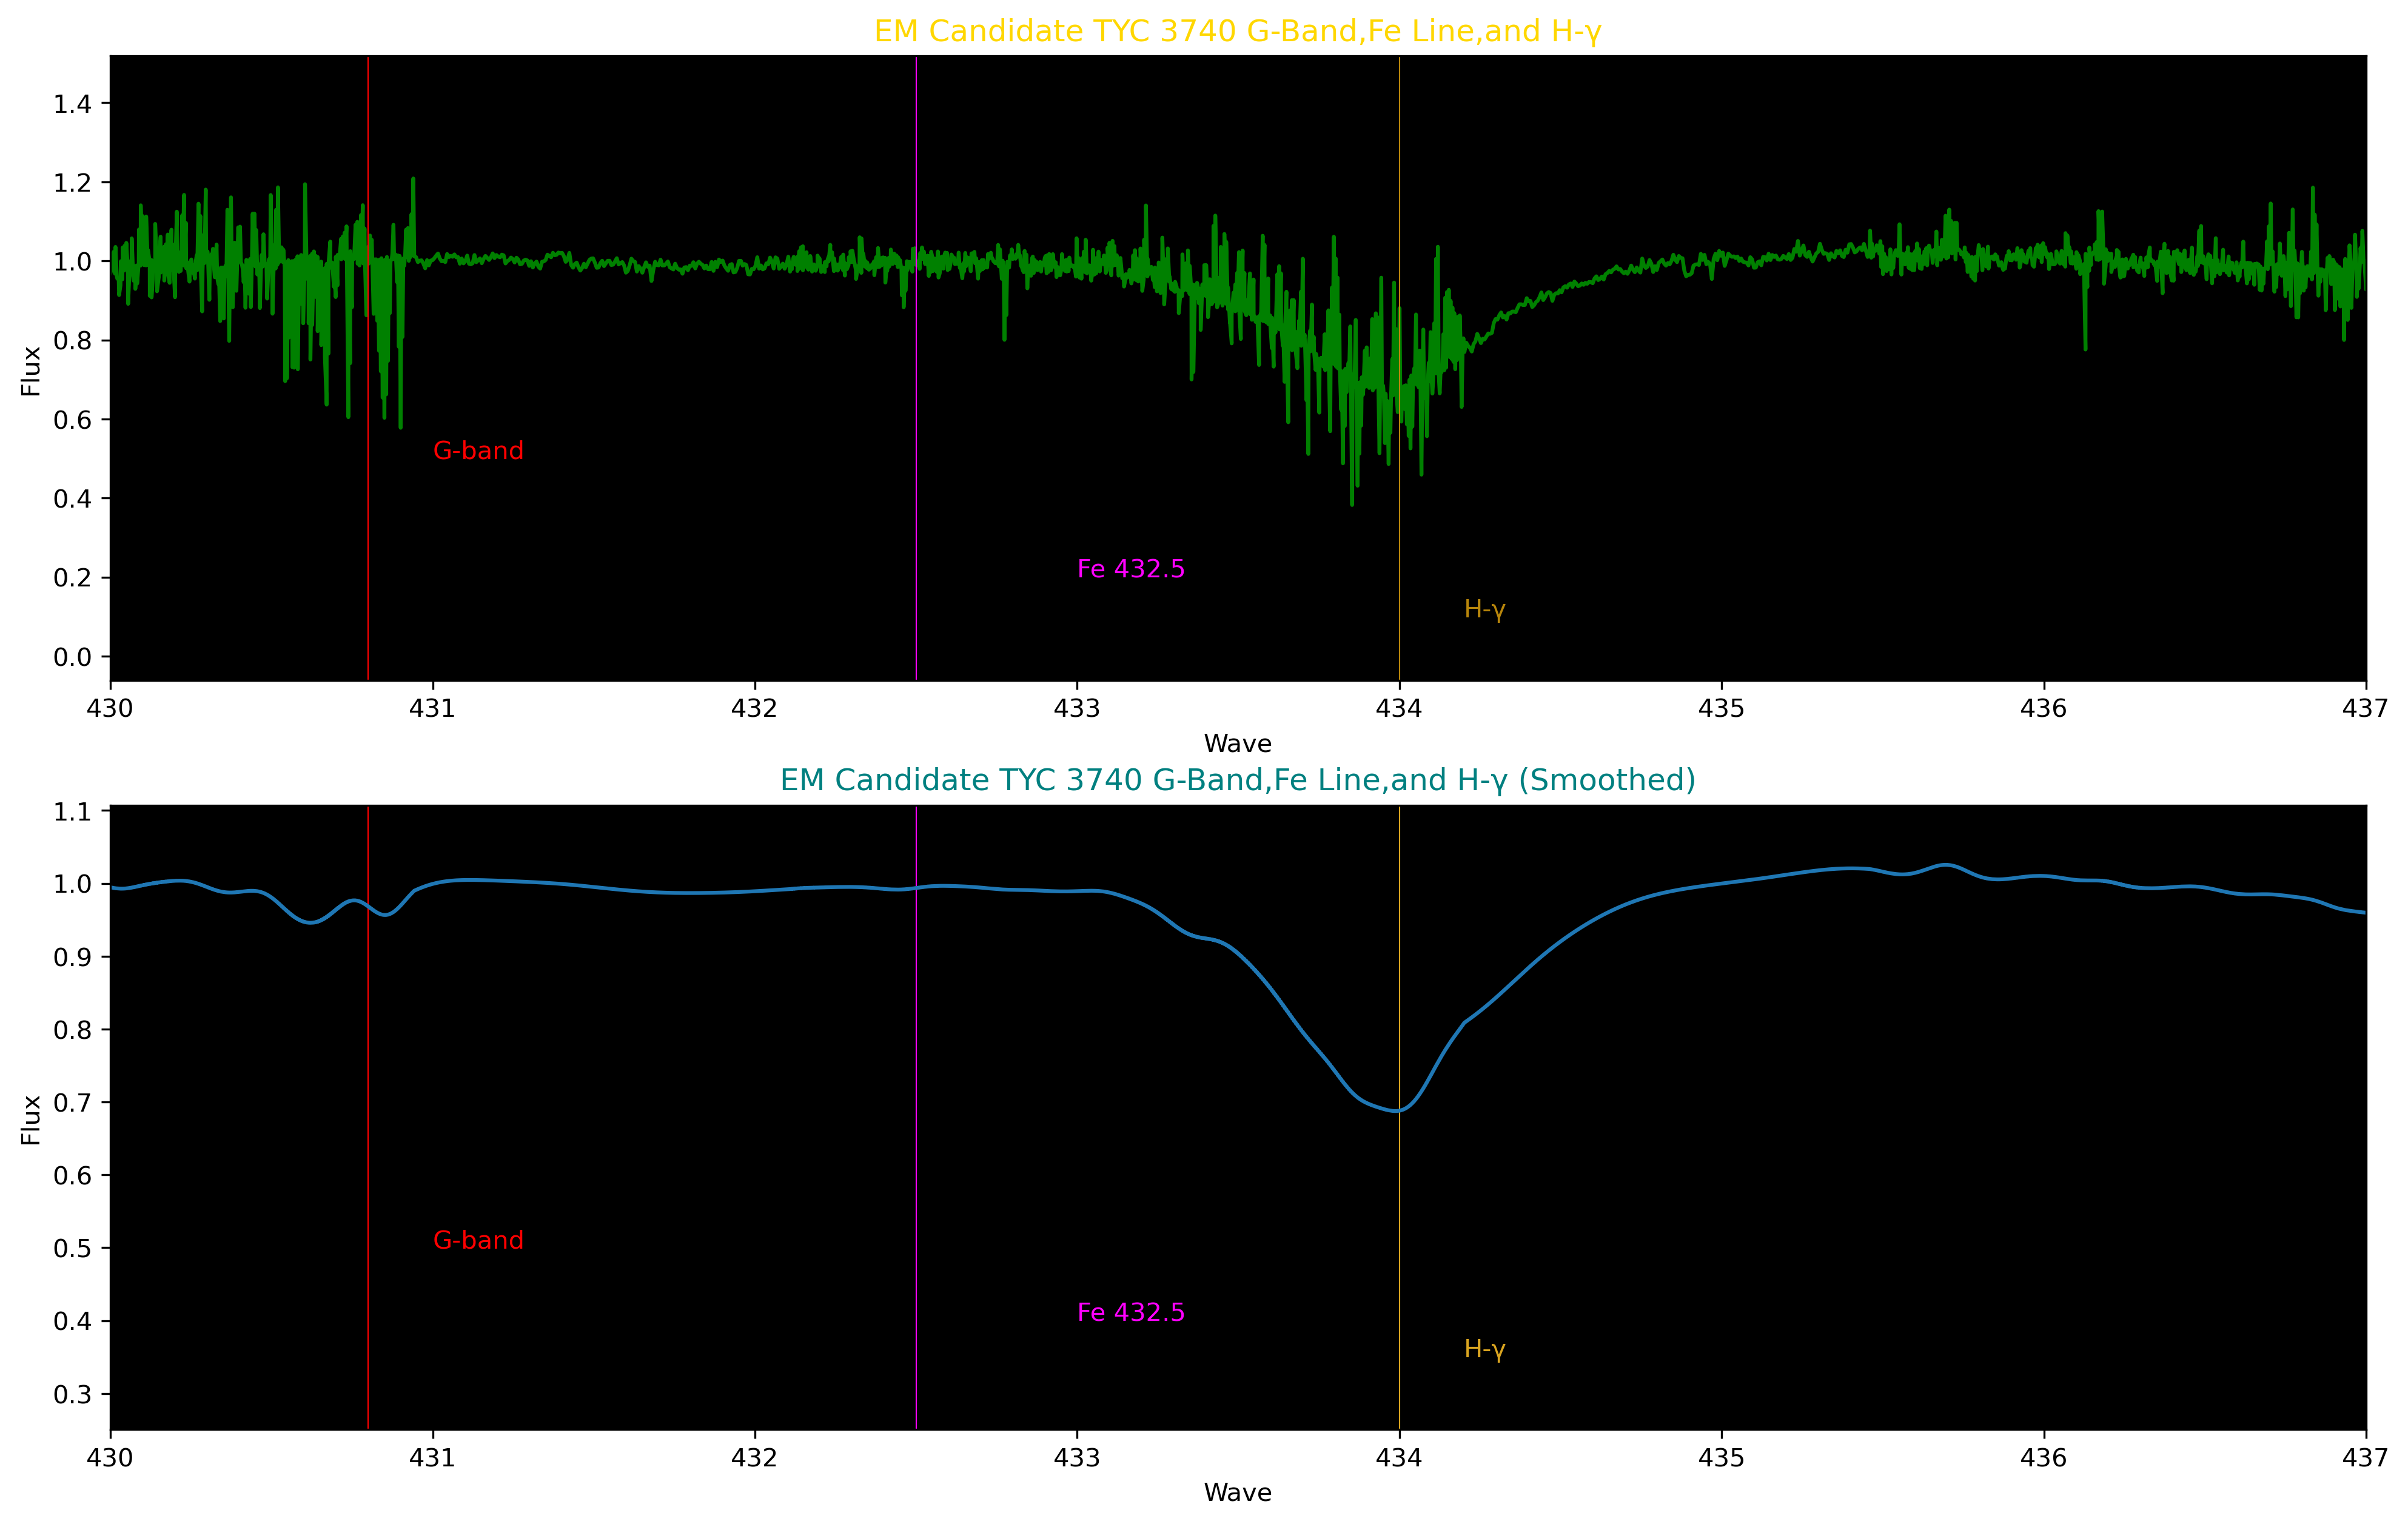

<Figure size 432x288 with 0 Axes>

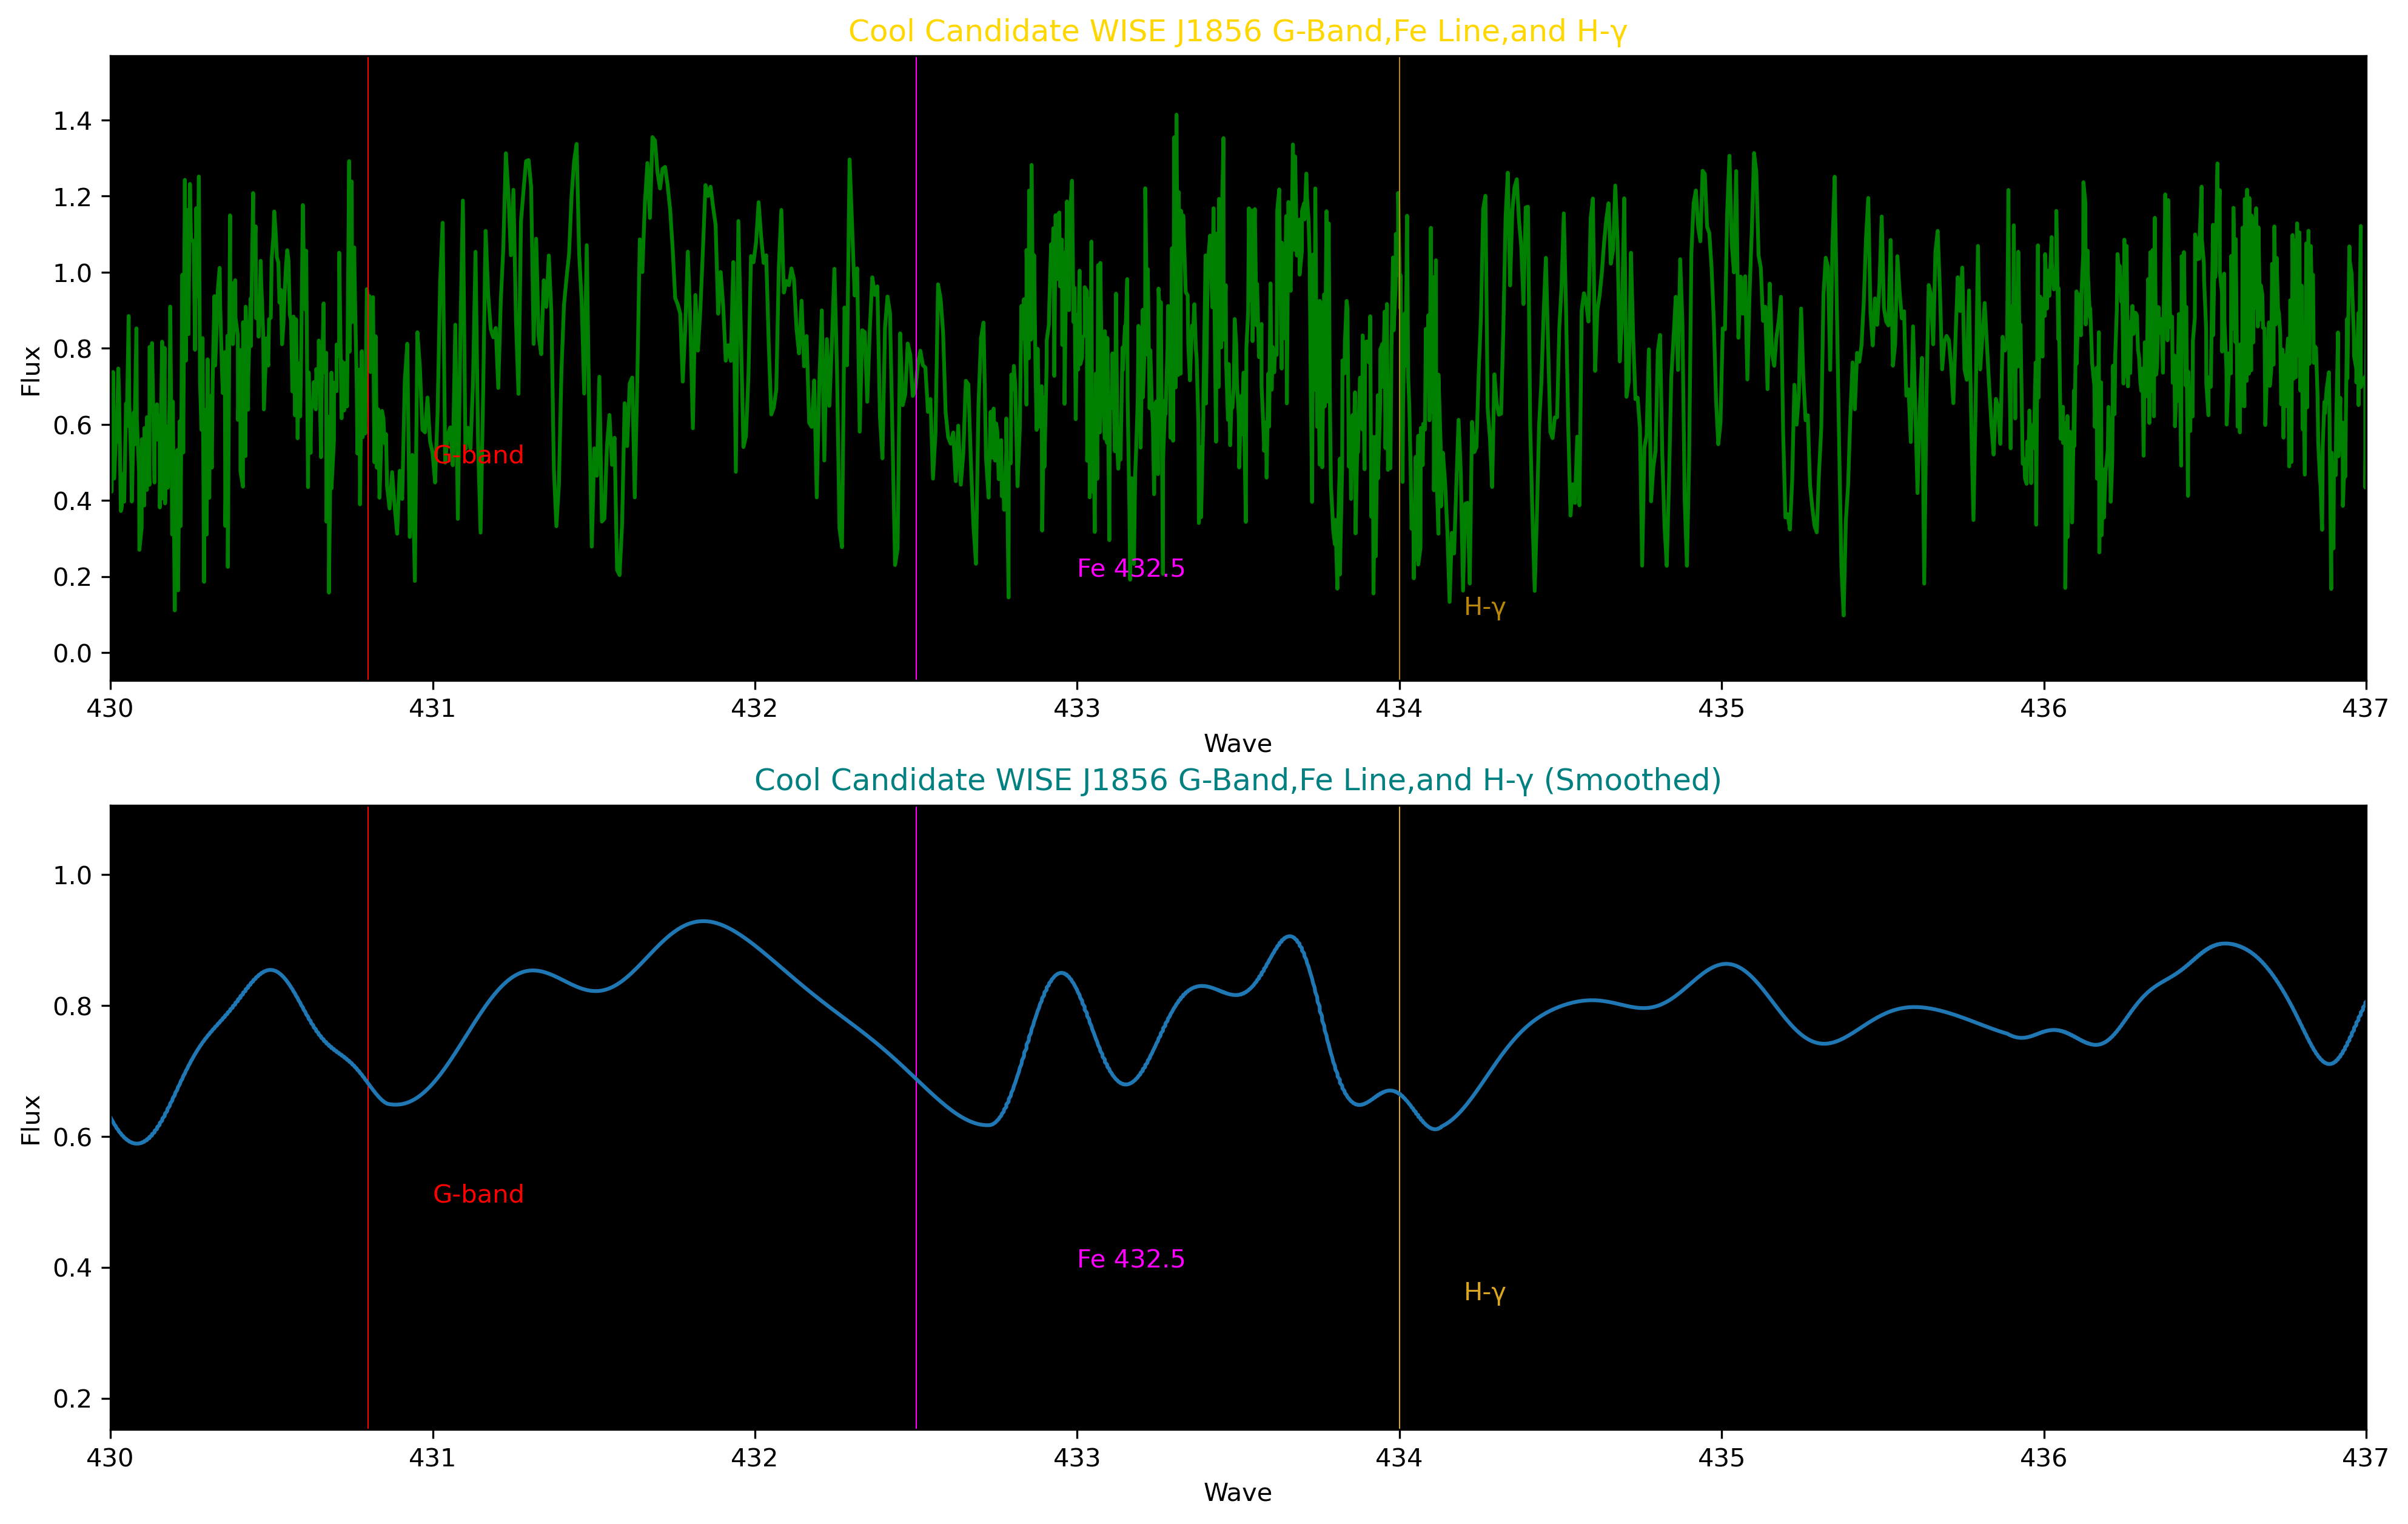

<Figure size 432x288 with 0 Axes>

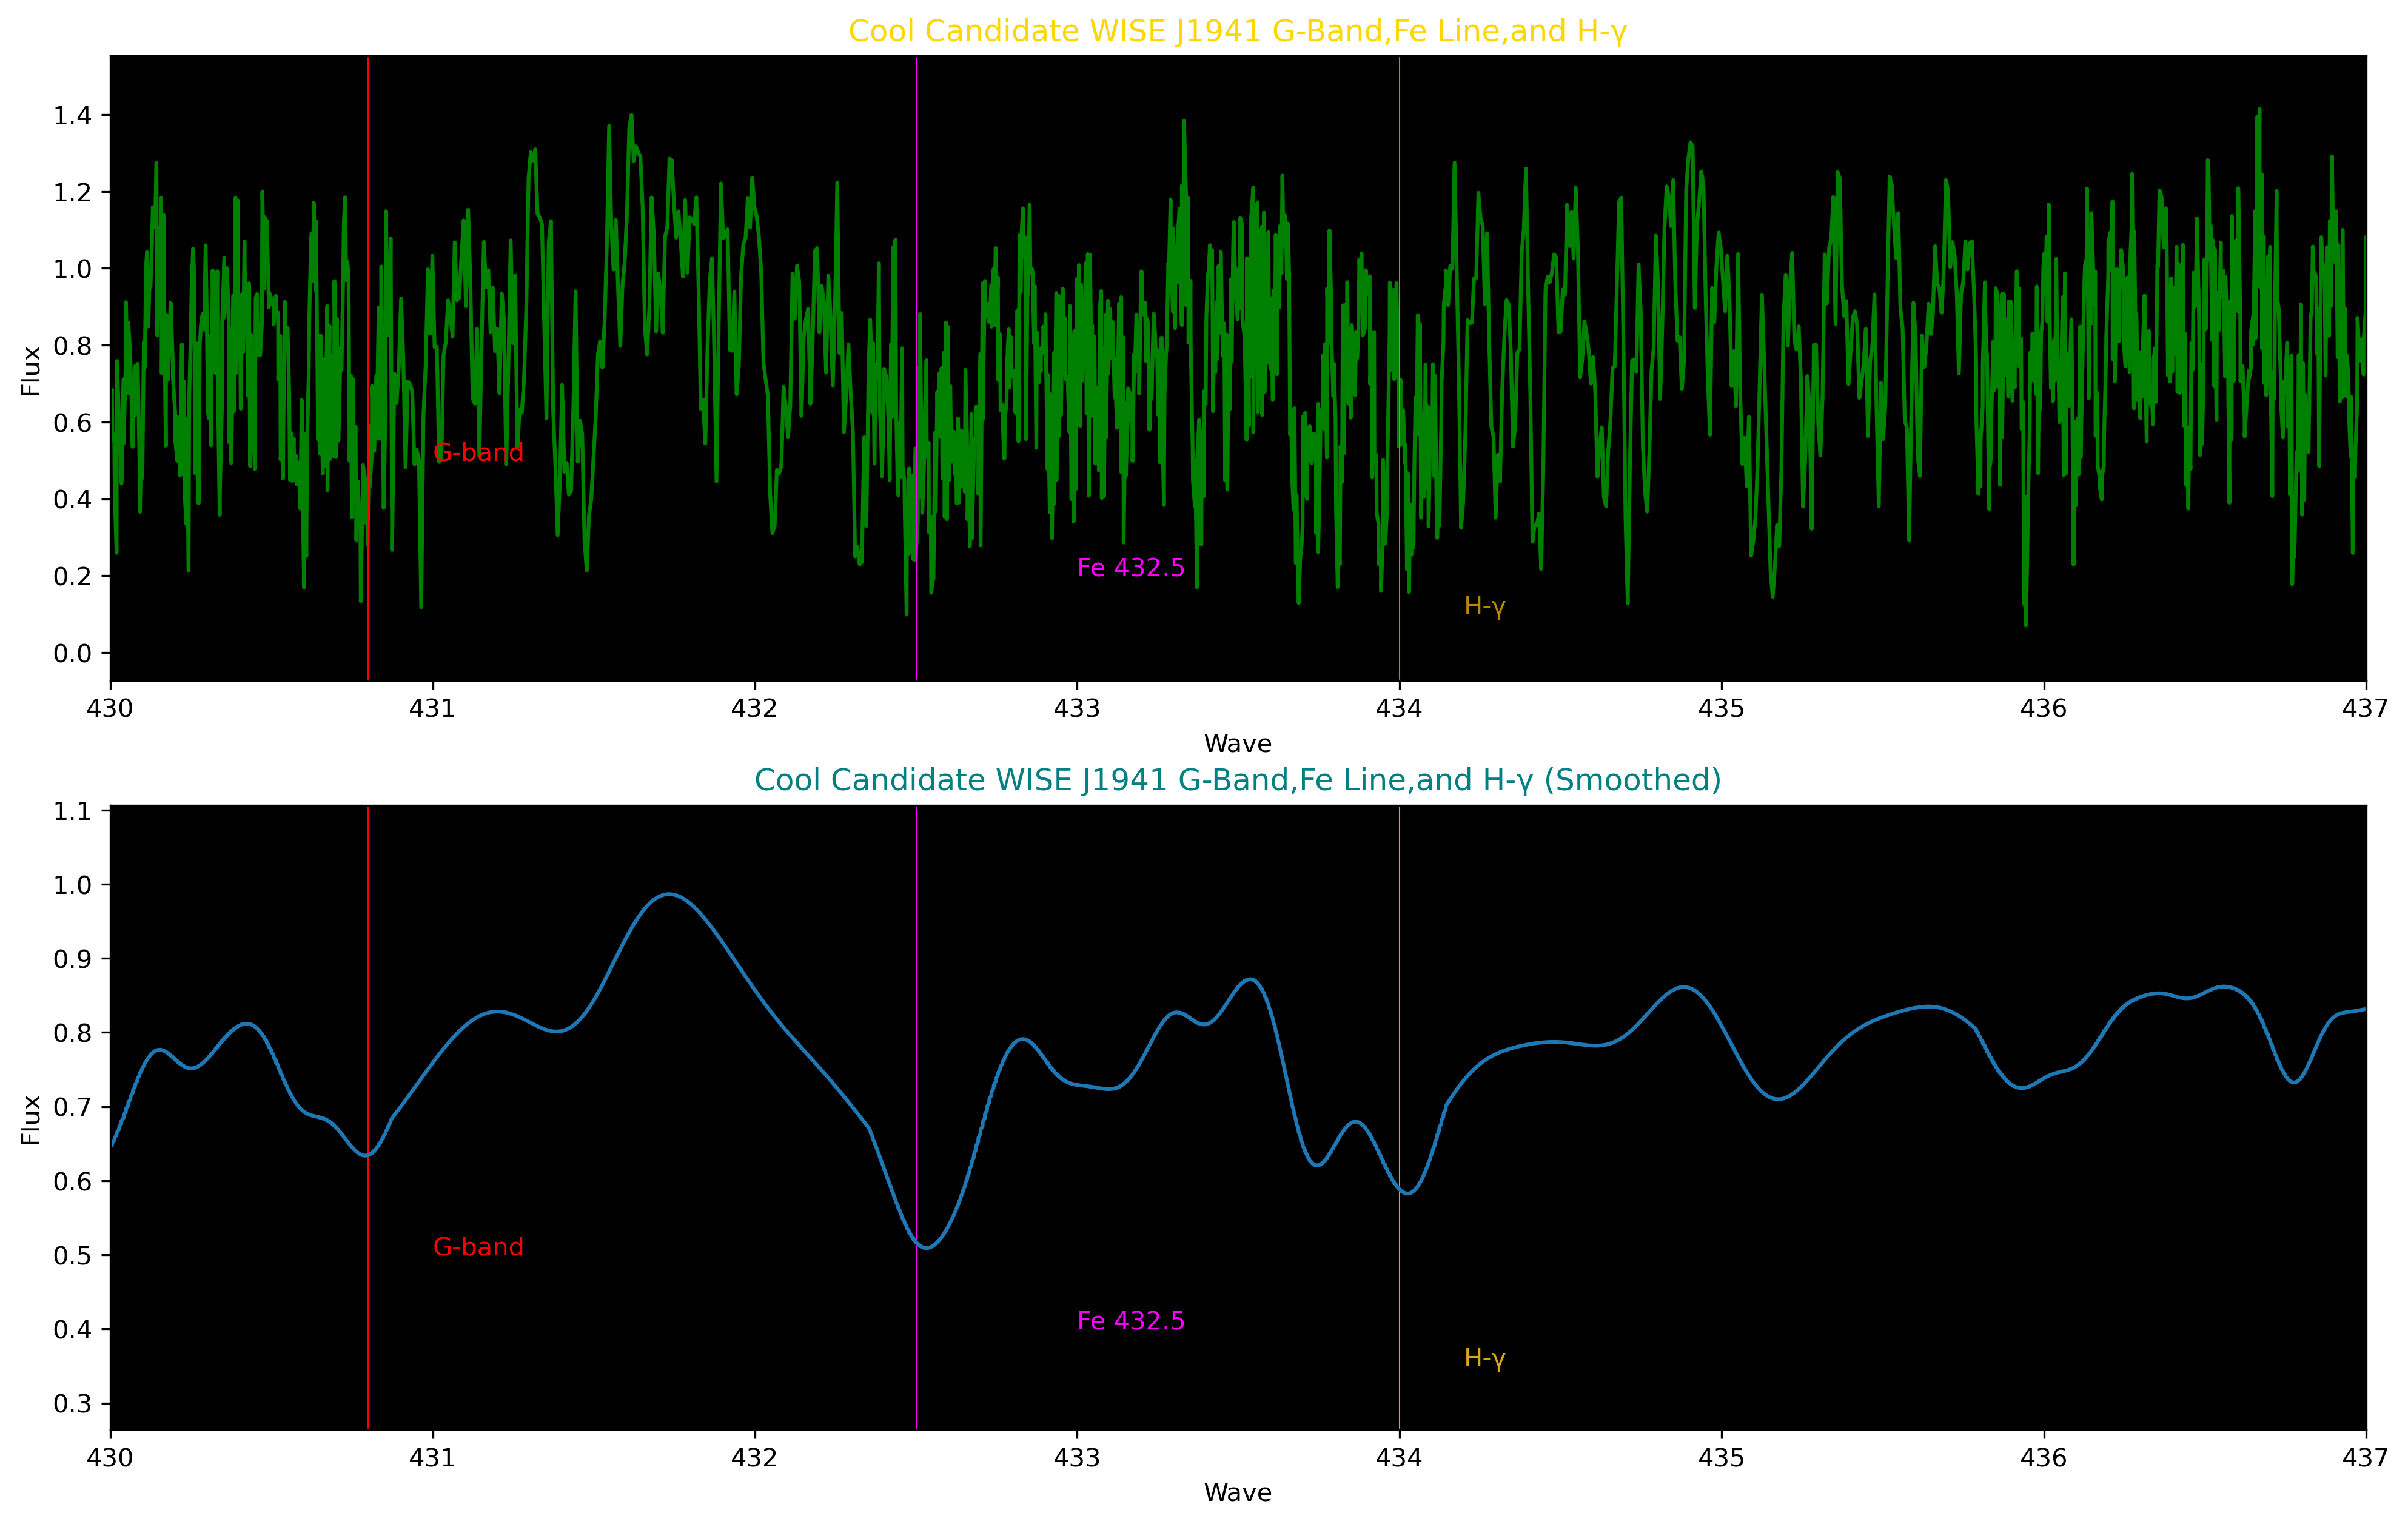

<Figure size 432x288 with 0 Axes>

In [8]:
def RapidChartSpitter(fileName,guassFactor,Focus,starGuess,lw,leftLim,rightLim):
    waves,fluxs,spec1_gsmooth,fileTitle= fileSetup(fileName,guassFactor)
    fullSpectra(waves,fluxs,spec1_gsmooth,Focus,starGuess,lw,leftLim,rightLim,fileTitle)
currentFocus = "Full Spectra"
leftBound = 360
rightBound = 1043
RapidChartSpitter(tyc2670,21,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(tyc3740,21,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1856,21,currentFocus,'Cool',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1941,21,currentFocus,'Cool',0.5,leftBound,rightBound)
bunny()
currentFocus = "Balmer Series"
leftBound = 424
rightBound = 666
RapidChartSpitter(tyc2670,21,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(tyc3740,21,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1856,21,currentFocus,'Cool',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1941,21,currentFocus,'Cool',0.5,leftBound,rightBound)
bunny()
currentFocus = "H-α"
leftBound = 646
rightBound = 666
RapidChartSpitter(tyc2670,21,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(tyc3740,21,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1856,21,currentFocus,'Cool',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1941,21,currentFocus,'Cool',0.5,leftBound,rightBound)
bunny()
currentFocus = "Ca Triplet"
leftBound = 840
rightBound = 875
RapidChartSpitter(tyc2670,21,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(tyc3740,21,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1856,21,currentFocus,'Cool',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1941,21,currentFocus,'Cool',0.5,leftBound,rightBound)
bunny()
currentFocus = "G-Band,Fe Line,and H-γ"
leftBound = 430
rightBound = 437
RapidChartSpitter(tyc2670,21,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(tyc3740,21,currentFocus,'EM',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1856,21,currentFocus,'Cool',0.5,leftBound,rightBound)
RapidChartSpitter(wisej1941,21,currentFocus,'Cool',0.5,leftBound,rightBound)
bunny()

In [9]:
# currentFocus = "G-Band,Fe Line,and H-γ"
# leftBound = 427
# rightBound 
= 440
# RapidChartSpitter(tyc2670,21,currentFocus,'EM',0.5,leftBound,rightBound)
# RapidChartSpitter(tyc3740,21,currentFocus,'EM',0.5,leftBound,rightBound)
# RapidChartSpitter(wisej1856,21,currentFocus,'Cool',0.5,leftBound,rightBound)
# RapidChartSpitter(wisej1941,21,currentFocus,'Cool',0.5,leftBound,rightBound)
# bunny()

SyntaxError: invalid syntax (Temp/ipykernel_18284/3383736187.py, line 4)